In [1]:
import os
import numpy as np
import cv2
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from albumentations import HorizontalFlip, VerticalFlip, Rotate

In [ ]:
#import shutil
#shutil.rmtree('/content/new_data')  # Deletes the folder and its contents
#!rm -rf /content/new_data


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!unzip -q /content/drive/MyDrive/ct-heart/archive.zip

In [4]:
dataset_path = "/content/data/train"
print(os.listdir(dataset_path))

['100058', '100067', '100065', '100093', '100095', '100053', '100089', '100051', '100082', '100069', '100092', '100075', '100091', '100080', '100073', '100056', '100079', '100072', '100094']


In [5]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [6]:
def load_data(path, split=0.2):
    images = sorted(glob(os.path.join(path, "**", "image", "*.png"), recursive=True))
    masks = sorted(glob(os.path.join(path, "**", "mask", "*.png"), recursive=True))


    split_size = max(1, int(len(images) * split))  # Ensures at least one validation sample
    train_x, valid_x = train_test_split(images, test_size=split_size, random_state=42)
    train_y, valid_y = train_test_split(masks, test_size=split_size, random_state=42)

    return images, masks, (train_x, train_y), (valid_x, valid_y)


In [7]:
images, masks, (train_x, train_y), (valid_x, valid_y) = load_data(dataset_path, split=0.2)

print("Total Images:", len(images))  # Now you can access it


Total Images: 2532


In [8]:
len(masks)

2532

In [9]:
print(f"Number of Training Images: {len(train_x)}")
print(f"Number of Training Masks: {len(train_y)}")


Number of Training Images: 2026
Number of Training Masks: 2026


In [10]:
def augment_data(images, masks, save_path, augment=False):
    H = 512
    W = 512

    for idx, (x, y) in tqdm(enumerate(zip(images, masks)), total=len(images)):
        """ Extracting the dir name and image name """
        dir_name = x.split("/")[-3]  # Works for Unix-style paths
        name = dir_name + "_" + x.split("/")[-1].split(".")[0]

        """ Read the image and mask """
        x = cv2.imread(x, cv2.IMREAD_COLOR)
        y = cv2.imread(y, cv2.IMREAD_COLOR)

        if augment == True:
            aug = HorizontalFlip(p=1.0)
            augmented = aug(image=x, mask=y)
            x1 = augmented["image"]
            y1 = augmented["mask"]

            aug = VerticalFlip(p=1)
            augmented = aug(image=x, mask=y)
            x2 = augmented['image']
            y2 = augmented['mask']

            aug = Rotate(limit=45, p=1.0)
            augmented = aug(image=x, mask=y)
            x3 = augmented["image"]
            y3 = augmented["mask"]

            X = [x, x1, x2, x3]
            Y = [y, y1, y2, y3]

        else:
            X = [x]
            #print(len(X))
            Y =[y]

        idx = 0
        for i, m in zip(X, Y):
            i = cv2.resize(i, (W, H))
            m = cv2.resize(m, (W, H))
            m = m/255.0
            m = (m > 0.5) * 255

            if len(X) == 1:  # each loop it will take one image
                tmp_image_name = f"{name}.jpg"
                tmp_mask_name  = f"{name}.jpg"
            else:
                tmp_image_name = f"{name}_{idx}.jpg"
                tmp_mask_name  = f"{name}_{idx}.jpg"

            image_path = os.path.join(save_path, "image/", tmp_image_name)
            mask_path  = os.path.join(save_path, "mask/", tmp_mask_name)
            print("Saving Image:", image_path)
            print("Saving Mask:", mask_path)
            cv2.imwrite(image_path, i)
            cv2.imwrite(mask_path, m)

            idx += 1

if __name__ == "__main__":
    """ Load the dataset """
    dataset_path = os.path.join("data", "train")
    images, masks, (train_x, train_y), (valid_x, valid_y) = load_data(dataset_path, split=0.2)

    print("Train: ", len(train_x))
    print("Valid: ", len(valid_x))

    create_dir("new_data/train/image/")
    create_dir("new_data/train/mask/")
    create_dir("new_data/valid/image/")
    create_dir("new_data/valid/mask/")

    augment_data(train_x, train_y, "new_data/train/", augment=False)
    augment_data(valid_x, valid_y, "new_data/valid/", augment=False)

Train:  2026
Valid:  506


  0%|          | 4/2026 [00:00<00:52, 38.56it/s]

Saving Image: new_data/train/image/100092_1-074.jpg
Saving Mask: new_data/train/mask/100092_1-074.jpg
Saving Image: new_data/train/image/100053_1-027.jpg
Saving Mask: new_data/train/mask/100053_1-027.jpg
Saving Image: new_data/train/image/100092_1-110.jpg
Saving Mask: new_data/train/mask/100092_1-110.jpg
Saving Image: new_data/train/image/100069_1-009.jpg
Saving Mask: new_data/train/mask/100069_1-009.jpg
Saving Image: new_data/train/image/100093_1-026.jpg
Saving Mask: new_data/train/mask/100093_1-026.jpg
Saving Image: new_data/train/image/100053_1-005.jpg
Saving Mask: new_data/train/mask/100053_1-005.jpg
Saving Image: new_data/train/image/100094_1-101.jpg
Saving Mask: new_data/train/mask/100094_1-101.jpg
Saving Image: new_data/train/image/100080_1-066.jpg
Saving Mask: new_data/train/mask/100080_1-066.jpg
Saving Image: new_data/train/image/100065_1-042.jpg
Saving Mask: new_data/train/mask/100065_1-042.jpg
Saving Image: new_data/train/image/100092_1-038.jpg
Saving Mask: new_data/train/ma

  1%|          | 13/2026 [00:00<00:29, 68.29it/s]

Saving Image: new_data/train/image/100089_1-046.jpg
Saving Mask: new_data/train/mask/100089_1-046.jpg
Saving Image: new_data/train/image/100065_1-045.jpg
Saving Mask: new_data/train/mask/100065_1-045.jpg
Saving Image: new_data/train/image/100080_1-100.jpg
Saving Mask: new_data/train/mask/100080_1-100.jpg
Saving Image: new_data/train/image/100073_1-117.jpg
Saving Mask: new_data/train/mask/100073_1-117.jpg
Saving Image: new_data/train/image/100051_1-124.jpg
Saving Mask: new_data/train/mask/100051_1-124.jpg
Saving Image: new_data/train/image/100073_1-111.jpg
Saving Mask: new_data/train/mask/100073_1-111.jpg


  1%|          | 23/2026 [00:00<00:24, 80.23it/s]

Saving Image: new_data/train/image/100065_1-079.jpg
Saving Mask: new_data/train/mask/100065_1-079.jpg
Saving Image: new_data/train/image/100058_1-032.jpg
Saving Mask: new_data/train/mask/100058_1-032.jpg
Saving Image: new_data/train/image/100067_1-098.jpg
Saving Mask: new_data/train/mask/100067_1-098.jpg
Saving Image: new_data/train/image/100094_1-080.jpg
Saving Mask: new_data/train/mask/100094_1-080.jpg
Saving Image: new_data/train/image/100067_1-075.jpg
Saving Mask: new_data/train/mask/100067_1-075.jpg
Saving Image: new_data/train/image/100058_1-123.jpg
Saving Mask: new_data/train/mask/100058_1-123.jpg
Saving Image: new_data/train/image/100073_1-078.jpg
Saving Mask: new_data/train/mask/100073_1-078.jpg
Saving Image: new_data/train/image/100056_1-100.jpg
Saving Mask: new_data/train/mask/100056_1-100.jpg
Saving Image: new_data/train/image/100094_1-099.jpg
Saving Mask: new_data/train/mask/100094_1-099.jpg
Saving Image: new_data/train/image/100056_1-057.jpg
Saving Mask: new_data/train/ma

  2%|▏         | 33/2026 [00:00<00:23, 85.48it/s]

Saving Image: new_data/train/image/100075_1-082.jpg
Saving Mask: new_data/train/mask/100075_1-082.jpg
Saving Image: new_data/train/image/100053_1-090.jpg
Saving Mask: new_data/train/mask/100053_1-090.jpg
Saving Image: new_data/train/image/100094_1-047.jpg
Saving Mask: new_data/train/mask/100094_1-047.jpg
Saving Image: new_data/train/image/100092_1-002.jpg
Saving Mask: new_data/train/mask/100092_1-002.jpg
Saving Image: new_data/train/image/100073_1-068.jpg
Saving Mask: new_data/train/mask/100073_1-068.jpg


  2%|▏         | 43/2026 [00:00<00:22, 87.16it/s]

Saving Image: new_data/train/image/100051_1-085.jpg
Saving Mask: new_data/train/mask/100051_1-085.jpg
Saving Image: new_data/train/image/100080_1-047.jpg
Saving Mask: new_data/train/mask/100080_1-047.jpg
Saving Image: new_data/train/image/100056_1-024.jpg
Saving Mask: new_data/train/mask/100056_1-024.jpg
Saving Image: new_data/train/image/100065_1-043.jpg
Saving Mask: new_data/train/mask/100065_1-043.jpg
Saving Image: new_data/train/image/100056_1-048.jpg
Saving Mask: new_data/train/mask/100056_1-048.jpg
Saving Image: new_data/train/image/100089_1-100.jpg
Saving Mask: new_data/train/mask/100089_1-100.jpg
Saving Image: new_data/train/image/100065_1-121.jpg
Saving Mask: new_data/train/mask/100065_1-121.jpg
Saving Image: new_data/train/image/100058_1-042.jpg
Saving Mask: new_data/train/mask/100058_1-042.jpg
Saving Image: new_data/train/image/100058_1-098.jpg
Saving Mask: new_data/train/mask/100058_1-098.jpg
Saving Image: new_data/train/image/100080_1-107.jpg
Saving Mask: new_data/train/ma

  3%|▎         | 53/2026 [00:00<00:22, 89.05it/s]

Saving Image: new_data/train/image/100095_1-136.jpg
Saving Mask: new_data/train/mask/100095_1-136.jpg
Saving Image: new_data/train/image/100075_1-032.jpg
Saving Mask: new_data/train/mask/100075_1-032.jpg
Saving Image: new_data/train/image/100056_1-036.jpg
Saving Mask: new_data/train/mask/100056_1-036.jpg
Saving Image: new_data/train/image/100093_1-119.jpg
Saving Mask: new_data/train/mask/100093_1-119.jpg
Saving Image: new_data/train/image/100072_1-09.jpg
Saving Mask: new_data/train/mask/100072_1-09.jpg


  3%|▎         | 63/2026 [00:00<00:21, 90.07it/s]

Saving Image: new_data/train/image/100080_1-099.jpg
Saving Mask: new_data/train/mask/100080_1-099.jpg
Saving Image: new_data/train/image/100051_1-019.jpg
Saving Mask: new_data/train/mask/100051_1-019.jpg
Saving Image: new_data/train/image/100075_1-142.jpg
Saving Mask: new_data/train/mask/100075_1-142.jpg
Saving Image: new_data/train/image/100080_1-140.jpg
Saving Mask: new_data/train/mask/100080_1-140.jpg
Saving Image: new_data/train/image/100067_1-036.jpg
Saving Mask: new_data/train/mask/100067_1-036.jpg
Saving Image: new_data/train/image/100080_1-082.jpg
Saving Mask: new_data/train/mask/100080_1-082.jpg
Saving Image: new_data/train/image/100073_1-131.jpg
Saving Mask: new_data/train/mask/100073_1-131.jpg
Saving Image: new_data/train/image/100082_1-118.jpg
Saving Mask: new_data/train/mask/100082_1-118.jpg
Saving Image: new_data/train/image/100082_1-058.jpg
Saving Mask: new_data/train/mask/100082_1-058.jpg
Saving Image: new_data/train/image/100089_1-117.jpg
Saving Mask: new_data/train/ma

  4%|▎         | 73/2026 [00:00<00:21, 90.13it/s]

Saving Image: new_data/train/image/100091_1-005.jpg
Saving Mask: new_data/train/mask/100091_1-005.jpg
Saving Image: new_data/train/image/100067_1-018.jpg
Saving Mask: new_data/train/mask/100067_1-018.jpg
Saving Image: new_data/train/image/100089_1-093.jpg
Saving Mask: new_data/train/mask/100089_1-093.jpg
Saving Image: new_data/train/image/100069_1-020.jpg
Saving Mask: new_data/train/mask/100069_1-020.jpg


  4%|▍         | 83/2026 [00:00<00:21, 88.80it/s]

Saving Image: new_data/train/image/100056_1-102.jpg
Saving Mask: new_data/train/mask/100056_1-102.jpg
Saving Image: new_data/train/image/100075_1-092.jpg
Saving Mask: new_data/train/mask/100075_1-092.jpg
Saving Image: new_data/train/image/100094_1-159.jpg
Saving Mask: new_data/train/mask/100094_1-159.jpg
Saving Image: new_data/train/image/100092_1-076.jpg
Saving Mask: new_data/train/mask/100092_1-076.jpg
Saving Image: new_data/train/image/100080_1-010.jpg
Saving Mask: new_data/train/mask/100080_1-010.jpg
Saving Image: new_data/train/image/100093_1-151.jpg
Saving Mask: new_data/train/mask/100093_1-151.jpg
Saving Image: new_data/train/image/100094_1-121.jpg
Saving Mask: new_data/train/mask/100094_1-121.jpg
Saving Image: new_data/train/image/100073_1-101.jpg
Saving Mask: new_data/train/mask/100073_1-101.jpg
Saving Image: new_data/train/image/100069_1-027.jpg
Saving Mask: new_data/train/mask/100069_1-027.jpg
Saving Image: new_data/train/image/100075_1-006.jpg
Saving Mask: new_data/train/ma

  5%|▍         | 93/2026 [00:01<00:21, 90.52it/s]

Saving Image: new_data/train/image/100092_1-042.jpg
Saving Mask: new_data/train/mask/100092_1-042.jpg
Saving Image: new_data/train/image/100075_1-152.jpg
Saving Mask: new_data/train/mask/100075_1-152.jpg
Saving Image: new_data/train/image/100051_1-129.jpg
Saving Mask: new_data/train/mask/100051_1-129.jpg
Saving Image: new_data/train/image/100056_1-098.jpg
Saving Mask: new_data/train/mask/100056_1-098.jpg


  5%|▌         | 103/2026 [00:01<00:21, 90.87it/s]

Saving Image: new_data/train/image/100089_1-118.jpg
Saving Mask: new_data/train/mask/100089_1-118.jpg
Saving Image: new_data/train/image/100094_1-094.jpg
Saving Mask: new_data/train/mask/100094_1-094.jpg
Saving Image: new_data/train/image/100093_1-003.jpg
Saving Mask: new_data/train/mask/100093_1-003.jpg
Saving Image: new_data/train/image/100056_1-065.jpg
Saving Mask: new_data/train/mask/100056_1-065.jpg
Saving Image: new_data/train/image/100058_1-009.jpg
Saving Mask: new_data/train/mask/100058_1-009.jpg
Saving Image: new_data/train/image/100082_1-032.jpg
Saving Mask: new_data/train/mask/100082_1-032.jpg
Saving Image: new_data/train/image/100094_1-126.jpg
Saving Mask: new_data/train/mask/100094_1-126.jpg
Saving Image: new_data/train/image/100069_1-008.jpg
Saving Mask: new_data/train/mask/100069_1-008.jpg
Saving Image: new_data/train/image/100053_1-047.jpg
Saving Mask: new_data/train/mask/100053_1-047.jpg
Saving Image: new_data/train/image/100058_1-052.jpg
Saving Mask: new_data/train/ma

  6%|▌         | 123/2026 [00:01<00:21, 90.50it/s]

Saving Image: new_data/train/image/100095_1-091.jpg
Saving Mask: new_data/train/mask/100095_1-091.jpg
Saving Image: new_data/train/image/100082_1-012.jpg
Saving Mask: new_data/train/mask/100082_1-012.jpg
Saving Image: new_data/train/image/100092_1-108.jpg
Saving Mask: new_data/train/mask/100092_1-108.jpg
Saving Image: new_data/train/image/100058_1-115.jpg
Saving Mask: new_data/train/mask/100058_1-115.jpg
Saving Image: new_data/train/image/100067_1-112.jpg
Saving Mask: new_data/train/mask/100067_1-112.jpg
Saving Image: new_data/train/image/100093_1-030.jpg
Saving Mask: new_data/train/mask/100093_1-030.jpg
Saving Image: new_data/train/image/100094_1-065.jpg
Saving Mask: new_data/train/mask/100094_1-065.jpg
Saving Image: new_data/train/image/100069_1-078.jpg
Saving Mask: new_data/train/mask/100069_1-078.jpg
Saving Image: new_data/train/image/100094_1-092.jpg
Saving Mask: new_data/train/mask/100094_1-092.jpg
Saving Image: new_data/train/image/100095_1-110.jpg
Saving Mask: new_data/train/ma

  7%|▋         | 143/2026 [00:01<00:20, 91.98it/s]

Saving Image: new_data/train/image/100094_1-086.jpg
Saving Mask: new_data/train/mask/100094_1-086.jpg
Saving Image: new_data/train/image/100056_1-124.jpg
Saving Mask: new_data/train/mask/100056_1-124.jpg
Saving Image: new_data/train/image/100080_1-048.jpg
Saving Mask: new_data/train/mask/100080_1-048.jpg
Saving Image: new_data/train/image/100065_1-033.jpg
Saving Mask: new_data/train/mask/100065_1-033.jpg
Saving Image: new_data/train/image/100089_1-059.jpg
Saving Mask: new_data/train/mask/100089_1-059.jpg
Saving Image: new_data/train/image/100091_1-050.jpg
Saving Mask: new_data/train/mask/100091_1-050.jpg
Saving Image: new_data/train/image/100069_1-057.jpg
Saving Mask: new_data/train/mask/100069_1-057.jpg
Saving Image: new_data/train/image/100079_1-41.jpg
Saving Mask: new_data/train/mask/100079_1-41.jpg
Saving Image: new_data/train/image/100053_1-073.jpg
Saving Mask: new_data/train/mask/100053_1-073.jpg
Saving Image: new_data/train/image/100089_1-126.jpg
Saving Mask: new_data/train/mask

  8%|▊         | 163/2026 [00:01<00:19, 93.65it/s]

Saving Image: new_data/train/image/100089_1-044.jpg
Saving Mask: new_data/train/mask/100089_1-044.jpg
Saving Image: new_data/train/image/100069_1-031.jpg
Saving Mask: new_data/train/mask/100069_1-031.jpg
Saving Image: new_data/train/image/100093_1-012.jpg
Saving Mask: new_data/train/mask/100093_1-012.jpg
Saving Image: new_data/train/image/100065_1-107.jpg
Saving Mask: new_data/train/mask/100065_1-107.jpg
Saving Image: new_data/train/image/100082_1-101.jpg
Saving Mask: new_data/train/mask/100082_1-101.jpg
Saving Image: new_data/train/image/100089_1-149.jpg
Saving Mask: new_data/train/mask/100089_1-149.jpg
Saving Image: new_data/train/image/100056_1-044.jpg
Saving Mask: new_data/train/mask/100056_1-044.jpg
Saving Image: new_data/train/image/100069_1-122.jpg
Saving Mask: new_data/train/mask/100069_1-122.jpg
Saving Image: new_data/train/image/100073_1-108.jpg
Saving Mask: new_data/train/mask/100073_1-108.jpg
Saving Image: new_data/train/image/100072_1-21.jpg
Saving Mask: new_data/train/mas

  9%|▉         | 183/2026 [00:02<00:19, 92.20it/s]

Saving Image: new_data/train/image/100092_1-003.jpg
Saving Mask: new_data/train/mask/100092_1-003.jpg
Saving Image: new_data/train/image/100053_1-100.jpg
Saving Mask: new_data/train/mask/100053_1-100.jpg
Saving Image: new_data/train/image/100089_1-010.jpg
Saving Mask: new_data/train/mask/100089_1-010.jpg
Saving Image: new_data/train/image/100075_1-091.jpg
Saving Mask: new_data/train/mask/100075_1-091.jpg
Saving Image: new_data/train/image/100075_1-093.jpg
Saving Mask: new_data/train/mask/100075_1-093.jpg
Saving Image: new_data/train/image/100072_1-22.jpg
Saving Mask: new_data/train/mask/100072_1-22.jpg
Saving Image: new_data/train/image/100080_1-013.jpg
Saving Mask: new_data/train/mask/100080_1-013.jpg
Saving Image: new_data/train/image/100067_2-005.jpg
Saving Mask: new_data/train/mask/100067_2-005.jpg
Saving Image: new_data/train/image/100095_1-045.jpg
Saving Mask: new_data/train/mask/100095_1-045.jpg
Saving Image: new_data/train/image/100094_1-093.jpg
Saving Mask: new_data/train/mask

 10%|█         | 203/2026 [00:02<00:19, 93.40it/s]

Saving Image: new_data/train/image/100079_1-11.jpg
Saving Mask: new_data/train/mask/100079_1-11.jpg
Saving Image: new_data/train/image/100095_1-100.jpg
Saving Mask: new_data/train/mask/100095_1-100.jpg
Saving Image: new_data/train/image/100065_1-007.jpg
Saving Mask: new_data/train/mask/100065_1-007.jpg
Saving Image: new_data/train/image/100091_1-128.jpg
Saving Mask: new_data/train/mask/100091_1-128.jpg
Saving Image: new_data/train/image/100079_1-21.jpg
Saving Mask: new_data/train/mask/100079_1-21.jpg
Saving Image: new_data/train/image/100080_1-009.jpg
Saving Mask: new_data/train/mask/100080_1-009.jpg
Saving Image: new_data/train/image/100065_1-114.jpg
Saving Mask: new_data/train/mask/100065_1-114.jpg
Saving Image: new_data/train/image/100094_1-006.jpg
Saving Mask: new_data/train/mask/100094_1-006.jpg
Saving Image: new_data/train/image/100053_1-055.jpg
Saving Mask: new_data/train/mask/100053_1-055.jpg
Saving Image: new_data/train/image/100092_1-087.jpg
Saving Mask: new_data/train/mask/1

 11%|█         | 223/2026 [00:02<00:18, 95.02it/s]

Saving Image: new_data/train/image/100065_1-085.jpg
Saving Mask: new_data/train/mask/100065_1-085.jpg
Saving Image: new_data/train/image/100089_1-128.jpg
Saving Mask: new_data/train/mask/100089_1-128.jpg
Saving Image: new_data/train/image/100095_1-033.jpg
Saving Mask: new_data/train/mask/100095_1-033.jpg
Saving Image: new_data/train/image/100053_1-021.jpg
Saving Mask: new_data/train/mask/100053_1-021.jpg
Saving Image: new_data/train/image/100089_1-038.jpg
Saving Mask: new_data/train/mask/100089_1-038.jpg
Saving Image: new_data/train/image/100094_1-123.jpg
Saving Mask: new_data/train/mask/100094_1-123.jpg
Saving Image: new_data/train/image/100092_1-036.jpg
Saving Mask: new_data/train/mask/100092_1-036.jpg
Saving Image: new_data/train/image/100092_1-018.jpg
Saving Mask: new_data/train/mask/100092_1-018.jpg
Saving Image: new_data/train/image/100094_1-085.jpg
Saving Mask: new_data/train/mask/100094_1-085.jpg
Saving Image: new_data/train/image/100051_1-024.jpg
Saving Mask: new_data/train/ma

 12%|█▏        | 233/2026 [00:02<00:18, 95.19it/s]

Saving Image: new_data/train/image/100079_1-02.jpg
Saving Mask: new_data/train/mask/100079_1-02.jpg
Saving Image: new_data/train/image/100056_1-069.jpg
Saving Mask: new_data/train/mask/100056_1-069.jpg
Saving Image: new_data/train/image/100056_1-109.jpg
Saving Mask: new_data/train/mask/100056_1-109.jpg
Saving Image: new_data/train/image/100065_1-026.jpg
Saving Mask: new_data/train/mask/100065_1-026.jpg
Saving Image: new_data/train/image/100089_1-166.jpg
Saving Mask: new_data/train/mask/100089_1-166.jpg
Saving Image: new_data/train/image/100080_1-029.jpg
Saving Mask: new_data/train/mask/100080_1-029.jpg
Saving Image: new_data/train/image/100095_1-058.jpg
Saving Mask: new_data/train/mask/100095_1-058.jpg
Saving Image: new_data/train/image/100056_1-064.jpg
Saving Mask: new_data/train/mask/100056_1-064.jpg
Saving Image: new_data/train/image/100056_1-045.jpg
Saving Mask: new_data/train/mask/100056_1-045.jpg
Saving Image: new_data/train/image/100067_1-050.jpg
Saving Mask: new_data/train/mask

 12%|█▏        | 243/2026 [00:02<00:18, 94.52it/s]

Saving Image: new_data/train/image/100079_1-29.jpg
Saving Mask: new_data/train/mask/100079_1-29.jpg
Saving Image: new_data/train/image/100069_1-107.jpg
Saving Mask: new_data/train/mask/100069_1-107.jpg
Saving Image: new_data/train/image/100095_1-140.jpg
Saving Mask: new_data/train/mask/100095_1-140.jpg


 12%|█▏        | 253/2026 [00:02<00:18, 93.50it/s]

Saving Image: new_data/train/image/100092_1-100.jpg
Saving Mask: new_data/train/mask/100092_1-100.jpg
Saving Image: new_data/train/image/100080_1-073.jpg
Saving Mask: new_data/train/mask/100080_1-073.jpg
Saving Image: new_data/train/image/100082_1-029.jpg
Saving Mask: new_data/train/mask/100082_1-029.jpg
Saving Image: new_data/train/image/100080_1-109.jpg
Saving Mask: new_data/train/mask/100080_1-109.jpg
Saving Image: new_data/train/image/100075_1-060.jpg
Saving Mask: new_data/train/mask/100075_1-060.jpg
Saving Image: new_data/train/image/100051_1-014.jpg
Saving Mask: new_data/train/mask/100051_1-014.jpg
Saving Image: new_data/train/image/100080_1-115.jpg
Saving Mask: new_data/train/mask/100080_1-115.jpg
Saving Image: new_data/train/image/100080_1-106.jpg
Saving Mask: new_data/train/mask/100080_1-106.jpg
Saving Image: new_data/train/image/100058_1-140.jpg
Saving Mask: new_data/train/mask/100058_1-140.jpg
Saving Image: new_data/train/image/100058_1-035.jpg
Saving Mask: new_data/train/ma

 13%|█▎        | 263/2026 [00:02<00:18, 94.38it/s]

Saving Image: new_data/train/image/100058_1-008.jpg
Saving Mask: new_data/train/mask/100058_1-008.jpg
Saving Image: new_data/train/image/100075_1-008.jpg
Saving Mask: new_data/train/mask/100075_1-008.jpg
Saving Image: new_data/train/image/100089_1-060.jpg
Saving Mask: new_data/train/mask/100089_1-060.jpg


 13%|█▎        | 273/2026 [00:03<00:19, 91.93it/s]

Saving Image: new_data/train/image/100079_1-32.jpg
Saving Mask: new_data/train/mask/100079_1-32.jpg
Saving Image: new_data/train/image/100082_1-103.jpg
Saving Mask: new_data/train/mask/100082_1-103.jpg
Saving Image: new_data/train/image/100094_1-050.jpg
Saving Mask: new_data/train/mask/100094_1-050.jpg
Saving Image: new_data/train/image/100079_1-09.jpg
Saving Mask: new_data/train/mask/100079_1-09.jpg
Saving Image: new_data/train/image/100056_1-021.jpg
Saving Mask: new_data/train/mask/100056_1-021.jpg
Saving Image: new_data/train/image/100072_1-26.jpg
Saving Mask: new_data/train/mask/100072_1-26.jpg
Saving Image: new_data/train/image/100093_1-136.jpg
Saving Mask: new_data/train/mask/100093_1-136.jpg
Saving Image: new_data/train/image/100092_1-103.jpg
Saving Mask: new_data/train/mask/100092_1-103.jpg
Saving Image: new_data/train/image/100058_1-041.jpg
Saving Mask: new_data/train/mask/100058_1-041.jpg
Saving Image: new_data/train/image/100092_1-126.jpg
Saving Mask: new_data/train/mask/100

 14%|█▍        | 283/2026 [00:03<00:18, 92.33it/s]

Saving Image: new_data/train/image/100056_1-062.jpg
Saving Mask: new_data/train/mask/100056_1-062.jpg
Saving Image: new_data/train/image/100058_1-053.jpg
Saving Mask: new_data/train/mask/100058_1-053.jpg
Saving Image: new_data/train/image/100051_1-106.jpg
Saving Mask: new_data/train/mask/100051_1-106.jpg


 14%|█▍        | 293/2026 [00:03<00:18, 93.16it/s]

Saving Image: new_data/train/image/100082_1-049.jpg
Saving Mask: new_data/train/mask/100082_1-049.jpg
Saving Image: new_data/train/image/100051_1-122.jpg
Saving Mask: new_data/train/mask/100051_1-122.jpg
Saving Image: new_data/train/image/100080_1-130.jpg
Saving Mask: new_data/train/mask/100080_1-130.jpg
Saving Image: new_data/train/image/100082_1-111.jpg
Saving Mask: new_data/train/mask/100082_1-111.jpg
Saving Image: new_data/train/image/100069_1-108.jpg
Saving Mask: new_data/train/mask/100069_1-108.jpg
Saving Image: new_data/train/image/100080_1-014.jpg
Saving Mask: new_data/train/mask/100080_1-014.jpg
Saving Image: new_data/train/image/100091_1-042.jpg
Saving Mask: new_data/train/mask/100091_1-042.jpg
Saving Image: new_data/train/image/100075_1-140.jpg
Saving Mask: new_data/train/mask/100075_1-140.jpg
Saving Image: new_data/train/image/100051_1-116.jpg
Saving Mask: new_data/train/mask/100051_1-116.jpg
Saving Image: new_data/train/image/100080_1-110.jpg
Saving Mask: new_data/train/ma

 15%|█▍        | 303/2026 [00:03<00:18, 94.30it/s]

Saving Image: new_data/train/image/100095_1-053.jpg
Saving Mask: new_data/train/mask/100095_1-053.jpg
Saving Image: new_data/train/image/100095_1-057.jpg
Saving Mask: new_data/train/mask/100095_1-057.jpg
Saving Image: new_data/train/image/100089_1-077.jpg
Saving Mask: new_data/train/mask/100089_1-077.jpg


 15%|█▌        | 313/2026 [00:03<00:18, 94.60it/s]

Saving Image: new_data/train/image/100056_1-067.jpg
Saving Mask: new_data/train/mask/100056_1-067.jpg
Saving Image: new_data/train/image/100065_1-069.jpg
Saving Mask: new_data/train/mask/100065_1-069.jpg
Saving Image: new_data/train/image/100058_1-088.jpg
Saving Mask: new_data/train/mask/100058_1-088.jpg
Saving Image: new_data/train/image/100073_1-031.jpg
Saving Mask: new_data/train/mask/100073_1-031.jpg
Saving Image: new_data/train/image/100073_1-014.jpg
Saving Mask: new_data/train/mask/100073_1-014.jpg
Saving Image: new_data/train/image/100089_1-099.jpg
Saving Mask: new_data/train/mask/100089_1-099.jpg
Saving Image: new_data/train/image/100072_1-39.jpg
Saving Mask: new_data/train/mask/100072_1-39.jpg
Saving Image: new_data/train/image/100065_1-030.jpg
Saving Mask: new_data/train/mask/100065_1-030.jpg
Saving Image: new_data/train/image/100051_1-088.jpg
Saving Mask: new_data/train/mask/100051_1-088.jpg
Saving Image: new_data/train/image/100067_1-046.jpg
Saving Mask: new_data/train/mask

 16%|█▌        | 323/2026 [00:03<00:18, 94.33it/s]

Saving Image: new_data/train/image/100056_1-058.jpg
Saving Mask: new_data/train/mask/100056_1-058.jpg
Saving Image: new_data/train/image/100093_1-001.jpg
Saving Mask: new_data/train/mask/100093_1-001.jpg


 16%|█▋        | 333/2026 [00:03<00:18, 92.47it/s]

Saving Image: new_data/train/image/100065_1-021.jpg
Saving Mask: new_data/train/mask/100065_1-021.jpg
Saving Image: new_data/train/image/100091_1-027.jpg
Saving Mask: new_data/train/mask/100091_1-027.jpg
Saving Image: new_data/train/image/100094_1-026.jpg
Saving Mask: new_data/train/mask/100094_1-026.jpg
Saving Image: new_data/train/image/100058_1-120.jpg
Saving Mask: new_data/train/mask/100058_1-120.jpg
Saving Image: new_data/train/image/100056_1-123.jpg
Saving Mask: new_data/train/mask/100056_1-123.jpg
Saving Image: new_data/train/image/100094_1-068.jpg
Saving Mask: new_data/train/mask/100094_1-068.jpg
Saving Image: new_data/train/image/100082_1-109.jpg
Saving Mask: new_data/train/mask/100082_1-109.jpg
Saving Image: new_data/train/image/100056_1-031.jpg
Saving Mask: new_data/train/mask/100056_1-031.jpg
Saving Image: new_data/train/image/100069_1-007.jpg
Saving Mask: new_data/train/mask/100069_1-007.jpg
Saving Image: new_data/train/image/100051_1-072.jpg
Saving Mask: new_data/train/ma

 17%|█▋        | 352/2026 [00:03<00:21, 79.10it/s]

Saving Image: new_data/train/image/100080_1-071.jpg
Saving Mask: new_data/train/mask/100080_1-071.jpg
Saving Image: new_data/train/image/100094_1-046.jpg
Saving Mask: new_data/train/mask/100094_1-046.jpg
Saving Image: new_data/train/image/100058_1-126.jpg
Saving Mask: new_data/train/mask/100058_1-126.jpg
Saving Image: new_data/train/image/100089_1-110.jpg
Saving Mask: new_data/train/mask/100089_1-110.jpg
Saving Image: new_data/train/image/100075_1-044.jpg
Saving Mask: new_data/train/mask/100075_1-044.jpg
Saving Image: new_data/train/image/100067_1-033.jpg
Saving Mask: new_data/train/mask/100067_1-033.jpg
Saving Image: new_data/train/image/100094_1-029.jpg
Saving Mask: new_data/train/mask/100094_1-029.jpg
Saving Image: new_data/train/image/100092_1-024.jpg
Saving Mask: new_data/train/mask/100092_1-024.jpg
Saving Image: new_data/train/image/100093_1-078.jpg
Saving Mask: new_data/train/mask/100093_1-078.jpg
Saving Image: new_data/train/image/100091_1-068.jpg
Saving Mask: new_data/train/ma

 18%|█▊        | 361/2026 [00:04<00:22, 73.51it/s]

Saving Image: new_data/train/image/100095_1-043.jpg
Saving Mask: new_data/train/mask/100095_1-043.jpg
Saving Image: new_data/train/image/100065_1-035.jpg
Saving Mask: new_data/train/mask/100065_1-035.jpg
Saving Image: new_data/train/image/100058_1-003.jpg
Saving Mask: new_data/train/mask/100058_1-003.jpg
Saving Image: new_data/train/image/100080_1-114.jpg
Saving Mask: new_data/train/mask/100080_1-114.jpg
Saving Image: new_data/train/image/100065_1-013.jpg
Saving Mask: new_data/train/mask/100065_1-013.jpg
Saving Image: new_data/train/image/100075_1-105.jpg
Saving Mask: new_data/train/mask/100075_1-105.jpg
Saving Image: new_data/train/image/100073_1-058.jpg
Saving Mask: new_data/train/mask/100073_1-058.jpg
Saving Image: new_data/train/image/100082_1-098.jpg
Saving Mask: new_data/train/mask/100082_1-098.jpg
Saving Image: new_data/train/image/100053_1-068.jpg
Saving Mask: new_data/train/mask/100053_1-068.jpg
Saving Image: new_data/train/image/100065_1-039.jpg
Saving Mask: new_data/train/ma

 18%|█▊        | 369/2026 [00:04<00:22, 74.00it/s]

Saving Image: new_data/train/image/100092_1-066.jpg
Saving Mask: new_data/train/mask/100092_1-066.jpg
Saving Image: new_data/train/image/100065_1-068.jpg
Saving Mask: new_data/train/mask/100065_1-068.jpg
Saving Image: new_data/train/image/100058_1-145.jpg
Saving Mask: new_data/train/mask/100058_1-145.jpg
Saving Image: new_data/train/image/100056_1-066.jpg
Saving Mask: new_data/train/mask/100056_1-066.jpg


 19%|█▊        | 377/2026 [00:04<00:22, 74.29it/s]

Saving Image: new_data/train/image/100065_1-082.jpg
Saving Mask: new_data/train/mask/100065_1-082.jpg
Saving Image: new_data/train/image/100095_1-105.jpg
Saving Mask: new_data/train/mask/100095_1-105.jpg
Saving Image: new_data/train/image/100072_1-08.jpg
Saving Mask: new_data/train/mask/100072_1-08.jpg
Saving Image: new_data/train/image/100051_1-060.jpg
Saving Mask: new_data/train/mask/100051_1-060.jpg
Saving Image: new_data/train/image/100065_1-061.jpg
Saving Mask: new_data/train/mask/100065_1-061.jpg
Saving Image: new_data/train/image/100069_1-130.jpg
Saving Mask: new_data/train/mask/100069_1-130.jpg
Saving Image: new_data/train/image/100053_1-077.jpg
Saving Mask: new_data/train/mask/100053_1-077.jpg
Saving Image: new_data/train/image/100058_1-117.jpg
Saving Mask: new_data/train/mask/100058_1-117.jpg
Saving Image: new_data/train/image/100069_1-142.jpg
Saving Mask: new_data/train/mask/100069_1-142.jpg
Saving Image: new_data/train/image/100069_1-004.jpg
Saving Mask: new_data/train/mask

 19%|█▉        | 385/2026 [00:04<00:22, 73.61it/s]

Saving Image: new_data/train/image/100095_1-071.jpg
Saving Mask: new_data/train/mask/100095_1-071.jpg
Saving Image: new_data/train/image/100069_1-011.jpg
Saving Mask: new_data/train/mask/100069_1-011.jpg
Saving Image: new_data/train/image/100069_1-050.jpg
Saving Mask: new_data/train/mask/100069_1-050.jpg
Saving Image: new_data/train/image/100053_1-032.jpg
Saving Mask: new_data/train/mask/100053_1-032.jpg


 19%|█▉        | 393/2026 [00:04<00:22, 71.56it/s]

Saving Image: new_data/train/image/100095_1-134.jpg
Saving Mask: new_data/train/mask/100095_1-134.jpg
Saving Image: new_data/train/image/100065_1-004.jpg
Saving Mask: new_data/train/mask/100065_1-004.jpg
Saving Image: new_data/train/image/100069_1-110.jpg
Saving Mask: new_data/train/mask/100069_1-110.jpg
Saving Image: new_data/train/image/100075_1-030.jpg
Saving Mask: new_data/train/mask/100075_1-030.jpg
Saving Image: new_data/train/image/100056_1-014.jpg
Saving Mask: new_data/train/mask/100056_1-014.jpg
Saving Image: new_data/train/image/100058_1-132.jpg
Saving Mask: new_data/train/mask/100058_1-132.jpg
Saving Image: new_data/train/image/100092_1-095.jpg
Saving Mask: new_data/train/mask/100092_1-095.jpg
Saving Image: new_data/train/image/100093_1-096.jpg
Saving Mask: new_data/train/mask/100093_1-096.jpg
Saving Image: new_data/train/image/100094_1-038.jpg
Saving Mask: new_data/train/mask/100094_1-038.jpg
Saving Image: new_data/train/image/100093_1-141.jpg
Saving Mask: new_data/train/ma

 20%|██        | 409/2026 [00:04<00:22, 70.81it/s]

Saving Image: new_data/train/image/100080_1-103.jpg
Saving Mask: new_data/train/mask/100080_1-103.jpg
Saving Image: new_data/train/image/100058_1-065.jpg
Saving Mask: new_data/train/mask/100058_1-065.jpg
Saving Image: new_data/train/image/100091_1-104.jpg
Saving Mask: new_data/train/mask/100091_1-104.jpg
Saving Image: new_data/train/image/100058_1-007.jpg
Saving Mask: new_data/train/mask/100058_1-007.jpg
Saving Image: new_data/train/image/100089_1-056.jpg
Saving Mask: new_data/train/mask/100089_1-056.jpg
Saving Image: new_data/train/image/100094_1-062.jpg
Saving Mask: new_data/train/mask/100094_1-062.jpg
Saving Image: new_data/train/image/100065_1-016.jpg
Saving Mask: new_data/train/mask/100065_1-016.jpg
Saving Image: new_data/train/image/100092_1-111.jpg
Saving Mask: new_data/train/mask/100092_1-111.jpg
Saving Image: new_data/train/image/100092_1-021.jpg
Saving Mask: new_data/train/mask/100092_1-021.jpg
Saving Image: new_data/train/image/100051_1-084.jpg
Saving Mask: new_data/train/ma

 21%|██        | 425/2026 [00:04<00:22, 69.96it/s]

Saving Image: new_data/train/image/100093_1-055.jpg
Saving Mask: new_data/train/mask/100093_1-055.jpg
Saving Image: new_data/train/image/100091_1-016.jpg
Saving Mask: new_data/train/mask/100091_1-016.jpg
Saving Image: new_data/train/image/100069_1-105.jpg
Saving Mask: new_data/train/mask/100069_1-105.jpg
Saving Image: new_data/train/image/100056_1-028.jpg
Saving Mask: new_data/train/mask/100056_1-028.jpg
Saving Image: new_data/train/image/100089_1-131.jpg
Saving Mask: new_data/train/mask/100089_1-131.jpg
Saving Image: new_data/train/image/100075_1-050.jpg
Saving Mask: new_data/train/mask/100075_1-050.jpg
Saving Image: new_data/train/image/100093_1-036.jpg
Saving Mask: new_data/train/mask/100093_1-036.jpg
Saving Image: new_data/train/image/100094_1-073.jpg
Saving Mask: new_data/train/mask/100094_1-073.jpg
Saving Image: new_data/train/image/100094_1-079.jpg
Saving Mask: new_data/train/mask/100094_1-079.jpg
Saving Image: new_data/train/image/100082_1-020.jpg
Saving Mask: new_data/train/ma

 21%|██▏       | 433/2026 [00:05<00:23, 68.36it/s]

Saving Image: new_data/train/image/100094_1-014.jpg
Saving Mask: new_data/train/mask/100094_1-014.jpg
Saving Image: new_data/train/image/100058_1-084.jpg
Saving Mask: new_data/train/mask/100058_1-084.jpg
Saving Image: new_data/train/image/100072_1-04.jpg
Saving Mask: new_data/train/mask/100072_1-04.jpg
Saving Image: new_data/train/image/100051_1-079.jpg
Saving Mask: new_data/train/mask/100051_1-079.jpg
Saving Image: new_data/train/image/100095_1-073.jpg
Saving Mask: new_data/train/mask/100095_1-073.jpg
Saving Image: new_data/train/image/100093_1-072.jpg
Saving Mask: new_data/train/mask/100093_1-072.jpg
Saving Image: new_data/train/image/100051_1-033.jpg
Saving Mask: new_data/train/mask/100051_1-033.jpg
Saving Image: new_data/train/image/100069_1-125.jpg
Saving Mask: new_data/train/mask/100069_1-125.jpg
Saving Image: new_data/train/image/100073_1-141.jpg
Saving Mask: new_data/train/mask/100073_1-141.jpg
Saving Image: new_data/train/image/100073_1-041.jpg
Saving Mask: new_data/train/mask

 22%|██▏       | 441/2026 [00:05<00:23, 68.52it/s]

Saving Image: new_data/train/image/100053_1-096.jpg
Saving Mask: new_data/train/mask/100053_1-096.jpg
Saving Image: new_data/train/image/100089_1-104.jpg
Saving Mask: new_data/train/mask/100089_1-104.jpg


 22%|██▏       | 449/2026 [00:05<00:22, 69.44it/s]

Saving Image: new_data/train/image/100075_1-100.jpg
Saving Mask: new_data/train/mask/100075_1-100.jpg
Saving Image: new_data/train/image/100067_1-071.jpg
Saving Mask: new_data/train/mask/100067_1-071.jpg
Saving Image: new_data/train/image/100082_1-075.jpg
Saving Mask: new_data/train/mask/100082_1-075.jpg
Saving Image: new_data/train/image/100067_1-042.jpg
Saving Mask: new_data/train/mask/100067_1-042.jpg
Saving Image: new_data/train/image/100093_1-108.jpg
Saving Mask: new_data/train/mask/100093_1-108.jpg
Saving Image: new_data/train/image/100082_1-072.jpg
Saving Mask: new_data/train/mask/100082_1-072.jpg
Saving Image: new_data/train/image/100056_1-063.jpg
Saving Mask: new_data/train/mask/100056_1-063.jpg
Saving Image: new_data/train/image/100053_1-079.jpg
Saving Mask: new_data/train/mask/100053_1-079.jpg
Saving Image: new_data/train/image/100093_1-130.jpg
Saving Mask: new_data/train/mask/100093_1-130.jpg
Saving Image: new_data/train/image/100089_1-108.jpg
Saving Mask: new_data/train/ma

 23%|██▎       | 457/2026 [00:05<00:22, 70.33it/s]

Saving Image: new_data/train/image/100075_1-113.jpg
Saving Mask: new_data/train/mask/100075_1-113.jpg
Saving Image: new_data/train/image/100075_1-045.jpg
Saving Mask: new_data/train/mask/100075_1-045.jpg


 23%|██▎       | 465/2026 [00:05<00:22, 70.89it/s]

Saving Image: new_data/train/image/100082_1-076.jpg
Saving Mask: new_data/train/mask/100082_1-076.jpg
Saving Image: new_data/train/image/100073_1-019.jpg
Saving Mask: new_data/train/mask/100073_1-019.jpg
Saving Image: new_data/train/image/100082_1-022.jpg
Saving Mask: new_data/train/mask/100082_1-022.jpg
Saving Image: new_data/train/image/100053_1-061.jpg
Saving Mask: new_data/train/mask/100053_1-061.jpg
Saving Image: new_data/train/image/100093_1-145.jpg
Saving Mask: new_data/train/mask/100093_1-145.jpg
Saving Image: new_data/train/image/100073_1-124.jpg
Saving Mask: new_data/train/mask/100073_1-124.jpg
Saving Image: new_data/train/image/100095_1-101.jpg
Saving Mask: new_data/train/mask/100095_1-101.jpg
Saving Image: new_data/train/image/100058_1-109.jpg
Saving Mask: new_data/train/mask/100058_1-109.jpg
Saving Image: new_data/train/image/100095_1-027.jpg
Saving Mask: new_data/train/mask/100095_1-027.jpg
Saving Image: new_data/train/image/100069_1-134.jpg
Saving Mask: new_data/train/ma

 24%|██▎       | 481/2026 [00:05<00:21, 70.70it/s]

Saving Image: new_data/train/image/100065_1-049.jpg
Saving Mask: new_data/train/mask/100065_1-049.jpg
Saving Image: new_data/train/image/100058_1-037.jpg
Saving Mask: new_data/train/mask/100058_1-037.jpg
Saving Image: new_data/train/image/100095_1-008.jpg
Saving Mask: new_data/train/mask/100095_1-008.jpg
Saving Image: new_data/train/image/100080_1-051.jpg
Saving Mask: new_data/train/mask/100080_1-051.jpg
Saving Image: new_data/train/image/100075_1-124.jpg
Saving Mask: new_data/train/mask/100075_1-124.jpg
Saving Image: new_data/train/image/100065_1-063.jpg
Saving Mask: new_data/train/mask/100065_1-063.jpg
Saving Image: new_data/train/image/100092_1-106.jpg
Saving Mask: new_data/train/mask/100092_1-106.jpg
Saving Image: new_data/train/image/100075_1-137.jpg
Saving Mask: new_data/train/mask/100075_1-137.jpg
Saving Image: new_data/train/image/100095_1-138.jpg
Saving Mask: new_data/train/mask/100095_1-138.jpg
Saving Image: new_data/train/image/100082_1-122.jpg
Saving Mask: new_data/train/ma

 25%|██▍       | 497/2026 [00:06<00:21, 70.55it/s]

Saving Image: new_data/train/image/100089_1-150.jpg
Saving Mask: new_data/train/mask/100089_1-150.jpg
Saving Image: new_data/train/image/100095_1-102.jpg
Saving Mask: new_data/train/mask/100095_1-102.jpg
Saving Image: new_data/train/image/100053_1-092.jpg
Saving Mask: new_data/train/mask/100053_1-092.jpg
Saving Image: new_data/train/image/100089_1-163.jpg
Saving Mask: new_data/train/mask/100089_1-163.jpg
Saving Image: new_data/train/image/100094_1-035.jpg
Saving Mask: new_data/train/mask/100094_1-035.jpg
Saving Image: new_data/train/image/100095_1-020.jpg
Saving Mask: new_data/train/mask/100095_1-020.jpg
Saving Image: new_data/train/image/100082_1-115.jpg
Saving Mask: new_data/train/mask/100082_1-115.jpg
Saving Image: new_data/train/image/100091_1-001.jpg
Saving Mask: new_data/train/mask/100091_1-001.jpg
Saving Image: new_data/train/image/100051_1-046.jpg
Saving Mask: new_data/train/mask/100051_1-046.jpg
Saving Image: new_data/train/image/100093_1-167.jpg
Saving Mask: new_data/train/ma

 25%|██▌       | 512/2026 [00:06<00:22, 68.81it/s]

Saving Image: new_data/train/image/100065_1-066.jpg
Saving Mask: new_data/train/mask/100065_1-066.jpg
Saving Image: new_data/train/image/100093_1-029.jpg
Saving Mask: new_data/train/mask/100093_1-029.jpg
Saving Image: new_data/train/image/100056_1-015.jpg
Saving Mask: new_data/train/mask/100056_1-015.jpg
Saving Image: new_data/train/image/100079_1-63.jpg
Saving Mask: new_data/train/mask/100079_1-63.jpg
Saving Image: new_data/train/image/100091_1-088.jpg
Saving Mask: new_data/train/mask/100091_1-088.jpg
Saving Image: new_data/train/image/100072_1-03.jpg
Saving Mask: new_data/train/mask/100072_1-03.jpg
Saving Image: new_data/train/image/100093_1-094.jpg
Saving Mask: new_data/train/mask/100093_1-094.jpg
Saving Image: new_data/train/image/100089_1-034.jpg
Saving Mask: new_data/train/mask/100089_1-034.jpg
Saving Image: new_data/train/image/100058_1-062.jpg
Saving Mask: new_data/train/mask/100058_1-062.jpg
Saving Image: new_data/train/image/100073_1-047.jpg
Saving Mask: new_data/train/mask/1

 26%|██▌       | 527/2026 [00:06<00:21, 69.37it/s]

Saving Image: new_data/train/image/100051_1-031.jpg
Saving Mask: new_data/train/mask/100051_1-031.jpg
Saving Image: new_data/train/image/100073_1-024.jpg
Saving Mask: new_data/train/mask/100073_1-024.jpg
Saving Image: new_data/train/image/100079_1-56.jpg
Saving Mask: new_data/train/mask/100079_1-56.jpg
Saving Image: new_data/train/image/100093_1-057.jpg
Saving Mask: new_data/train/mask/100093_1-057.jpg
Saving Image: new_data/train/image/100073_1-046.jpg
Saving Mask: new_data/train/mask/100073_1-046.jpg
Saving Image: new_data/train/image/100091_1-017.jpg
Saving Mask: new_data/train/mask/100091_1-017.jpg
Saving Image: new_data/train/image/100080_1-136.jpg
Saving Mask: new_data/train/mask/100080_1-136.jpg
Saving Image: new_data/train/image/100079_1-26.jpg
Saving Mask: new_data/train/mask/100079_1-26.jpg
Saving Image: new_data/train/image/100094_1-107.jpg
Saving Mask: new_data/train/mask/100094_1-107.jpg
Saving Image: new_data/train/image/100094_1-022.jpg
Saving Mask: new_data/train/mask/1

 27%|██▋       | 541/2026 [00:06<00:21, 68.12it/s]

Saving Image: new_data/train/image/100094_1-039.jpg
Saving Mask: new_data/train/mask/100094_1-039.jpg
Saving Image: new_data/train/image/100065_1-048.jpg
Saving Mask: new_data/train/mask/100065_1-048.jpg
Saving Image: new_data/train/image/100056_1-110.jpg
Saving Mask: new_data/train/mask/100056_1-110.jpg
Saving Image: new_data/train/image/100051_1-092.jpg
Saving Mask: new_data/train/mask/100051_1-092.jpg
Saving Image: new_data/train/image/100093_1-082.jpg
Saving Mask: new_data/train/mask/100093_1-082.jpg
Saving Image: new_data/train/image/100073_1-087.jpg
Saving Mask: new_data/train/mask/100073_1-087.jpg
Saving Image: new_data/train/image/100095_1-018.jpg
Saving Mask: new_data/train/mask/100095_1-018.jpg
Saving Image: new_data/train/image/100092_1-031.jpg
Saving Mask: new_data/train/mask/100092_1-031.jpg
Saving Image: new_data/train/image/100093_1-059.jpg
Saving Mask: new_data/train/mask/100093_1-059.jpg
Saving Image: new_data/train/image/100056_1-106.jpg
Saving Mask: new_data/train/ma

 27%|██▋       | 555/2026 [00:06<00:21, 67.26it/s]

Saving Image: new_data/train/image/100095_1-013.jpg
Saving Mask: new_data/train/mask/100095_1-013.jpg
Saving Image: new_data/train/image/100094_1-167.jpg
Saving Mask: new_data/train/mask/100094_1-167.jpg
Saving Image: new_data/train/image/100093_1-045.jpg
Saving Mask: new_data/train/mask/100093_1-045.jpg
Saving Image: new_data/train/image/100058_1-079.jpg
Saving Mask: new_data/train/mask/100058_1-079.jpg
Saving Image: new_data/train/image/100069_1-132.jpg
Saving Mask: new_data/train/mask/100069_1-132.jpg
Saving Image: new_data/train/image/100092_1-030.jpg
Saving Mask: new_data/train/mask/100092_1-030.jpg
Saving Image: new_data/train/image/100051_1-038.jpg
Saving Mask: new_data/train/mask/100051_1-038.jpg
Saving Image: new_data/train/image/100072_1-51.jpg
Saving Mask: new_data/train/mask/100072_1-51.jpg
Saving Image: new_data/train/image/100091_1-078.jpg
Saving Mask: new_data/train/mask/100091_1-078.jpg
Saving Image: new_data/train/image/100080_1-064.jpg
Saving Mask: new_data/train/mask

 28%|██▊       | 569/2026 [00:07<00:21, 66.26it/s]

Saving Image: new_data/train/image/100073_1-130.jpg
Saving Mask: new_data/train/mask/100073_1-130.jpg
Saving Image: new_data/train/image/100080_1-012.jpg
Saving Mask: new_data/train/mask/100080_1-012.jpg
Saving Image: new_data/train/image/100065_1-112.jpg
Saving Mask: new_data/train/mask/100065_1-112.jpg
Saving Image: new_data/train/image/100080_1-030.jpg
Saving Mask: new_data/train/mask/100080_1-030.jpg
Saving Image: new_data/train/image/100065_1-057.jpg
Saving Mask: new_data/train/mask/100065_1-057.jpg
Saving Image: new_data/train/image/100082_1-093.jpg
Saving Mask: new_data/train/mask/100082_1-093.jpg
Saving Image: new_data/train/image/100069_1-111.jpg
Saving Mask: new_data/train/mask/100069_1-111.jpg
Saving Image: new_data/train/image/100067_3-006.jpg
Saving Mask: new_data/train/mask/100067_3-006.jpg
Saving Image: new_data/train/image/100053_1-029.jpg
Saving Mask: new_data/train/mask/100053_1-029.jpg
Saving Image: new_data/train/image/100095_1-070.jpg
Saving Mask: new_data/train/ma

 29%|██▉       | 588/2026 [00:07<00:18, 79.01it/s]

Saving Image: new_data/train/image/100073_1-057.jpg
Saving Mask: new_data/train/mask/100073_1-057.jpg
Saving Image: new_data/train/image/100080_1-042.jpg
Saving Mask: new_data/train/mask/100080_1-042.jpg
Saving Image: new_data/train/image/100075_1-034.jpg
Saving Mask: new_data/train/mask/100075_1-034.jpg
Saving Image: new_data/train/image/100073_1-084.jpg
Saving Mask: new_data/train/mask/100073_1-084.jpg
Saving Image: new_data/train/image/100051_1-054.jpg
Saving Mask: new_data/train/mask/100051_1-054.jpg
Saving Image: new_data/train/image/100082_1-104.jpg
Saving Mask: new_data/train/mask/100082_1-104.jpg
Saving Image: new_data/train/image/100058_1-131.jpg
Saving Mask: new_data/train/mask/100058_1-131.jpg
Saving Image: new_data/train/image/100067_1-108.jpg
Saving Mask: new_data/train/mask/100067_1-108.jpg
Saving Image: new_data/train/image/100080_1-076.jpg
Saving Mask: new_data/train/mask/100080_1-076.jpg
Saving Image: new_data/train/image/100080_1-120.jpg
Saving Mask: new_data/train/ma

 30%|███       | 608/2026 [00:07<00:16, 86.72it/s]

Saving Image: new_data/train/image/100094_1-005.jpg
Saving Mask: new_data/train/mask/100094_1-005.jpg
Saving Image: new_data/train/image/100080_1-060.jpg
Saving Mask: new_data/train/mask/100080_1-060.jpg
Saving Image: new_data/train/image/100093_1-081.jpg
Saving Mask: new_data/train/mask/100093_1-081.jpg
Saving Image: new_data/train/image/100094_1-031.jpg
Saving Mask: new_data/train/mask/100094_1-031.jpg
Saving Image: new_data/train/image/100072_1-40.jpg
Saving Mask: new_data/train/mask/100072_1-40.jpg
Saving Image: new_data/train/image/100075_1-064.jpg
Saving Mask: new_data/train/mask/100075_1-064.jpg
Saving Image: new_data/train/image/100058_1-024.jpg
Saving Mask: new_data/train/mask/100058_1-024.jpg
Saving Image: new_data/train/image/100065_1-062.jpg
Saving Mask: new_data/train/mask/100065_1-062.jpg
Saving Image: new_data/train/image/100072_1-25.jpg
Saving Mask: new_data/train/mask/100072_1-25.jpg
Saving Image: new_data/train/image/100067_1-060.jpg
Saving Mask: new_data/train/mask/1

 31%|███       | 628/2026 [00:07<00:15, 90.79it/s]

Saving Image: new_data/train/image/100082_1-013.jpg
Saving Mask: new_data/train/mask/100082_1-013.jpg
Saving Image: new_data/train/image/100072_1-02.jpg
Saving Mask: new_data/train/mask/100072_1-02.jpg
Saving Image: new_data/train/image/100056_1-023.jpg
Saving Mask: new_data/train/mask/100056_1-023.jpg
Saving Image: new_data/train/image/100058_1-002.jpg
Saving Mask: new_data/train/mask/100058_1-002.jpg
Saving Image: new_data/train/image/100056_1-029.jpg
Saving Mask: new_data/train/mask/100056_1-029.jpg
Saving Image: new_data/train/image/100067_1-052.jpg
Saving Mask: new_data/train/mask/100067_1-052.jpg
Saving Image: new_data/train/image/100091_1-096.jpg
Saving Mask: new_data/train/mask/100091_1-096.jpg
Saving Image: new_data/train/image/100056_1-002.jpg
Saving Mask: new_data/train/mask/100056_1-002.jpg
Saving Image: new_data/train/image/100082_1-086.jpg
Saving Mask: new_data/train/mask/100082_1-086.jpg
Saving Image: new_data/train/image/100058_1-102.jpg
Saving Mask: new_data/train/mask

 32%|███▏      | 648/2026 [00:07<00:14, 93.06it/s]

Saving Image: new_data/train/image/100056_1-068.jpg
Saving Mask: new_data/train/mask/100056_1-068.jpg
Saving Image: new_data/train/image/100069_1-112.jpg
Saving Mask: new_data/train/mask/100069_1-112.jpg
Saving Image: new_data/train/image/100075_1-002.jpg
Saving Mask: new_data/train/mask/100075_1-002.jpg
Saving Image: new_data/train/image/100095_1-066.jpg
Saving Mask: new_data/train/mask/100095_1-066.jpg
Saving Image: new_data/train/image/100051_1-016.jpg
Saving Mask: new_data/train/mask/100051_1-016.jpg
Saving Image: new_data/train/image/100067_1-077.jpg
Saving Mask: new_data/train/mask/100067_1-077.jpg
Saving Image: new_data/train/image/100093_1-168.jpg
Saving Mask: new_data/train/mask/100093_1-168.jpg
Saving Image: new_data/train/image/100072_1-58.jpg
Saving Mask: new_data/train/mask/100072_1-58.jpg
Saving Image: new_data/train/image/100093_1-080.jpg
Saving Mask: new_data/train/mask/100093_1-080.jpg
Saving Image: new_data/train/image/100092_1-112.jpg
Saving Mask: new_data/train/mask

 32%|███▏      | 658/2026 [00:08<00:14, 93.59it/s]

Saving Image: new_data/train/image/100094_1-057.jpg
Saving Mask: new_data/train/mask/100094_1-057.jpg
Saving Image: new_data/train/image/100065_1-092.jpg
Saving Mask: new_data/train/mask/100065_1-092.jpg
Saving Image: new_data/train/image/100082_1-057.jpg
Saving Mask: new_data/train/mask/100082_1-057.jpg
Saving Image: new_data/train/image/100073_1-008.jpg
Saving Mask: new_data/train/mask/100073_1-008.jpg
Saving Image: new_data/train/image/100072_1-11.jpg
Saving Mask: new_data/train/mask/100072_1-11.jpg
Saving Image: new_data/train/image/100056_1-129.jpg
Saving Mask: new_data/train/mask/100056_1-129.jpg
Saving Image: new_data/train/image/100080_1-033.jpg
Saving Mask: new_data/train/mask/100080_1-033.jpg
Saving Image: new_data/train/image/100065_1-071.jpg
Saving Mask: new_data/train/mask/100065_1-071.jpg
Saving Image: new_data/train/image/100067_1-082.jpg
Saving Mask: new_data/train/mask/100067_1-082.jpg
Saving Image: new_data/train/image/100091_1-110.jpg
Saving Mask: new_data/train/mask

 33%|███▎      | 678/2026 [00:08<00:14, 92.21it/s]

Saving Image: new_data/train/image/100091_1-053.jpg
Saving Mask: new_data/train/mask/100091_1-053.jpg
Saving Image: new_data/train/image/100067_1-066.jpg
Saving Mask: new_data/train/mask/100067_1-066.jpg
Saving Image: new_data/train/image/100073_1-053.jpg
Saving Mask: new_data/train/mask/100073_1-053.jpg
Saving Image: new_data/train/image/100080_1-002.jpg
Saving Mask: new_data/train/mask/100080_1-002.jpg
Saving Image: new_data/train/image/100082_1-002.jpg
Saving Mask: new_data/train/mask/100082_1-002.jpg
Saving Image: new_data/train/image/100094_1-109.jpg
Saving Mask: new_data/train/mask/100094_1-109.jpg
Saving Image: new_data/train/image/100073_1-126.jpg
Saving Mask: new_data/train/mask/100073_1-126.jpg
Saving Image: new_data/train/image/100058_1-091.jpg
Saving Mask: new_data/train/mask/100058_1-091.jpg
Saving Image: new_data/train/image/100080_1-056.jpg
Saving Mask: new_data/train/mask/100080_1-056.jpg
Saving Image: new_data/train/image/100095_1-116.jpg
Saving Mask: new_data/train/ma

 34%|███▍      | 698/2026 [00:08<00:14, 94.42it/s]

Saving Image: new_data/train/image/100069_1-035.jpg
Saving Mask: new_data/train/mask/100069_1-035.jpg
Saving Image: new_data/train/image/100073_1-081.jpg
Saving Mask: new_data/train/mask/100073_1-081.jpg
Saving Image: new_data/train/image/100056_1-032.jpg
Saving Mask: new_data/train/mask/100056_1-032.jpg
Saving Image: new_data/train/image/100089_1-140.jpg
Saving Mask: new_data/train/mask/100089_1-140.jpg
Saving Image: new_data/train/image/100069_1-084.jpg
Saving Mask: new_data/train/mask/100069_1-084.jpg
Saving Image: new_data/train/image/100051_1-102.jpg
Saving Mask: new_data/train/mask/100051_1-102.jpg
Saving Image: new_data/train/image/100091_1-091.jpg
Saving Mask: new_data/train/mask/100091_1-091.jpg
Saving Image: new_data/train/image/100051_1-108.jpg
Saving Mask: new_data/train/mask/100051_1-108.jpg
Saving Image: new_data/train/image/100095_1-133.jpg
Saving Mask: new_data/train/mask/100095_1-133.jpg
Saving Image: new_data/train/image/100089_1-089.jpg
Saving Mask: new_data/train/ma

 35%|███▌      | 718/2026 [00:08<00:13, 93.85it/s]

Saving Image: new_data/train/image/100095_1-047.jpg
Saving Mask: new_data/train/mask/100095_1-047.jpg
Saving Image: new_data/train/image/100058_1-107.jpg
Saving Mask: new_data/train/mask/100058_1-107.jpg
Saving Image: new_data/train/image/100089_1-103.jpg
Saving Mask: new_data/train/mask/100089_1-103.jpg
Saving Image: new_data/train/image/100080_1-118.jpg
Saving Mask: new_data/train/mask/100080_1-118.jpg
Saving Image: new_data/train/image/100075_1-042.jpg
Saving Mask: new_data/train/mask/100075_1-042.jpg
Saving Image: new_data/train/image/100093_1-013.jpg
Saving Mask: new_data/train/mask/100093_1-013.jpg
Saving Image: new_data/train/image/100080_1-133.jpg
Saving Mask: new_data/train/mask/100080_1-133.jpg
Saving Image: new_data/train/image/100058_1-031.jpg
Saving Mask: new_data/train/mask/100058_1-031.jpg
Saving Image: new_data/train/image/100067_1-113.jpg
Saving Mask: new_data/train/mask/100067_1-113.jpg
Saving Image: new_data/train/image/100080_1-059.jpg
Saving Mask: new_data/train/ma

 36%|███▋      | 738/2026 [00:08<00:13, 93.90it/s]

Saving Image: new_data/train/image/100095_1-111.jpg
Saving Mask: new_data/train/mask/100095_1-111.jpg
Saving Image: new_data/train/image/100093_1-049.jpg
Saving Mask: new_data/train/mask/100093_1-049.jpg
Saving Image: new_data/train/image/100067_1-048.jpg
Saving Mask: new_data/train/mask/100067_1-048.jpg
Saving Image: new_data/train/image/100069_1-037.jpg
Saving Mask: new_data/train/mask/100069_1-037.jpg
Saving Image: new_data/train/image/100092_1-121.jpg
Saving Mask: new_data/train/mask/100092_1-121.jpg
Saving Image: new_data/train/image/100080_1-141.jpg
Saving Mask: new_data/train/mask/100080_1-141.jpg
Saving Image: new_data/train/image/100089_1-153.jpg
Saving Mask: new_data/train/mask/100089_1-153.jpg
Saving Image: new_data/train/image/100067_1-057.jpg
Saving Mask: new_data/train/mask/100067_1-057.jpg
Saving Image: new_data/train/image/100094_1-021.jpg
Saving Mask: new_data/train/mask/100094_1-021.jpg
Saving Image: new_data/train/image/100069_1-140.jpg
Saving Mask: new_data/train/ma

 37%|███▋      | 758/2026 [00:09<00:13, 91.02it/s]

Saving Image: new_data/train/image/100082_1-080.jpg
Saving Mask: new_data/train/mask/100082_1-080.jpg
Saving Image: new_data/train/image/100073_1-011.jpg
Saving Mask: new_data/train/mask/100073_1-011.jpg
Saving Image: new_data/train/image/100075_1-047.jpg
Saving Mask: new_data/train/mask/100075_1-047.jpg
Saving Image: new_data/train/image/100073_1-054.jpg
Saving Mask: new_data/train/mask/100073_1-054.jpg
Saving Image: new_data/train/image/100092_1-032.jpg
Saving Mask: new_data/train/mask/100092_1-032.jpg
Saving Image: new_data/train/image/100095_1-143.jpg
Saving Mask: new_data/train/mask/100095_1-143.jpg
Saving Image: new_data/train/image/100092_1-025.jpg
Saving Mask: new_data/train/mask/100092_1-025.jpg
Saving Image: new_data/train/image/100051_1-042.jpg
Saving Mask: new_data/train/mask/100051_1-042.jpg
Saving Image: new_data/train/image/100094_1-104.jpg
Saving Mask: new_data/train/mask/100094_1-104.jpg
Saving Image: new_data/train/image/100093_1-009.jpg
Saving Mask: new_data/train/ma

 38%|███▊      | 777/2026 [00:09<00:14, 85.47it/s]

Saving Image: new_data/train/image/100092_1-054.jpg
Saving Mask: new_data/train/mask/100092_1-054.jpg
Saving Image: new_data/train/image/100089_1-014.jpg
Saving Mask: new_data/train/mask/100089_1-014.jpg
Saving Image: new_data/train/image/100058_1-119.jpg
Saving Mask: new_data/train/mask/100058_1-119.jpg
Saving Image: new_data/train/image/100075_1-129.jpg
Saving Mask: new_data/train/mask/100075_1-129.jpg
Saving Image: new_data/train/image/100092_1-019.jpg
Saving Mask: new_data/train/mask/100092_1-019.jpg
Saving Image: new_data/train/image/100053_1-106.jpg
Saving Mask: new_data/train/mask/100053_1-106.jpg
Saving Image: new_data/train/image/100065_1-029.jpg
Saving Mask: new_data/train/mask/100065_1-029.jpg
Saving Image: new_data/train/image/100058_1-146.jpg
Saving Mask: new_data/train/mask/100058_1-146.jpg
Saving Image: new_data/train/image/100089_1-101.jpg
Saving Mask: new_data/train/mask/100089_1-101.jpg
Saving Image: new_data/train/image/100075_1-103.jpg
Saving Mask: new_data/train/ma

 39%|███▉      | 797/2026 [00:09<00:13, 89.09it/s]

Saving Image: new_data/train/image/100065_1-070.jpg
Saving Mask: new_data/train/mask/100065_1-070.jpg
Saving Image: new_data/train/image/100094_1-033.jpg
Saving Mask: new_data/train/mask/100094_1-033.jpg
Saving Image: new_data/train/image/100072_1-16.jpg
Saving Mask: new_data/train/mask/100072_1-16.jpg
Saving Image: new_data/train/image/100094_1-137.jpg
Saving Mask: new_data/train/mask/100094_1-137.jpg
Saving Image: new_data/train/image/100075_1-120.jpg
Saving Mask: new_data/train/mask/100075_1-120.jpg
Saving Image: new_data/train/image/100069_1-123.jpg
Saving Mask: new_data/train/mask/100069_1-123.jpg
Saving Image: new_data/train/image/100075_1-150.jpg
Saving Mask: new_data/train/mask/100075_1-150.jpg
Saving Image: new_data/train/image/100092_1-084.jpg
Saving Mask: new_data/train/mask/100092_1-084.jpg
Saving Image: new_data/train/image/100095_1-042.jpg
Saving Mask: new_data/train/mask/100095_1-042.jpg
Saving Image: new_data/train/image/100092_1-053.jpg
Saving Mask: new_data/train/mask

 40%|████      | 816/2026 [00:09<00:13, 90.18it/s]

Saving Image: new_data/train/image/100051_1-082.jpg
Saving Mask: new_data/train/mask/100051_1-082.jpg
Saving Image: new_data/train/image/100094_1-025.jpg
Saving Mask: new_data/train/mask/100094_1-025.jpg
Saving Image: new_data/train/image/100079_1-27.jpg
Saving Mask: new_data/train/mask/100079_1-27.jpg
Saving Image: new_data/train/image/100069_1-133.jpg
Saving Mask: new_data/train/mask/100069_1-133.jpg
Saving Image: new_data/train/image/100094_1-112.jpg
Saving Mask: new_data/train/mask/100094_1-112.jpg
Saving Image: new_data/train/image/100091_1-085.jpg
Saving Mask: new_data/train/mask/100091_1-085.jpg
Saving Image: new_data/train/image/100053_1-020.jpg
Saving Mask: new_data/train/mask/100053_1-020.jpg
Saving Image: new_data/train/image/100067_2-007.jpg
Saving Mask: new_data/train/mask/100067_2-007.jpg
Saving Image: new_data/train/image/100056_1-087.jpg
Saving Mask: new_data/train/mask/100056_1-087.jpg
Saving Image: new_data/train/image/100051_1-007.jpg
Saving Mask: new_data/train/mask

 41%|████▏     | 836/2026 [00:09<00:12, 91.59it/s]

Saving Image: new_data/train/image/100080_1-094.jpg
Saving Mask: new_data/train/mask/100080_1-094.jpg
Saving Image: new_data/train/image/100075_1-014.jpg
Saving Mask: new_data/train/mask/100075_1-014.jpg
Saving Image: new_data/train/image/100079_1-30.jpg
Saving Mask: new_data/train/mask/100079_1-30.jpg
Saving Image: new_data/train/image/100089_1-136.jpg
Saving Mask: new_data/train/mask/100089_1-136.jpg
Saving Image: new_data/train/image/100073_1-125.jpg
Saving Mask: new_data/train/mask/100073_1-125.jpg
Saving Image: new_data/train/image/100095_1-024.jpg
Saving Mask: new_data/train/mask/100095_1-024.jpg
Saving Image: new_data/train/image/100091_1-011.jpg
Saving Mask: new_data/train/mask/100091_1-011.jpg
Saving Image: new_data/train/image/100082_1-044.jpg
Saving Mask: new_data/train/mask/100082_1-044.jpg
Saving Image: new_data/train/image/100089_1-152.jpg
Saving Mask: new_data/train/mask/100089_1-152.jpg
Saving Image: new_data/train/image/100094_1-060.jpg
Saving Mask: new_data/train/mask

 42%|████▏     | 856/2026 [00:10<00:12, 92.38it/s]

Saving Image: new_data/train/image/100094_1-116.jpg
Saving Mask: new_data/train/mask/100094_1-116.jpg
Saving Image: new_data/train/image/100092_1-029.jpg
Saving Mask: new_data/train/mask/100092_1-029.jpg
Saving Image: new_data/train/image/100080_1-004.jpg
Saving Mask: new_data/train/mask/100080_1-004.jpg
Saving Image: new_data/train/image/100051_1-087.jpg
Saving Mask: new_data/train/mask/100051_1-087.jpg
Saving Image: new_data/train/image/100095_1-084.jpg
Saving Mask: new_data/train/mask/100095_1-084.jpg
Saving Image: new_data/train/image/100067_3-003.jpg
Saving Mask: new_data/train/mask/100067_3-003.jpg
Saving Image: new_data/train/image/100095_1-064.jpg
Saving Mask: new_data/train/mask/100095_1-064.jpg
Saving Image: new_data/train/image/100051_1-055.jpg
Saving Mask: new_data/train/mask/100051_1-055.jpg
Saving Image: new_data/train/image/100093_1-076.jpg
Saving Mask: new_data/train/mask/100093_1-076.jpg
Saving Image: new_data/train/image/100079_1-06.jpg
Saving Mask: new_data/train/mas

 43%|████▎     | 866/2026 [00:10<00:13, 89.06it/s]

Saving Image: new_data/train/image/100075_1-069.jpg
Saving Mask: new_data/train/mask/100075_1-069.jpg
Saving Image: new_data/train/image/100065_1-067.jpg
Saving Mask: new_data/train/mask/100065_1-067.jpg
Saving Image: new_data/train/image/100067_2-001.jpg
Saving Mask: new_data/train/mask/100067_2-001.jpg
Saving Image: new_data/train/image/100051_1-018.jpg
Saving Mask: new_data/train/mask/100051_1-018.jpg
Saving Image: new_data/train/image/100073_1-056.jpg
Saving Mask: new_data/train/mask/100073_1-056.jpg
Saving Image: new_data/train/image/100093_1-022.jpg
Saving Mask: new_data/train/mask/100093_1-022.jpg
Saving Image: new_data/train/image/100056_1-043.jpg
Saving Mask: new_data/train/mask/100056_1-043.jpg
Saving Image: new_data/train/image/100058_1-054.jpg
Saving Mask: new_data/train/mask/100058_1-054.jpg
Saving Image: new_data/train/image/100092_1-059.jpg
Saving Mask: new_data/train/mask/100092_1-059.jpg
Saving Image: new_data/train/image/100089_1-043.jpg
Saving Mask: new_data/train/ma

 44%|████▎     | 886/2026 [00:10<00:12, 91.63it/s]

Saving Image: new_data/train/image/100075_1-035.jpg
Saving Mask: new_data/train/mask/100075_1-035.jpg
Saving Image: new_data/train/image/100056_1-084.jpg
Saving Mask: new_data/train/mask/100056_1-084.jpg
Saving Image: new_data/train/image/100065_1-038.jpg
Saving Mask: new_data/train/mask/100065_1-038.jpg
Saving Image: new_data/train/image/100080_1-036.jpg
Saving Mask: new_data/train/mask/100080_1-036.jpg
Saving Image: new_data/train/image/100073_1-100.jpg
Saving Mask: new_data/train/mask/100073_1-100.jpg
Saving Image: new_data/train/image/100091_1-098.jpg
Saving Mask: new_data/train/mask/100091_1-098.jpg
Saving Image: new_data/train/image/100056_1-099.jpg
Saving Mask: new_data/train/mask/100056_1-099.jpg
Saving Image: new_data/train/image/100053_1-017.jpg
Saving Mask: new_data/train/mask/100053_1-017.jpg
Saving Image: new_data/train/image/100094_1-012.jpg
Saving Mask: new_data/train/mask/100094_1-012.jpg
Saving Image: new_data/train/image/100092_1-098.jpg
Saving Mask: new_data/train/ma

 45%|████▍     | 906/2026 [00:10<00:11, 93.77it/s]

Saving Image: new_data/train/image/100093_1-068.jpg
Saving Mask: new_data/train/mask/100093_1-068.jpg
Saving Image: new_data/train/image/100091_1-117.jpg
Saving Mask: new_data/train/mask/100091_1-117.jpg
Saving Image: new_data/train/image/100094_1-019.jpg
Saving Mask: new_data/train/mask/100094_1-019.jpg
Saving Image: new_data/train/image/100094_1-164.jpg
Saving Mask: new_data/train/mask/100094_1-164.jpg
Saving Image: new_data/train/image/100075_1-074.jpg
Saving Mask: new_data/train/mask/100075_1-074.jpg
Saving Image: new_data/train/image/100092_1-065.jpg
Saving Mask: new_data/train/mask/100092_1-065.jpg
Saving Image: new_data/train/image/100094_1-157.jpg
Saving Mask: new_data/train/mask/100094_1-157.jpg
Saving Image: new_data/train/image/100080_1-090.jpg
Saving Mask: new_data/train/mask/100080_1-090.jpg
Saving Image: new_data/train/image/100082_1-036.jpg
Saving Mask: new_data/train/mask/100082_1-036.jpg
Saving Image: new_data/train/image/100094_1-001.jpg
Saving Mask: new_data/train/ma

 46%|████▌     | 926/2026 [00:10<00:11, 94.03it/s]

Saving Image: new_data/train/image/100089_1-170.jpg
Saving Mask: new_data/train/mask/100089_1-170.jpg
Saving Image: new_data/train/image/100056_1-001.jpg
Saving Mask: new_data/train/mask/100056_1-001.jpg
Saving Image: new_data/train/image/100082_1-050.jpg
Saving Mask: new_data/train/mask/100082_1-050.jpg
Saving Image: new_data/train/image/100072_1-13.jpg
Saving Mask: new_data/train/mask/100072_1-13.jpg
Saving Image: new_data/train/image/100093_1-123.jpg
Saving Mask: new_data/train/mask/100093_1-123.jpg
Saving Image: new_data/train/image/100056_1-070.jpg
Saving Mask: new_data/train/mask/100056_1-070.jpg
Saving Image: new_data/train/image/100095_1-083.jpg
Saving Mask: new_data/train/mask/100095_1-083.jpg
Saving Image: new_data/train/image/100092_1-010.jpg
Saving Mask: new_data/train/mask/100092_1-010.jpg
Saving Image: new_data/train/image/100079_1-51.jpg
Saving Mask: new_data/train/mask/100079_1-51.jpg
Saving Image: new_data/train/image/100072_1-45.jpg
Saving Mask: new_data/train/mask/10

 47%|████▋     | 946/2026 [00:11<00:11, 94.16it/s]

Saving Image: new_data/train/image/100094_1-015.jpg
Saving Mask: new_data/train/mask/100094_1-015.jpg
Saving Image: new_data/train/image/100069_1-032.jpg
Saving Mask: new_data/train/mask/100069_1-032.jpg
Saving Image: new_data/train/image/100080_1-083.jpg
Saving Mask: new_data/train/mask/100080_1-083.jpg
Saving Image: new_data/train/image/100067_3-004.jpg
Saving Mask: new_data/train/mask/100067_3-004.jpg
Saving Image: new_data/train/image/100079_1-39.jpg
Saving Mask: new_data/train/mask/100079_1-39.jpg
Saving Image: new_data/train/image/100082_1-078.jpg
Saving Mask: new_data/train/mask/100082_1-078.jpg
Saving Image: new_data/train/image/100073_1-066.jpg
Saving Mask: new_data/train/mask/100073_1-066.jpg
Saving Image: new_data/train/image/100091_1-081.jpg
Saving Mask: new_data/train/mask/100091_1-081.jpg
Saving Image: new_data/train/image/100073_1-027.jpg
Saving Mask: new_data/train/mask/100073_1-027.jpg
Saving Image: new_data/train/image/100080_1-054.jpg
Saving Mask: new_data/train/mask

 48%|████▊     | 966/2026 [00:11<00:11, 91.87it/s]

Saving Image: new_data/train/image/100073_1-017.jpg
Saving Mask: new_data/train/mask/100073_1-017.jpg
Saving Image: new_data/train/image/100067_1-038.jpg
Saving Mask: new_data/train/mask/100067_1-038.jpg
Saving Image: new_data/train/image/100069_1-046.jpg
Saving Mask: new_data/train/mask/100069_1-046.jpg
Saving Image: new_data/train/image/100082_1-048.jpg
Saving Mask: new_data/train/mask/100082_1-048.jpg
Saving Image: new_data/train/image/100072_1-61.jpg
Saving Mask: new_data/train/mask/100072_1-61.jpg
Saving Image: new_data/train/image/100075_1-104.jpg
Saving Mask: new_data/train/mask/100075_1-104.jpg
Saving Image: new_data/train/image/100093_1-097.jpg
Saving Mask: new_data/train/mask/100093_1-097.jpg
Saving Image: new_data/train/image/100053_1-010.jpg
Saving Mask: new_data/train/mask/100053_1-010.jpg
Saving Image: new_data/train/image/100053_1-087.jpg
Saving Mask: new_data/train/mask/100053_1-087.jpg
Saving Image: new_data/train/image/100093_1-024.jpg
Saving Mask: new_data/train/mask

 49%|████▊     | 986/2026 [00:11<00:11, 93.17it/s]

Saving Image: new_data/train/image/100082_1-018.jpg
Saving Mask: new_data/train/mask/100082_1-018.jpg
Saving Image: new_data/train/image/100051_1-011.jpg
Saving Mask: new_data/train/mask/100051_1-011.jpg
Saving Image: new_data/train/image/100094_1-118.jpg
Saving Mask: new_data/train/mask/100094_1-118.jpg
Saving Image: new_data/train/image/100094_1-168.jpg
Saving Mask: new_data/train/mask/100094_1-168.jpg
Saving Image: new_data/train/image/100092_1-017.jpg
Saving Mask: new_data/train/mask/100092_1-017.jpg
Saving Image: new_data/train/image/100079_1-34.jpg
Saving Mask: new_data/train/mask/100079_1-34.jpg
Saving Image: new_data/train/image/100067_1-110.jpg
Saving Mask: new_data/train/mask/100067_1-110.jpg
Saving Image: new_data/train/image/100065_1-104.jpg
Saving Mask: new_data/train/mask/100065_1-104.jpg
Saving Image: new_data/train/image/100089_1-167.jpg
Saving Mask: new_data/train/mask/100089_1-167.jpg
Saving Image: new_data/train/image/100082_1-021.jpg
Saving Mask: new_data/train/mask

 50%|████▉     | 1006/2026 [00:11<00:10, 93.10it/s]

Saving Image: new_data/train/image/100089_1-061.jpg
Saving Mask: new_data/train/mask/100089_1-061.jpg
Saving Image: new_data/train/image/100092_1-075.jpg
Saving Mask: new_data/train/mask/100092_1-075.jpg
Saving Image: new_data/train/image/100075_1-053.jpg
Saving Mask: new_data/train/mask/100075_1-053.jpg
Saving Image: new_data/train/image/100089_1-088.jpg
Saving Mask: new_data/train/mask/100089_1-088.jpg
Saving Image: new_data/train/image/100082_1-120.jpg
Saving Mask: new_data/train/mask/100082_1-120.jpg
Saving Image: new_data/train/image/100069_1-083.jpg
Saving Mask: new_data/train/mask/100069_1-083.jpg
Saving Image: new_data/train/image/100058_1-142.jpg
Saving Mask: new_data/train/mask/100058_1-142.jpg
Saving Image: new_data/train/image/100065_1-075.jpg
Saving Mask: new_data/train/mask/100065_1-075.jpg
Saving Image: new_data/train/image/100053_1-065.jpg
Saving Mask: new_data/train/mask/100053_1-065.jpg
Saving Image: new_data/train/image/100075_1-148.jpg
Saving Mask: new_data/train/ma

 51%|█████     | 1026/2026 [00:12<00:10, 95.45it/s]

Saving Image: new_data/train/image/100069_1-141.jpg
Saving Mask: new_data/train/mask/100069_1-141.jpg
Saving Image: new_data/train/image/100089_1-078.jpg
Saving Mask: new_data/train/mask/100089_1-078.jpg
Saving Image: new_data/train/image/100058_1-103.jpg
Saving Mask: new_data/train/mask/100058_1-103.jpg
Saving Image: new_data/train/image/100089_1-042.jpg
Saving Mask: new_data/train/mask/100089_1-042.jpg
Saving Image: new_data/train/image/100092_1-067.jpg
Saving Mask: new_data/train/mask/100092_1-067.jpg
Saving Image: new_data/train/image/100080_1-124.jpg
Saving Mask: new_data/train/mask/100080_1-124.jpg
Saving Image: new_data/train/image/100065_1-031.jpg
Saving Mask: new_data/train/mask/100065_1-031.jpg
Saving Image: new_data/train/image/100075_1-073.jpg
Saving Mask: new_data/train/mask/100075_1-073.jpg
Saving Image: new_data/train/image/100058_1-016.jpg
Saving Mask: new_data/train/mask/100058_1-016.jpg
Saving Image: new_data/train/image/100065_1-056.jpg
Saving Mask: new_data/train/ma

 52%|█████▏    | 1046/2026 [00:12<00:10, 94.29it/s]

Saving Image: new_data/train/image/100053_1-012.jpg
Saving Mask: new_data/train/mask/100053_1-012.jpg
Saving Image: new_data/train/image/100093_1-152.jpg
Saving Mask: new_data/train/mask/100093_1-152.jpg
Saving Image: new_data/train/image/100091_1-093.jpg
Saving Mask: new_data/train/mask/100091_1-093.jpg
Saving Image: new_data/train/image/100058_1-047.jpg
Saving Mask: new_data/train/mask/100058_1-047.jpg
Saving Image: new_data/train/image/100069_1-018.jpg
Saving Mask: new_data/train/mask/100069_1-018.jpg
Saving Image: new_data/train/image/100065_1-093.jpg
Saving Mask: new_data/train/mask/100065_1-093.jpg
Saving Image: new_data/train/image/100079_1-37.jpg
Saving Mask: new_data/train/mask/100079_1-37.jpg
Saving Image: new_data/train/image/100056_1-053.jpg
Saving Mask: new_data/train/mask/100056_1-053.jpg
Saving Image: new_data/train/image/100058_1-027.jpg
Saving Mask: new_data/train/mask/100058_1-027.jpg
Saving Image: new_data/train/image/100051_1-089.jpg
Saving Mask: new_data/train/mask

 53%|█████▎    | 1066/2026 [00:12<00:10, 92.64it/s]

Saving Image: new_data/train/image/100075_1-059.jpg
Saving Mask: new_data/train/mask/100075_1-059.jpg
Saving Image: new_data/train/image/100067_1-080.jpg
Saving Mask: new_data/train/mask/100067_1-080.jpg
Saving Image: new_data/train/image/100079_1-33.jpg
Saving Mask: new_data/train/mask/100079_1-33.jpg
Saving Image: new_data/train/image/100093_1-042.jpg
Saving Mask: new_data/train/mask/100093_1-042.jpg
Saving Image: new_data/train/image/100056_1-027.jpg
Saving Mask: new_data/train/mask/100056_1-027.jpg
Saving Image: new_data/train/image/100091_1-047.jpg
Saving Mask: new_data/train/mask/100091_1-047.jpg
Saving Image: new_data/train/image/100093_1-043.jpg
Saving Mask: new_data/train/mask/100093_1-043.jpg
Saving Image: new_data/train/image/100080_1-025.jpg
Saving Mask: new_data/train/mask/100080_1-025.jpg
Saving Image: new_data/train/image/100069_1-136.jpg
Saving Mask: new_data/train/mask/100069_1-136.jpg
Saving Image: new_data/train/image/100089_1-047.jpg
Saving Mask: new_data/train/mask

 54%|█████▎    | 1086/2026 [00:12<00:09, 94.56it/s]

Saving Image: new_data/train/image/100073_1-132.jpg
Saving Mask: new_data/train/mask/100073_1-132.jpg
Saving Image: new_data/train/image/100080_1-095.jpg
Saving Mask: new_data/train/mask/100080_1-095.jpg
Saving Image: new_data/train/image/100095_1-014.jpg
Saving Mask: new_data/train/mask/100095_1-014.jpg
Saving Image: new_data/train/image/100069_1-129.jpg
Saving Mask: new_data/train/mask/100069_1-129.jpg
Saving Image: new_data/train/image/100067_3-002.jpg
Saving Mask: new_data/train/mask/100067_3-002.jpg
Saving Image: new_data/train/image/100091_1-010.jpg
Saving Mask: new_data/train/mask/100091_1-010.jpg
Saving Image: new_data/train/image/100056_1-086.jpg
Saving Mask: new_data/train/mask/100056_1-086.jpg
Saving Image: new_data/train/image/100079_1-61.jpg
Saving Mask: new_data/train/mask/100079_1-61.jpg
Saving Image: new_data/train/image/100056_1-078.jpg
Saving Mask: new_data/train/mask/100056_1-078.jpg
Saving Image: new_data/train/image/100093_1-008.jpg
Saving Mask: new_data/train/mask

 55%|█████▍    | 1106/2026 [00:12<00:09, 95.74it/s]

Saving Image: new_data/train/image/100053_1-008.jpg
Saving Mask: new_data/train/mask/100053_1-008.jpg
Saving Image: new_data/train/image/100082_1-084.jpg
Saving Mask: new_data/train/mask/100082_1-084.jpg
Saving Image: new_data/train/image/100056_1-077.jpg
Saving Mask: new_data/train/mask/100056_1-077.jpg
Saving Image: new_data/train/image/100067_1-009.jpg
Saving Mask: new_data/train/mask/100067_1-009.jpg
Saving Image: new_data/train/image/100092_1-033.jpg
Saving Mask: new_data/train/mask/100092_1-033.jpg
Saving Image: new_data/train/image/100091_1-082.jpg
Saving Mask: new_data/train/mask/100091_1-082.jpg
Saving Image: new_data/train/image/100065_1-036.jpg
Saving Mask: new_data/train/mask/100065_1-036.jpg
Saving Image: new_data/train/image/100053_1-009.jpg
Saving Mask: new_data/train/mask/100053_1-009.jpg
Saving Image: new_data/train/image/100051_1-113.jpg
Saving Mask: new_data/train/mask/100051_1-113.jpg
Saving Image: new_data/train/image/100065_1-009.jpg
Saving Mask: new_data/train/ma

 56%|█████▌    | 1126/2026 [00:13<00:09, 95.47it/s]

Saving Image: new_data/train/image/100094_1-058.jpg
Saving Mask: new_data/train/mask/100094_1-058.jpg
Saving Image: new_data/train/image/100067_1-070.jpg
Saving Mask: new_data/train/mask/100067_1-070.jpg
Saving Image: new_data/train/image/100069_1-065.jpg
Saving Mask: new_data/train/mask/100069_1-065.jpg
Saving Image: new_data/train/image/100053_1-063.jpg
Saving Mask: new_data/train/mask/100053_1-063.jpg
Saving Image: new_data/train/image/100095_1-009.jpg
Saving Mask: new_data/train/mask/100095_1-009.jpg
Saving Image: new_data/train/image/100065_1-051.jpg
Saving Mask: new_data/train/mask/100065_1-051.jpg
Saving Image: new_data/train/image/100072_1-23.jpg
Saving Mask: new_data/train/mask/100072_1-23.jpg
Saving Image: new_data/train/image/100058_1-129.jpg
Saving Mask: new_data/train/mask/100058_1-129.jpg
Saving Image: new_data/train/image/100091_1-075.jpg
Saving Mask: new_data/train/mask/100091_1-075.jpg
Saving Image: new_data/train/image/100091_1-063.jpg
Saving Mask: new_data/train/mask

 57%|█████▋    | 1146/2026 [00:13<00:09, 94.87it/s]

Saving Image: new_data/train/image/100053_1-098.jpg
Saving Mask: new_data/train/mask/100053_1-098.jpg
Saving Image: new_data/train/image/100073_1-077.jpg
Saving Mask: new_data/train/mask/100073_1-077.jpg
Saving Image: new_data/train/image/100065_1-020.jpg
Saving Mask: new_data/train/mask/100065_1-020.jpg
Saving Image: new_data/train/image/100053_1-112.jpg
Saving Mask: new_data/train/mask/100053_1-112.jpg
Saving Image: new_data/train/image/100069_1-117.jpg
Saving Mask: new_data/train/mask/100069_1-117.jpg
Saving Image: new_data/train/image/100091_1-021.jpg
Saving Mask: new_data/train/mask/100091_1-021.jpg
Saving Image: new_data/train/image/100075_1-031.jpg
Saving Mask: new_data/train/mask/100075_1-031.jpg
Saving Image: new_data/train/image/100091_1-100.jpg
Saving Mask: new_data/train/mask/100091_1-100.jpg
Saving Image: new_data/train/image/100093_1-066.jpg
Saving Mask: new_data/train/mask/100093_1-066.jpg
Saving Image: new_data/train/image/100089_1-127.jpg
Saving Mask: new_data/train/ma

 58%|█████▊    | 1166/2026 [00:13<00:09, 94.50it/s]

Saving Image: new_data/train/image/100093_1-092.jpg
Saving Mask: new_data/train/mask/100093_1-092.jpg
Saving Image: new_data/train/image/100095_1-001.jpg
Saving Mask: new_data/train/mask/100095_1-001.jpg
Saving Image: new_data/train/image/100091_1-127.jpg
Saving Mask: new_data/train/mask/100091_1-127.jpg
Saving Image: new_data/train/image/100056_1-072.jpg
Saving Mask: new_data/train/mask/100056_1-072.jpg
Saving Image: new_data/train/image/100080_1-119.jpg
Saving Mask: new_data/train/mask/100080_1-119.jpg
Saving Image: new_data/train/image/100079_1-62.jpg
Saving Mask: new_data/train/mask/100079_1-62.jpg
Saving Image: new_data/train/image/100091_1-114.jpg
Saving Mask: new_data/train/mask/100091_1-114.jpg
Saving Image: new_data/train/image/100067_1-047.jpg
Saving Mask: new_data/train/mask/100067_1-047.jpg
Saving Image: new_data/train/image/100082_1-052.jpg
Saving Mask: new_data/train/mask/100082_1-052.jpg
Saving Image: new_data/train/image/100065_1-090.jpg
Saving Mask: new_data/train/mask

 59%|█████▊    | 1186/2026 [00:13<00:08, 94.88it/s]

Saving Image: new_data/train/image/100053_1-097.jpg
Saving Mask: new_data/train/mask/100053_1-097.jpg
Saving Image: new_data/train/image/100095_1-098.jpg
Saving Mask: new_data/train/mask/100095_1-098.jpg
Saving Image: new_data/train/image/100075_1-040.jpg
Saving Mask: new_data/train/mask/100075_1-040.jpg
Saving Image: new_data/train/image/100051_1-109.jpg
Saving Mask: new_data/train/mask/100051_1-109.jpg
Saving Image: new_data/train/image/100089_1-141.jpg
Saving Mask: new_data/train/mask/100089_1-141.jpg
Saving Image: new_data/train/image/100051_1-067.jpg
Saving Mask: new_data/train/mask/100051_1-067.jpg
Saving Image: new_data/train/image/100080_1-070.jpg
Saving Mask: new_data/train/mask/100080_1-070.jpg
Saving Image: new_data/train/image/100094_1-064.jpg
Saving Mask: new_data/train/mask/100094_1-064.jpg
Saving Image: new_data/train/image/100051_1-025.jpg
Saving Mask: new_data/train/mask/100051_1-025.jpg
Saving Image: new_data/train/image/100075_1-106.jpg
Saving Mask: new_data/train/ma

 60%|█████▉    | 1206/2026 [00:13<00:08, 93.66it/s]

Saving Image: new_data/train/image/100091_1-089.jpg
Saving Mask: new_data/train/mask/100091_1-089.jpg
Saving Image: new_data/train/image/100089_1-107.jpg
Saving Mask: new_data/train/mask/100089_1-107.jpg
Saving Image: new_data/train/image/100058_1-110.jpg
Saving Mask: new_data/train/mask/100058_1-110.jpg
Saving Image: new_data/train/image/100089_1-041.jpg
Saving Mask: new_data/train/mask/100089_1-041.jpg
Saving Image: new_data/train/image/100094_1-087.jpg
Saving Mask: new_data/train/mask/100094_1-087.jpg
Saving Image: new_data/train/image/100095_1-030.jpg
Saving Mask: new_data/train/mask/100095_1-030.jpg
Saving Image: new_data/train/image/100067_1-094.jpg
Saving Mask: new_data/train/mask/100067_1-094.jpg
Saving Image: new_data/train/image/100091_1-123.jpg
Saving Mask: new_data/train/mask/100091_1-123.jpg
Saving Image: new_data/train/image/100093_1-166.jpg
Saving Mask: new_data/train/mask/100093_1-166.jpg
Saving Image: new_data/train/image/100095_1-106.jpg
Saving Mask: new_data/train/ma

 61%|██████    | 1226/2026 [00:14<00:08, 94.01it/s]

Saving Image: new_data/train/image/100093_1-035.jpg
Saving Mask: new_data/train/mask/100093_1-035.jpg
Saving Image: new_data/train/image/100095_1-016.jpg
Saving Mask: new_data/train/mask/100095_1-016.jpg
Saving Image: new_data/train/image/100067_1-021.jpg
Saving Mask: new_data/train/mask/100067_1-021.jpg
Saving Image: new_data/train/image/100056_1-122.jpg
Saving Mask: new_data/train/mask/100056_1-122.jpg
Saving Image: new_data/train/image/100094_1-008.jpg
Saving Mask: new_data/train/mask/100094_1-008.jpg
Saving Image: new_data/train/image/100075_1-110.jpg
Saving Mask: new_data/train/mask/100075_1-110.jpg
Saving Image: new_data/train/image/100051_1-078.jpg
Saving Mask: new_data/train/mask/100051_1-078.jpg
Saving Image: new_data/train/image/100051_1-028.jpg
Saving Mask: new_data/train/mask/100051_1-028.jpg
Saving Image: new_data/train/image/100058_1-099.jpg
Saving Mask: new_data/train/mask/100058_1-099.jpg
Saving Image: new_data/train/image/100065_1-003.jpg
Saving Mask: new_data/train/ma

 62%|██████▏   | 1246/2026 [00:14<00:08, 94.62it/s]

Saving Image: new_data/train/image/100075_1-151.jpg
Saving Mask: new_data/train/mask/100075_1-151.jpg
Saving Image: new_data/train/image/100069_1-022.jpg
Saving Mask: new_data/train/mask/100069_1-022.jpg
Saving Image: new_data/train/image/100073_1-063.jpg
Saving Mask: new_data/train/mask/100073_1-063.jpg
Saving Image: new_data/train/image/100056_1-094.jpg
Saving Mask: new_data/train/mask/100056_1-094.jpg
Saving Image: new_data/train/image/100082_1-107.jpg
Saving Mask: new_data/train/mask/100082_1-107.jpg
Saving Image: new_data/train/image/100051_1-048.jpg
Saving Mask: new_data/train/mask/100051_1-048.jpg
Saving Image: new_data/train/image/100093_1-129.jpg
Saving Mask: new_data/train/mask/100093_1-129.jpg
Saving Image: new_data/train/image/100051_1-107.jpg
Saving Mask: new_data/train/mask/100051_1-107.jpg
Saving Image: new_data/train/image/100056_1-107.jpg
Saving Mask: new_data/train/mask/100056_1-107.jpg
Saving Image: new_data/train/image/100073_1-093.jpg
Saving Mask: new_data/train/ma

 62%|██████▏   | 1256/2026 [00:14<00:08, 92.97it/s]

Saving Image: new_data/train/image/100056_1-103.jpg
Saving Mask: new_data/train/mask/100056_1-103.jpg
Saving Image: new_data/train/image/100065_1-001.jpg
Saving Mask: new_data/train/mask/100065_1-001.jpg
Saving Image: new_data/train/image/100053_1-102.jpg
Saving Mask: new_data/train/mask/100053_1-102.jpg
Saving Image: new_data/train/image/100065_1-122.jpg
Saving Mask: new_data/train/mask/100065_1-122.jpg
Saving Image: new_data/train/image/100092_1-055.jpg
Saving Mask: new_data/train/mask/100092_1-055.jpg
Saving Image: new_data/train/image/100094_1-103.jpg
Saving Mask: new_data/train/mask/100094_1-103.jpg
Saving Image: new_data/train/image/100080_1-081.jpg
Saving Mask: new_data/train/mask/100080_1-081.jpg
Saving Image: new_data/train/image/100065_1-011.jpg
Saving Mask: new_data/train/mask/100065_1-011.jpg
Saving Image: new_data/train/image/100094_1-084.jpg
Saving Mask: new_data/train/mask/100094_1-084.jpg
Saving Image: new_data/train/image/100065_1-081.jpg
Saving Mask: new_data/train/ma

 63%|██████▎   | 1276/2026 [00:14<00:08, 93.68it/s]

Saving Image: new_data/train/image/100089_1-159.jpg
Saving Mask: new_data/train/mask/100089_1-159.jpg
Saving Image: new_data/train/image/100094_1-056.jpg
Saving Mask: new_data/train/mask/100094_1-056.jpg
Saving Image: new_data/train/image/100056_1-038.jpg
Saving Mask: new_data/train/mask/100056_1-038.jpg
Saving Image: new_data/train/image/100089_1-106.jpg
Saving Mask: new_data/train/mask/100089_1-106.jpg
Saving Image: new_data/train/image/100089_1-164.jpg
Saving Mask: new_data/train/mask/100089_1-164.jpg
Saving Image: new_data/train/image/100056_1-117.jpg
Saving Mask: new_data/train/mask/100056_1-117.jpg
Saving Image: new_data/train/image/100093_1-039.jpg
Saving Mask: new_data/train/mask/100093_1-039.jpg
Saving Image: new_data/train/image/100082_1-054.jpg
Saving Mask: new_data/train/mask/100082_1-054.jpg
Saving Image: new_data/train/image/100080_1-050.jpg
Saving Mask: new_data/train/mask/100080_1-050.jpg
Saving Image: new_data/train/image/100091_1-070.jpg
Saving Mask: new_data/train/ma

 64%|██████▍   | 1296/2026 [00:14<00:07, 92.53it/s]

Saving Image: new_data/train/image/100053_1-074.jpg
Saving Mask: new_data/train/mask/100053_1-074.jpg
Saving Image: new_data/train/image/100080_1-126.jpg
Saving Mask: new_data/train/mask/100080_1-126.jpg
Saving Image: new_data/train/image/100051_1-053.jpg
Saving Mask: new_data/train/mask/100051_1-053.jpg
Saving Image: new_data/train/image/100065_1-023.jpg
Saving Mask: new_data/train/mask/100065_1-023.jpg
Saving Image: new_data/train/image/100051_1-069.jpg
Saving Mask: new_data/train/mask/100051_1-069.jpg
Saving Image: new_data/train/image/100091_1-025.jpg
Saving Mask: new_data/train/mask/100091_1-025.jpg
Saving Image: new_data/train/image/100092_1-089.jpg
Saving Mask: new_data/train/mask/100092_1-089.jpg
Saving Image: new_data/train/image/100094_1-007.jpg
Saving Mask: new_data/train/mask/100094_1-007.jpg
Saving Image: new_data/train/image/100092_1-046.jpg
Saving Mask: new_data/train/mask/100092_1-046.jpg
Saving Image: new_data/train/image/100080_1-077.jpg
Saving Mask: new_data/train/ma

 65%|██████▍   | 1316/2026 [00:15<00:07, 90.78it/s]

Saving Image: new_data/train/image/100067_1-114.jpg
Saving Mask: new_data/train/mask/100067_1-114.jpg
Saving Image: new_data/train/image/100065_1-019.jpg
Saving Mask: new_data/train/mask/100065_1-019.jpg
Saving Image: new_data/train/image/100073_1-033.jpg
Saving Mask: new_data/train/mask/100073_1-033.jpg
Saving Image: new_data/train/image/100091_1-033.jpg
Saving Mask: new_data/train/mask/100091_1-033.jpg
Saving Image: new_data/train/image/100072_1-60.jpg
Saving Mask: new_data/train/mask/100072_1-60.jpg
Saving Image: new_data/train/image/100094_1-041.jpg
Saving Mask: new_data/train/mask/100094_1-041.jpg
Saving Image: new_data/train/image/100053_1-035.jpg
Saving Mask: new_data/train/mask/100053_1-035.jpg
Saving Image: new_data/train/image/100056_1-006.jpg
Saving Mask: new_data/train/mask/100056_1-006.jpg
Saving Image: new_data/train/image/100079_1-50.jpg
Saving Mask: new_data/train/mask/100079_1-50.jpg
Saving Image: new_data/train/image/100058_1-072.jpg
Saving Mask: new_data/train/mask/1

 66%|██████▌   | 1336/2026 [00:15<00:07, 91.90it/s]

Saving Image: new_data/train/image/100092_1-023.jpg
Saving Mask: new_data/train/mask/100092_1-023.jpg
Saving Image: new_data/train/image/100093_1-004.jpg
Saving Mask: new_data/train/mask/100093_1-004.jpg
Saving Image: new_data/train/image/100051_1-103.jpg
Saving Mask: new_data/train/mask/100051_1-103.jpg
Saving Image: new_data/train/image/100058_1-060.jpg
Saving Mask: new_data/train/mask/100058_1-060.jpg
Saving Image: new_data/train/image/100051_1-075.jpg
Saving Mask: new_data/train/mask/100051_1-075.jpg
Saving Image: new_data/train/image/100065_1-055.jpg
Saving Mask: new_data/train/mask/100065_1-055.jpg
Saving Image: new_data/train/image/100091_1-115.jpg
Saving Mask: new_data/train/mask/100091_1-115.jpg
Saving Image: new_data/train/image/100094_1-114.jpg
Saving Mask: new_data/train/mask/100094_1-114.jpg
Saving Image: new_data/train/image/100075_1-101.jpg
Saving Mask: new_data/train/mask/100075_1-101.jpg
Saving Image: new_data/train/image/100069_1-137.jpg
Saving Mask: new_data/train/ma

 67%|██████▋   | 1356/2026 [00:15<00:07, 90.65it/s]

Saving Image: new_data/train/image/100093_1-150.jpg
Saving Mask: new_data/train/mask/100093_1-150.jpg
Saving Image: new_data/train/image/100056_1-025.jpg
Saving Mask: new_data/train/mask/100056_1-025.jpg
Saving Image: new_data/train/image/100079_1-48.jpg
Saving Mask: new_data/train/mask/100079_1-48.jpg
Saving Image: new_data/train/image/100091_1-095.jpg
Saving Mask: new_data/train/mask/100091_1-095.jpg
Saving Image: new_data/train/image/100051_1-118.jpg
Saving Mask: new_data/train/mask/100051_1-118.jpg
Saving Image: new_data/train/image/100058_1-063.jpg
Saving Mask: new_data/train/mask/100058_1-063.jpg
Saving Image: new_data/train/image/100067_1-029.jpg
Saving Mask: new_data/train/mask/100067_1-029.jpg
Saving Image: new_data/train/image/100056_1-007.jpg
Saving Mask: new_data/train/mask/100056_1-007.jpg
Saving Image: new_data/train/image/100093_1-105.jpg
Saving Mask: new_data/train/mask/100093_1-105.jpg
Saving Image: new_data/train/image/100082_1-085.jpg
Saving Mask: new_data/train/mask

 68%|██████▊   | 1376/2026 [00:15<00:07, 92.36it/s]

Saving Image: new_data/train/image/100080_1-122.jpg
Saving Mask: new_data/train/mask/100080_1-122.jpg
Saving Image: new_data/train/image/100091_1-008.jpg
Saving Mask: new_data/train/mask/100091_1-008.jpg
Saving Image: new_data/train/image/100067_1-072.jpg
Saving Mask: new_data/train/mask/100067_1-072.jpg
Saving Image: new_data/train/image/100092_1-079.jpg
Saving Mask: new_data/train/mask/100092_1-079.jpg
Saving Image: new_data/train/image/100093_1-153.jpg
Saving Mask: new_data/train/mask/100093_1-153.jpg
Saving Image: new_data/train/image/100051_1-001.jpg
Saving Mask: new_data/train/mask/100051_1-001.jpg
Saving Image: new_data/train/image/100058_1-082.jpg
Saving Mask: new_data/train/mask/100058_1-082.jpg
Saving Image: new_data/train/image/100073_1-115.jpg
Saving Mask: new_data/train/mask/100073_1-115.jpg
Saving Image: new_data/train/image/100073_1-122.jpg
Saving Mask: new_data/train/mask/100073_1-122.jpg
Saving Image: new_data/train/image/100092_1-020.jpg
Saving Mask: new_data/train/ma

 69%|██████▉   | 1396/2026 [00:16<00:06, 93.41it/s]

Saving Image: new_data/train/image/100089_1-055.jpg
Saving Mask: new_data/train/mask/100089_1-055.jpg
Saving Image: new_data/train/image/100092_1-004.jpg
Saving Mask: new_data/train/mask/100092_1-004.jpg
Saving Image: new_data/train/image/100092_1-102.jpg
Saving Mask: new_data/train/mask/100092_1-102.jpg
Saving Image: new_data/train/image/100058_1-143.jpg
Saving Mask: new_data/train/mask/100058_1-143.jpg
Saving Image: new_data/train/image/100069_1-041.jpg
Saving Mask: new_data/train/mask/100069_1-041.jpg
Saving Image: new_data/train/image/100058_1-030.jpg
Saving Mask: new_data/train/mask/100058_1-030.jpg
Saving Image: new_data/train/image/100058_1-010.jpg
Saving Mask: new_data/train/mask/100058_1-010.jpg
Saving Image: new_data/train/image/100092_1-130.jpg
Saving Mask: new_data/train/mask/100092_1-130.jpg
Saving Image: new_data/train/image/100094_1-083.jpg
Saving Mask: new_data/train/mask/100094_1-083.jpg
Saving Image: new_data/train/image/100051_1-105.jpg
Saving Mask: new_data/train/ma

 70%|██████▉   | 1416/2026 [00:16<00:06, 94.44it/s]

Saving Image: new_data/train/image/100095_1-125.jpg
Saving Mask: new_data/train/mask/100095_1-125.jpg
Saving Image: new_data/train/image/100053_1-046.jpg
Saving Mask: new_data/train/mask/100053_1-046.jpg
Saving Image: new_data/train/image/100075_1-133.jpg
Saving Mask: new_data/train/mask/100075_1-133.jpg
Saving Image: new_data/train/image/100053_1-093.jpg
Saving Mask: new_data/train/mask/100053_1-093.jpg
Saving Image: new_data/train/image/100053_1-015.jpg
Saving Mask: new_data/train/mask/100053_1-015.jpg
Saving Image: new_data/train/image/100073_1-102.jpg
Saving Mask: new_data/train/mask/100073_1-102.jpg
Saving Image: new_data/train/image/100056_1-131.jpg
Saving Mask: new_data/train/mask/100056_1-131.jpg
Saving Image: new_data/train/image/100091_1-037.jpg
Saving Mask: new_data/train/mask/100091_1-037.jpg
Saving Image: new_data/train/image/100093_1-085.jpg
Saving Mask: new_data/train/mask/100093_1-085.jpg
Saving Image: new_data/train/image/100075_1-013.jpg
Saving Mask: new_data/train/ma

 71%|███████   | 1436/2026 [00:16<00:06, 95.89it/s]

Saving Image: new_data/train/image/100056_1-013.jpg
Saving Mask: new_data/train/mask/100056_1-013.jpg
Saving Image: new_data/train/image/100069_1-101.jpg
Saving Mask: new_data/train/mask/100069_1-101.jpg
Saving Image: new_data/train/image/100089_1-004.jpg
Saving Mask: new_data/train/mask/100089_1-004.jpg
Saving Image: new_data/train/image/100058_1-015.jpg
Saving Mask: new_data/train/mask/100058_1-015.jpg
Saving Image: new_data/train/image/100075_1-147.jpg
Saving Mask: new_data/train/mask/100075_1-147.jpg
Saving Image: new_data/train/image/100095_1-039.jpg
Saving Mask: new_data/train/mask/100095_1-039.jpg
Saving Image: new_data/train/image/100082_1-092.jpg
Saving Mask: new_data/train/mask/100082_1-092.jpg
Saving Image: new_data/train/image/100069_1-127.jpg
Saving Mask: new_data/train/mask/100069_1-127.jpg
Saving Image: new_data/train/image/100072_1-01.jpg
Saving Mask: new_data/train/mask/100072_1-01.jpg
Saving Image: new_data/train/image/100067_1-107.jpg
Saving Mask: new_data/train/mask

 72%|███████▏  | 1456/2026 [00:16<00:06, 94.50it/s]

Saving Image: new_data/train/image/100051_1-041.jpg
Saving Mask: new_data/train/mask/100051_1-041.jpg
Saving Image: new_data/train/image/100069_1-087.jpg
Saving Mask: new_data/train/mask/100069_1-087.jpg
Saving Image: new_data/train/image/100067_1-087.jpg
Saving Mask: new_data/train/mask/100067_1-087.jpg
Saving Image: new_data/train/image/100065_1-017.jpg
Saving Mask: new_data/train/mask/100065_1-017.jpg
Saving Image: new_data/train/image/100075_1-072.jpg
Saving Mask: new_data/train/mask/100075_1-072.jpg
Saving Image: new_data/train/image/100079_1-58.jpg
Saving Mask: new_data/train/mask/100079_1-58.jpg
Saving Image: new_data/train/image/100067_1-053.jpg
Saving Mask: new_data/train/mask/100067_1-053.jpg
Saving Image: new_data/train/image/100089_1-058.jpg
Saving Mask: new_data/train/mask/100089_1-058.jpg
Saving Image: new_data/train/image/100093_1-063.jpg
Saving Mask: new_data/train/mask/100093_1-063.jpg
Saving Image: new_data/train/image/100093_1-052.jpg
Saving Mask: new_data/train/mask

 72%|███████▏  | 1466/2026 [00:16<00:05, 93.97it/s]

Saving Image: new_data/train/image/100069_1-002.jpg
Saving Mask: new_data/train/mask/100069_1-002.jpg
Saving Image: new_data/train/image/100067_1-091.jpg
Saving Mask: new_data/train/mask/100067_1-091.jpg
Saving Image: new_data/train/image/100080_1-006.jpg
Saving Mask: new_data/train/mask/100080_1-006.jpg
Saving Image: new_data/train/image/100073_1-049.jpg
Saving Mask: new_data/train/mask/100073_1-049.jpg
Saving Image: new_data/train/image/100072_1-47.jpg
Saving Mask: new_data/train/mask/100072_1-47.jpg
Saving Image: new_data/train/image/100058_1-096.jpg
Saving Mask: new_data/train/mask/100058_1-096.jpg
Saving Image: new_data/train/image/100067_1-011.jpg
Saving Mask: new_data/train/mask/100067_1-011.jpg
Saving Image: new_data/train/image/100094_1-165.jpg
Saving Mask: new_data/train/mask/100094_1-165.jpg
Saving Image: new_data/train/image/100091_1-122.jpg
Saving Mask: new_data/train/mask/100091_1-122.jpg
Saving Image: new_data/train/image/100094_1-142.jpg
Saving Mask: new_data/train/mask

 74%|███████▍  | 1496/2026 [00:17<00:05, 94.44it/s]

Saving Image: new_data/train/image/100082_1-066.jpg
Saving Mask: new_data/train/mask/100082_1-066.jpg
Saving Image: new_data/train/image/100093_1-132.jpg
Saving Mask: new_data/train/mask/100093_1-132.jpg
Saving Image: new_data/train/image/100075_1-121.jpg
Saving Mask: new_data/train/mask/100075_1-121.jpg
Saving Image: new_data/train/image/100089_1-086.jpg
Saving Mask: new_data/train/mask/100089_1-086.jpg
Saving Image: new_data/train/image/100075_1-123.jpg
Saving Mask: new_data/train/mask/100075_1-123.jpg
Saving Image: new_data/train/image/100095_1-069.jpg
Saving Mask: new_data/train/mask/100095_1-069.jpg
Saving Image: new_data/train/image/100094_1-130.jpg
Saving Mask: new_data/train/mask/100094_1-130.jpg
Saving Image: new_data/train/image/100075_1-107.jpg
Saving Mask: new_data/train/mask/100075_1-107.jpg
Saving Image: new_data/train/image/100069_1-104.jpg
Saving Mask: new_data/train/mask/100069_1-104.jpg
Saving Image: new_data/train/image/100051_1-080.jpg
Saving Mask: new_data/train/ma

 74%|███████▍  | 1506/2026 [00:17<00:06, 84.91it/s]

Saving Image: new_data/train/image/100072_1-10.jpg
Saving Mask: new_data/train/mask/100072_1-10.jpg
Saving Image: new_data/train/image/100072_1-05.jpg
Saving Mask: new_data/train/mask/100072_1-05.jpg
Saving Image: new_data/train/image/100069_1-042.jpg
Saving Mask: new_data/train/mask/100069_1-042.jpg
Saving Image: new_data/train/image/100080_1-085.jpg
Saving Mask: new_data/train/mask/100080_1-085.jpg
Saving Image: new_data/train/image/100080_1-045.jpg
Saving Mask: new_data/train/mask/100080_1-045.jpg
Saving Image: new_data/train/image/100082_1-042.jpg
Saving Mask: new_data/train/mask/100082_1-042.jpg
Saving Image: new_data/train/image/100075_1-085.jpg
Saving Mask: new_data/train/mask/100075_1-085.jpg
Saving Image: new_data/train/image/100058_1-130.jpg
Saving Mask: new_data/train/mask/100058_1-130.jpg
Saving Image: new_data/train/image/100095_1-114.jpg
Saving Mask: new_data/train/mask/100095_1-114.jpg
Saving Image: new_data/train/image/100056_1-105.jpg
Saving Mask: new_data/train/mask/1

 75%|███████▌  | 1524/2026 [00:17<00:06, 77.53it/s]

Saving Image: new_data/train/image/100080_1-037.jpg
Saving Mask: new_data/train/mask/100080_1-037.jpg
Saving Image: new_data/train/image/100069_1-113.jpg
Saving Mask: new_data/train/mask/100069_1-113.jpg
Saving Image: new_data/train/image/100069_1-047.jpg
Saving Mask: new_data/train/mask/100069_1-047.jpg
Saving Image: new_data/train/image/100095_1-078.jpg
Saving Mask: new_data/train/mask/100095_1-078.jpg
Saving Image: new_data/train/image/100058_1-101.jpg
Saving Mask: new_data/train/mask/100058_1-101.jpg
Saving Image: new_data/train/image/100089_1-070.jpg
Saving Mask: new_data/train/mask/100089_1-070.jpg
Saving Image: new_data/train/image/100093_1-117.jpg
Saving Mask: new_data/train/mask/100093_1-117.jpg
Saving Image: new_data/train/image/100094_1-139.jpg
Saving Mask: new_data/train/mask/100094_1-139.jpg
Saving Image: new_data/train/image/100093_1-102.jpg
Saving Mask: new_data/train/mask/100093_1-102.jpg
Saving Image: new_data/train/image/100093_1-065.jpg
Saving Mask: new_data/train/ma

 76%|███████▌  | 1532/2026 [00:17<00:06, 75.25it/s]

Saving Image: new_data/train/image/100082_1-065.jpg
Saving Mask: new_data/train/mask/100082_1-065.jpg
Saving Image: new_data/train/image/100095_1-029.jpg
Saving Mask: new_data/train/mask/100095_1-029.jpg
Saving Image: new_data/train/image/100067_1-069.jpg
Saving Mask: new_data/train/mask/100067_1-069.jpg
Saving Image: new_data/train/image/100051_1-091.jpg
Saving Mask: new_data/train/mask/100051_1-091.jpg
Saving Image: new_data/train/image/100053_1-036.jpg
Saving Mask: new_data/train/mask/100053_1-036.jpg
Saving Image: new_data/train/image/100075_1-076.jpg
Saving Mask: new_data/train/mask/100075_1-076.jpg
Saving Image: new_data/train/image/100069_1-094.jpg
Saving Mask: new_data/train/mask/100069_1-094.jpg
Saving Image: new_data/train/image/100058_1-070.jpg
Saving Mask: new_data/train/mask/100058_1-070.jpg
Saving Image: new_data/train/image/100093_1-128.jpg
Saving Mask: new_data/train/mask/100093_1-128.jpg
Saving Image: new_data/train/image/100094_1-102.jpg
Saving Mask: new_data/train/ma

 76%|███████▋  | 1548/2026 [00:17<00:06, 71.99it/s]

Saving Image: new_data/train/image/100053_1-086.jpg
Saving Mask: new_data/train/mask/100053_1-086.jpg
Saving Image: new_data/train/image/100080_1-003.jpg
Saving Mask: new_data/train/mask/100080_1-003.jpg
Saving Image: new_data/train/image/100058_1-136.jpg
Saving Mask: new_data/train/mask/100058_1-136.jpg
Saving Image: new_data/train/image/100089_1-067.jpg
Saving Mask: new_data/train/mask/100089_1-067.jpg
Saving Image: new_data/train/image/100058_1-125.jpg
Saving Mask: new_data/train/mask/100058_1-125.jpg
Saving Image: new_data/train/image/100095_1-049.jpg
Saving Mask: new_data/train/mask/100095_1-049.jpg
Saving Image: new_data/train/image/100091_1-069.jpg
Saving Mask: new_data/train/mask/100091_1-069.jpg
Saving Image: new_data/train/image/100080_1-041.jpg
Saving Mask: new_data/train/mask/100080_1-041.jpg
Saving Image: new_data/train/image/100082_1-030.jpg
Saving Mask: new_data/train/mask/100082_1-030.jpg
Saving Image: new_data/train/image/100094_1-077.jpg
Saving Mask: new_data/train/ma

 77%|███████▋  | 1564/2026 [00:18<00:06, 73.78it/s]

Saving Image: new_data/train/image/100075_1-068.jpg
Saving Mask: new_data/train/mask/100075_1-068.jpg
Saving Image: new_data/train/image/100082_1-053.jpg
Saving Mask: new_data/train/mask/100082_1-053.jpg
Saving Image: new_data/train/image/100072_1-30.jpg
Saving Mask: new_data/train/mask/100072_1-30.jpg
Saving Image: new_data/train/image/100067_1-106.jpg
Saving Mask: new_data/train/mask/100067_1-106.jpg
Saving Image: new_data/train/image/100053_1-104.jpg
Saving Mask: new_data/train/mask/100053_1-104.jpg
Saving Image: new_data/train/image/100067_1-088.jpg
Saving Mask: new_data/train/mask/100067_1-088.jpg
Saving Image: new_data/train/image/100095_1-137.jpg
Saving Mask: new_data/train/mask/100095_1-137.jpg
Saving Image: new_data/train/image/100075_1-027.jpg
Saving Mask: new_data/train/mask/100075_1-027.jpg
Saving Image: new_data/train/image/100093_1-116.jpg
Saving Mask: new_data/train/mask/100093_1-116.jpg
Saving Image: new_data/train/image/100075_1-080.jpg
Saving Mask: new_data/train/mask

 78%|███████▊  | 1580/2026 [00:18<00:06, 73.72it/s]

Saving Image: new_data/train/image/100069_1-103.jpg
Saving Mask: new_data/train/mask/100069_1-103.jpg
Saving Image: new_data/train/image/100053_1-013.jpg
Saving Mask: new_data/train/mask/100053_1-013.jpg
Saving Image: new_data/train/image/100095_1-097.jpg
Saving Mask: new_data/train/mask/100095_1-097.jpg
Saving Image: new_data/train/image/100069_1-069.jpg
Saving Mask: new_data/train/mask/100069_1-069.jpg
Saving Image: new_data/train/image/100067_1-073.jpg
Saving Mask: new_data/train/mask/100067_1-073.jpg
Saving Image: new_data/train/image/100095_1-015.jpg
Saving Mask: new_data/train/mask/100095_1-015.jpg
Saving Image: new_data/train/image/100056_1-022.jpg
Saving Mask: new_data/train/mask/100056_1-022.jpg
Saving Image: new_data/train/image/100051_1-076.jpg
Saving Mask: new_data/train/mask/100051_1-076.jpg
Saving Image: new_data/train/image/100058_1-021.jpg
Saving Mask: new_data/train/mask/100058_1-021.jpg
Saving Image: new_data/train/image/100093_1-093.jpg
Saving Mask: new_data/train/ma

 79%|███████▉  | 1596/2026 [00:18<00:05, 74.48it/s]

Saving Image: new_data/train/image/100079_1-15.jpg
Saving Mask: new_data/train/mask/100079_1-15.jpg
Saving Image: new_data/train/image/100091_1-034.jpg
Saving Mask: new_data/train/mask/100091_1-034.jpg
Saving Image: new_data/train/image/100069_1-091.jpg
Saving Mask: new_data/train/mask/100069_1-091.jpg
Saving Image: new_data/train/image/100082_1-059.jpg
Saving Mask: new_data/train/mask/100082_1-059.jpg
Saving Image: new_data/train/image/100051_1-037.jpg
Saving Mask: new_data/train/mask/100051_1-037.jpg
Saving Image: new_data/train/image/100093_1-077.jpg
Saving Mask: new_data/train/mask/100093_1-077.jpg
Saving Image: new_data/train/image/100093_1-100.jpg
Saving Mask: new_data/train/mask/100093_1-100.jpg
Saving Image: new_data/train/image/100072_1-54.jpg
Saving Mask: new_data/train/mask/100072_1-54.jpg
Saving Image: new_data/train/image/100082_1-082.jpg
Saving Mask: new_data/train/mask/100082_1-082.jpg
Saving Image: new_data/train/image/100073_1-136.jpg
Saving Mask: new_data/train/mask/1

 80%|███████▉  | 1612/2026 [00:18<00:05, 70.87it/s]

Saving Image: new_data/train/image/100069_1-044.jpg
Saving Mask: new_data/train/mask/100069_1-044.jpg
Saving Image: new_data/train/image/100065_1-094.jpg
Saving Mask: new_data/train/mask/100065_1-094.jpg
Saving Image: new_data/train/image/100051_1-115.jpg
Saving Mask: new_data/train/mask/100051_1-115.jpg
Saving Image: new_data/train/image/100058_1-043.jpg
Saving Mask: new_data/train/mask/100058_1-043.jpg
Saving Image: new_data/train/image/100089_1-012.jpg
Saving Mask: new_data/train/mask/100089_1-012.jpg
Saving Image: new_data/train/image/100095_1-095.jpg
Saving Mask: new_data/train/mask/100095_1-095.jpg
Saving Image: new_data/train/image/100051_1-090.jpg
Saving Mask: new_data/train/mask/100051_1-090.jpg
Saving Image: new_data/train/image/100093_1-031.jpg
Saving Mask: new_data/train/mask/100093_1-031.jpg
Saving Image: new_data/train/image/100067_1-109.jpg
Saving Mask: new_data/train/mask/100067_1-109.jpg
Saving Image: new_data/train/image/100089_1-017.jpg
Saving Mask: new_data/train/ma

 80%|████████  | 1628/2026 [00:18<00:05, 70.37it/s]

Saving Image: new_data/train/image/100080_1-093.jpg
Saving Mask: new_data/train/mask/100080_1-093.jpg
Saving Image: new_data/train/image/100094_1-149.jpg
Saving Mask: new_data/train/mask/100094_1-149.jpg
Saving Image: new_data/train/image/100094_1-148.jpg
Saving Mask: new_data/train/mask/100094_1-148.jpg
Saving Image: new_data/train/image/100094_1-067.jpg
Saving Mask: new_data/train/mask/100094_1-067.jpg
Saving Image: new_data/train/image/100082_1-079.jpg
Saving Mask: new_data/train/mask/100082_1-079.jpg
Saving Image: new_data/train/image/100093_1-120.jpg
Saving Mask: new_data/train/mask/100093_1-120.jpg
Saving Image: new_data/train/image/100089_1-074.jpg
Saving Mask: new_data/train/mask/100089_1-074.jpg
Saving Image: new_data/train/image/100069_1-070.jpg
Saving Mask: new_data/train/mask/100069_1-070.jpg
Saving Image: new_data/train/image/100069_1-114.jpg
Saving Mask: new_data/train/mask/100069_1-114.jpg
Saving Image: new_data/train/image/100058_1-122.jpg
Saving Mask: new_data/train/ma

 81%|████████  | 1644/2026 [00:19<00:05, 70.94it/s]

Saving Image: new_data/train/image/100094_1-155.jpg
Saving Mask: new_data/train/mask/100094_1-155.jpg
Saving Image: new_data/train/image/100089_1-168.jpg
Saving Mask: new_data/train/mask/100089_1-168.jpg
Saving Image: new_data/train/image/100089_1-172.jpg
Saving Mask: new_data/train/mask/100089_1-172.jpg
Saving Image: new_data/train/image/100093_1-019.jpg
Saving Mask: new_data/train/mask/100093_1-019.jpg
Saving Image: new_data/train/image/100056_1-114.jpg
Saving Mask: new_data/train/mask/100056_1-114.jpg
Saving Image: new_data/train/image/100095_1-022.jpg
Saving Mask: new_data/train/mask/100095_1-022.jpg
Saving Image: new_data/train/image/100079_1-31.jpg
Saving Mask: new_data/train/mask/100079_1-31.jpg
Saving Image: new_data/train/image/100089_1-022.jpg
Saving Mask: new_data/train/mask/100089_1-022.jpg
Saving Image: new_data/train/image/100065_1-028.jpg
Saving Mask: new_data/train/mask/100065_1-028.jpg
Saving Image: new_data/train/image/100075_1-098.jpg
Saving Mask: new_data/train/mask

 82%|████████▏ | 1652/2026 [00:19<00:05, 69.80it/s]

Saving Image: new_data/train/image/100073_1-106.jpg
Saving Mask: new_data/train/mask/100073_1-106.jpg
Saving Image: new_data/train/image/100095_1-093.jpg
Saving Mask: new_data/train/mask/100095_1-093.jpg
Saving Image: new_data/train/image/100073_1-010.jpg
Saving Mask: new_data/train/mask/100073_1-010.jpg
Saving Image: new_data/train/image/100089_1-066.jpg
Saving Mask: new_data/train/mask/100089_1-066.jpg
Saving Image: new_data/train/image/100053_1-023.jpg
Saving Mask: new_data/train/mask/100053_1-023.jpg
Saving Image: new_data/train/image/100065_1-058.jpg
Saving Mask: new_data/train/mask/100065_1-058.jpg
Saving Image: new_data/train/image/100080_1-123.jpg
Saving Mask: new_data/train/mask/100080_1-123.jpg
Saving Image: new_data/train/image/100067_1-059.jpg
Saving Mask: new_data/train/mask/100067_1-059.jpg
Saving Image: new_data/train/image/100075_1-083.jpg
Saving Mask: new_data/train/mask/100075_1-083.jpg
Saving Image: new_data/train/image/100069_1-115.jpg
Saving Mask: new_data/train/ma

 82%|████████▏ | 1667/2026 [00:19<00:05, 63.02it/s]

Saving Image: new_data/train/image/100065_1-037.jpg
Saving Mask: new_data/train/mask/100065_1-037.jpg
Saving Image: new_data/train/image/100075_1-012.jpg
Saving Mask: new_data/train/mask/100075_1-012.jpg
Saving Image: new_data/train/image/100073_1-133.jpg
Saving Mask: new_data/train/mask/100073_1-133.jpg
Saving Image: new_data/train/image/100058_1-138.jpg
Saving Mask: new_data/train/mask/100058_1-138.jpg
Saving Image: new_data/train/image/100065_1-111.jpg
Saving Mask: new_data/train/mask/100065_1-111.jpg
Saving Image: new_data/train/image/100093_1-127.jpg
Saving Mask: new_data/train/mask/100093_1-127.jpg
Saving Image: new_data/train/image/100089_1-051.jpg
Saving Mask: new_data/train/mask/100089_1-051.jpg
Saving Image: new_data/train/image/100073_1-026.jpg
Saving Mask: new_data/train/mask/100073_1-026.jpg
Saving Image: new_data/train/image/100092_1-013.jpg
Saving Mask: new_data/train/mask/100092_1-013.jpg
Saving Image: new_data/train/image/100075_1-021.jpg
Saving Mask: new_data/train/ma

 83%|████████▎ | 1681/2026 [00:19<00:05, 63.15it/s]

Saving Image: new_data/train/image/100094_1-115.jpg
Saving Mask: new_data/train/mask/100094_1-115.jpg
Saving Image: new_data/train/image/100092_1-056.jpg
Saving Mask: new_data/train/mask/100092_1-056.jpg
Saving Image: new_data/train/image/100073_1-095.jpg
Saving Mask: new_data/train/mask/100073_1-095.jpg
Saving Image: new_data/train/image/100091_1-023.jpg
Saving Mask: new_data/train/mask/100091_1-023.jpg
Saving Image: new_data/train/image/100069_1-049.jpg
Saving Mask: new_data/train/mask/100069_1-049.jpg
Saving Image: new_data/train/image/100051_1-120.jpg
Saving Mask: new_data/train/mask/100051_1-120.jpg
Saving Image: new_data/train/image/100067_1-012.jpg
Saving Mask: new_data/train/mask/100067_1-012.jpg
Saving Image: new_data/train/image/100094_1-088.jpg
Saving Mask: new_data/train/mask/100094_1-088.jpg
Saving Image: new_data/train/image/100094_1-049.jpg
Saving Mask: new_data/train/mask/100094_1-049.jpg
Saving Image: new_data/train/image/100095_1-089.jpg
Saving Mask: new_data/train/ma

 84%|████████▎ | 1695/2026 [00:19<00:05, 63.22it/s]

Saving Image: new_data/train/image/100073_1-005.jpg
Saving Mask: new_data/train/mask/100073_1-005.jpg
Saving Image: new_data/train/image/100069_1-095.jpg
Saving Mask: new_data/train/mask/100069_1-095.jpg
Saving Image: new_data/train/image/100067_2-006.jpg
Saving Mask: new_data/train/mask/100067_2-006.jpg
Saving Image: new_data/train/image/100075_1-090.jpg
Saving Mask: new_data/train/mask/100075_1-090.jpg
Saving Image: new_data/train/image/100073_1-140.jpg
Saving Mask: new_data/train/mask/100073_1-140.jpg
Saving Image: new_data/train/image/100051_1-005.jpg
Saving Mask: new_data/train/mask/100051_1-005.jpg
Saving Image: new_data/train/image/100082_1-106.jpg
Saving Mask: new_data/train/mask/100082_1-106.jpg
Saving Image: new_data/train/image/100073_1-091.jpg
Saving Mask: new_data/train/mask/100073_1-091.jpg
Saving Image: new_data/train/image/100069_1-056.jpg
Saving Mask: new_data/train/mask/100069_1-056.jpg
Saving Image: new_data/train/image/100067_1-037.jpg
Saving Mask: new_data/train/ma

 84%|████████▍ | 1710/2026 [00:20<00:04, 65.91it/s]

Saving Image: new_data/train/image/100065_1-052.jpg
Saving Mask: new_data/train/mask/100065_1-052.jpg
Saving Image: new_data/train/image/100051_1-051.jpg
Saving Mask: new_data/train/mask/100051_1-051.jpg
Saving Image: new_data/train/image/100069_1-072.jpg
Saving Mask: new_data/train/mask/100069_1-072.jpg
Saving Image: new_data/train/image/100092_1-064.jpg
Saving Mask: new_data/train/mask/100092_1-064.jpg
Saving Image: new_data/train/image/100091_1-036.jpg
Saving Mask: new_data/train/mask/100091_1-036.jpg
Saving Image: new_data/train/image/100069_1-052.jpg
Saving Mask: new_data/train/mask/100069_1-052.jpg
Saving Image: new_data/train/image/100073_1-129.jpg
Saving Mask: new_data/train/mask/100073_1-129.jpg
Saving Image: new_data/train/image/100075_1-037.jpg
Saving Mask: new_data/train/mask/100075_1-037.jpg
Saving Image: new_data/train/image/100091_1-119.jpg
Saving Mask: new_data/train/mask/100091_1-119.jpg
Saving Image: new_data/train/image/100072_1-48.jpg
Saving Mask: new_data/train/mas

 85%|████████▌ | 1724/2026 [00:20<00:04, 67.30it/s]

Saving Image: new_data/train/image/100095_1-006.jpg
Saving Mask: new_data/train/mask/100095_1-006.jpg
Saving Image: new_data/train/image/100065_1-002.jpg
Saving Mask: new_data/train/mask/100065_1-002.jpg
Saving Image: new_data/train/image/100069_1-139.jpg
Saving Mask: new_data/train/mask/100069_1-139.jpg
Saving Image: new_data/train/image/100091_1-054.jpg
Saving Mask: new_data/train/mask/100091_1-054.jpg
Saving Image: new_data/train/image/100091_1-103.jpg
Saving Mask: new_data/train/mask/100091_1-103.jpg
Saving Image: new_data/train/image/100065_1-015.jpg
Saving Mask: new_data/train/mask/100065_1-015.jpg
Saving Image: new_data/train/image/100089_1-092.jpg
Saving Mask: new_data/train/mask/100089_1-092.jpg
Saving Image: new_data/train/image/100095_1-088.jpg
Saving Mask: new_data/train/mask/100095_1-088.jpg
Saving Image: new_data/train/image/100056_1-003.jpg
Saving Mask: new_data/train/mask/100056_1-003.jpg
Saving Image: new_data/train/image/100069_1-003.jpg
Saving Mask: new_data/train/ma

 86%|████████▌ | 1739/2026 [00:20<00:04, 68.53it/s]

Saving Image: new_data/train/image/100079_1-65.jpg
Saving Mask: new_data/train/mask/100079_1-65.jpg
Saving Image: new_data/train/image/100065_1-047.jpg
Saving Mask: new_data/train/mask/100065_1-047.jpg
Saving Image: new_data/train/image/100089_1-145.jpg
Saving Mask: new_data/train/mask/100089_1-145.jpg
Saving Image: new_data/train/image/100091_1-029.jpg
Saving Mask: new_data/train/mask/100091_1-029.jpg
Saving Image: new_data/train/image/100093_1-014.jpg
Saving Mask: new_data/train/mask/100093_1-014.jpg
Saving Image: new_data/train/image/100051_1-128.jpg
Saving Mask: new_data/train/mask/100051_1-128.jpg
Saving Image: new_data/train/image/100095_1-124.jpg
Saving Mask: new_data/train/mask/100095_1-124.jpg
Saving Image: new_data/train/image/100092_1-088.jpg
Saving Mask: new_data/train/mask/100092_1-088.jpg
Saving Image: new_data/train/image/100072_1-57.jpg
Saving Mask: new_data/train/mask/100072_1-57.jpg
Saving Image: new_data/train/image/100053_1-060.jpg
Saving Mask: new_data/train/mask/1

 87%|████████▋ | 1756/2026 [00:20<00:03, 75.28it/s]

Saving Image: new_data/train/image/100056_1-059.jpg
Saving Mask: new_data/train/mask/100056_1-059.jpg
Saving Image: new_data/train/image/100073_1-074.jpg
Saving Mask: new_data/train/mask/100073_1-074.jpg
Saving Image: new_data/train/image/100094_1-166.jpg
Saving Mask: new_data/train/mask/100094_1-166.jpg
Saving Image: new_data/train/image/100095_1-041.jpg
Saving Mask: new_data/train/mask/100095_1-041.jpg
Saving Image: new_data/train/image/100073_1-083.jpg
Saving Mask: new_data/train/mask/100073_1-083.jpg
Saving Image: new_data/train/image/100093_1-154.jpg
Saving Mask: new_data/train/mask/100093_1-154.jpg
Saving Image: new_data/train/image/100075_1-114.jpg
Saving Mask: new_data/train/mask/100075_1-114.jpg
Saving Image: new_data/train/image/100051_1-017.jpg
Saving Mask: new_data/train/mask/100051_1-017.jpg
Saving Image: new_data/train/image/100095_1-127.jpg
Saving Mask: new_data/train/mask/100095_1-127.jpg
Saving Image: new_data/train/image/100065_1-024.jpg
Saving Mask: new_data/train/ma

 88%|████████▊ | 1776/2026 [00:21<00:02, 84.31it/s]

Saving Image: new_data/train/image/100093_1-023.jpg
Saving Mask: new_data/train/mask/100093_1-023.jpg
Saving Image: new_data/train/image/100091_1-012.jpg
Saving Mask: new_data/train/mask/100091_1-012.jpg
Saving Image: new_data/train/image/100095_1-113.jpg
Saving Mask: new_data/train/mask/100095_1-113.jpg
Saving Image: new_data/train/image/100093_1-034.jpg
Saving Mask: new_data/train/mask/100093_1-034.jpg
Saving Image: new_data/train/image/100089_1-080.jpg
Saving Mask: new_data/train/mask/100089_1-080.jpg
Saving Image: new_data/train/image/100073_1-059.jpg
Saving Mask: new_data/train/mask/100073_1-059.jpg
Saving Image: new_data/train/image/100058_1-095.jpg
Saving Mask: new_data/train/mask/100058_1-095.jpg
Saving Image: new_data/train/image/100072_1-31.jpg
Saving Mask: new_data/train/mask/100072_1-31.jpg
Saving Image: new_data/train/image/100095_1-123.jpg
Saving Mask: new_data/train/mask/100095_1-123.jpg
Saving Image: new_data/train/image/100065_1-117.jpg
Saving Mask: new_data/train/mask

 89%|████████▊ | 1796/2026 [00:21<00:02, 88.29it/s]

Saving Image: new_data/train/image/100082_1-114.jpg
Saving Mask: new_data/train/mask/100082_1-114.jpg
Saving Image: new_data/train/image/100053_1-030.jpg
Saving Mask: new_data/train/mask/100053_1-030.jpg
Saving Image: new_data/train/image/100089_1-091.jpg
Saving Mask: new_data/train/mask/100089_1-091.jpg
Saving Image: new_data/train/image/100072_1-33.jpg
Saving Mask: new_data/train/mask/100072_1-33.jpg
Saving Image: new_data/train/image/100095_1-074.jpg
Saving Mask: new_data/train/mask/100095_1-074.jpg
Saving Image: new_data/train/image/100069_1-096.jpg
Saving Mask: new_data/train/mask/100069_1-096.jpg
Saving Image: new_data/train/image/100092_1-001.jpg
Saving Mask: new_data/train/mask/100092_1-001.jpg
Saving Image: new_data/train/image/100091_1-097.jpg
Saving Mask: new_data/train/mask/100091_1-097.jpg
Saving Image: new_data/train/image/100093_1-149.jpg
Saving Mask: new_data/train/mask/100093_1-149.jpg
Saving Image: new_data/train/image/100051_1-099.jpg
Saving Mask: new_data/train/mask

 90%|████████▉ | 1815/2026 [00:21<00:02, 90.02it/s]

Saving Image: new_data/train/image/100093_1-050.jpg
Saving Mask: new_data/train/mask/100093_1-050.jpg
Saving Image: new_data/train/image/100093_1-148.jpg
Saving Mask: new_data/train/mask/100093_1-148.jpg
Saving Image: new_data/train/image/100058_1-029.jpg
Saving Mask: new_data/train/mask/100058_1-029.jpg
Saving Image: new_data/train/image/100075_1-025.jpg
Saving Mask: new_data/train/mask/100075_1-025.jpg
Saving Image: new_data/train/image/100094_1-036.jpg
Saving Mask: new_data/train/mask/100094_1-036.jpg
Saving Image: new_data/train/image/100089_1-069.jpg
Saving Mask: new_data/train/mask/100089_1-069.jpg
Saving Image: new_data/train/image/100093_1-005.jpg
Saving Mask: new_data/train/mask/100093_1-005.jpg
Saving Image: new_data/train/image/100095_1-017.jpg
Saving Mask: new_data/train/mask/100095_1-017.jpg
Saving Image: new_data/train/image/100058_1-078.jpg
Saving Mask: new_data/train/mask/100058_1-078.jpg
Saving Image: new_data/train/image/100094_1-082.jpg
Saving Mask: new_data/train/ma

 90%|█████████ | 1825/2026 [00:21<00:02, 90.80it/s]

Saving Image: new_data/train/image/100080_1-091.jpg
Saving Mask: new_data/train/mask/100080_1-091.jpg
Saving Image: new_data/train/image/100093_1-147.jpg
Saving Mask: new_data/train/mask/100093_1-147.jpg
Saving Image: new_data/train/image/100092_1-051.jpg
Saving Mask: new_data/train/mask/100092_1-051.jpg
Saving Image: new_data/train/image/100091_1-015.jpg
Saving Mask: new_data/train/mask/100091_1-015.jpg
Saving Image: new_data/train/image/100065_1-118.jpg
Saving Mask: new_data/train/mask/100065_1-118.jpg
Saving Image: new_data/train/image/100095_1-007.jpg
Saving Mask: new_data/train/mask/100095_1-007.jpg
Saving Image: new_data/train/image/100092_1-041.jpg
Saving Mask: new_data/train/mask/100092_1-041.jpg
Saving Image: new_data/train/image/100058_1-114.jpg
Saving Mask: new_data/train/mask/100058_1-114.jpg
Saving Image: new_data/train/image/100091_1-056.jpg
Saving Mask: new_data/train/mask/100091_1-056.jpg
Saving Image: new_data/train/image/100089_1-121.jpg
Saving Mask: new_data/train/ma

 91%|█████████ | 1845/2026 [00:21<00:02, 87.44it/s]

Saving Image: new_data/train/image/100065_1-086.jpg
Saving Mask: new_data/train/mask/100065_1-086.jpg
Saving Image: new_data/train/image/100093_1-140.jpg
Saving Mask: new_data/train/mask/100093_1-140.jpg
Saving Image: new_data/train/image/100092_1-012.jpg
Saving Mask: new_data/train/mask/100092_1-012.jpg
Saving Image: new_data/train/image/100053_1-067.jpg
Saving Mask: new_data/train/mask/100053_1-067.jpg
Saving Image: new_data/train/image/100094_1-108.jpg
Saving Mask: new_data/train/mask/100094_1-108.jpg
Saving Image: new_data/train/image/100056_1-051.jpg
Saving Mask: new_data/train/mask/100056_1-051.jpg
Saving Image: new_data/train/image/100067_1-122.jpg
Saving Mask: new_data/train/mask/100067_1-122.jpg
Saving Image: new_data/train/image/100058_1-026.jpg
Saving Mask: new_data/train/mask/100058_1-026.jpg
Saving Image: new_data/train/image/100051_1-123.jpg
Saving Mask: new_data/train/mask/100051_1-123.jpg
Saving Image: new_data/train/image/100053_1-072.jpg
Saving Mask: new_data/train/ma

 92%|█████████▏| 1863/2026 [00:22<00:01, 86.49it/s]

Saving Image: new_data/train/image/100075_1-024.jpg
Saving Mask: new_data/train/mask/100075_1-024.jpg
Saving Image: new_data/train/image/100089_1-048.jpg
Saving Mask: new_data/train/mask/100089_1-048.jpg
Saving Image: new_data/train/image/100089_1-146.jpg
Saving Mask: new_data/train/mask/100089_1-146.jpg
Saving Image: new_data/train/image/100069_1-073.jpg
Saving Mask: new_data/train/mask/100069_1-073.jpg
Saving Image: new_data/train/image/100082_1-100.jpg
Saving Mask: new_data/train/mask/100082_1-100.jpg
Saving Image: new_data/train/image/100094_1-048.jpg
Saving Mask: new_data/train/mask/100094_1-048.jpg
Saving Image: new_data/train/image/100065_1-119.jpg
Saving Mask: new_data/train/mask/100065_1-119.jpg
Saving Image: new_data/train/image/100051_1-002.jpg
Saving Mask: new_data/train/mask/100051_1-002.jpg
Saving Image: new_data/train/image/100093_1-109.jpg
Saving Mask: new_data/train/mask/100093_1-109.jpg
Saving Image: new_data/train/image/100067_1-054.jpg
Saving Mask: new_data/train/ma

 93%|█████████▎| 1882/2026 [00:22<00:01, 88.90it/s]

Saving Image: new_data/train/image/100067_1-019.jpg
Saving Mask: new_data/train/mask/100067_1-019.jpg
Saving Image: new_data/train/image/100067_1-039.jpg
Saving Mask: new_data/train/mask/100067_1-039.jpg
Saving Image: new_data/train/image/100075_1-128.jpg
Saving Mask: new_data/train/mask/100075_1-128.jpg
Saving Image: new_data/train/image/100056_1-075.jpg
Saving Mask: new_data/train/mask/100056_1-075.jpg
Saving Image: new_data/train/image/100067_1-004.jpg
Saving Mask: new_data/train/mask/100067_1-004.jpg
Saving Image: new_data/train/image/100080_1-087.jpg
Saving Mask: new_data/train/mask/100080_1-087.jpg
Saving Image: new_data/train/image/100080_1-132.jpg
Saving Mask: new_data/train/mask/100080_1-132.jpg
Saving Image: new_data/train/image/100067_1-065.jpg
Saving Mask: new_data/train/mask/100067_1-065.jpg
Saving Image: new_data/train/image/100079_1-01.jpg
Saving Mask: new_data/train/mask/100079_1-01.jpg
Saving Image: new_data/train/image/100089_1-155.jpg
Saving Mask: new_data/train/mask

 94%|█████████▍| 1901/2026 [00:22<00:01, 90.11it/s]

Saving Image: new_data/train/image/100080_1-007.jpg
Saving Mask: new_data/train/mask/100080_1-007.jpg
Saving Image: new_data/train/image/100095_1-082.jpg
Saving Mask: new_data/train/mask/100095_1-082.jpg
Saving Image: new_data/train/image/100095_1-099.jpg
Saving Mask: new_data/train/mask/100095_1-099.jpg
Saving Image: new_data/train/image/100089_1-030.jpg
Saving Mask: new_data/train/mask/100089_1-030.jpg
Saving Image: new_data/train/image/100073_1-065.jpg
Saving Mask: new_data/train/mask/100073_1-065.jpg
Saving Image: new_data/train/image/100069_1-014.jpg
Saving Mask: new_data/train/mask/100069_1-014.jpg
Saving Image: new_data/train/image/100082_1-108.jpg
Saving Mask: new_data/train/mask/100082_1-108.jpg
Saving Image: new_data/train/image/100091_1-032.jpg
Saving Mask: new_data/train/mask/100091_1-032.jpg
Saving Image: new_data/train/image/100089_1-109.jpg
Saving Mask: new_data/train/mask/100089_1-109.jpg
Saving Image: new_data/train/image/100075_1-054.jpg
Saving Mask: new_data/train/ma

 95%|█████████▍| 1921/2026 [00:22<00:01, 91.79it/s]

Saving Image: new_data/train/image/100069_1-082.jpg
Saving Mask: new_data/train/mask/100069_1-082.jpg
Saving Image: new_data/train/image/100080_1-137.jpg
Saving Mask: new_data/train/mask/100080_1-137.jpg
Saving Image: new_data/train/image/100091_1-094.jpg
Saving Mask: new_data/train/mask/100091_1-094.jpg
Saving Image: new_data/train/image/100073_1-052.jpg
Saving Mask: new_data/train/mask/100073_1-052.jpg
Saving Image: new_data/train/image/100053_1-076.jpg
Saving Mask: new_data/train/mask/100053_1-076.jpg
Saving Image: new_data/train/image/100058_1-018.jpg
Saving Mask: new_data/train/mask/100058_1-018.jpg
Saving Image: new_data/train/image/100069_1-089.jpg
Saving Mask: new_data/train/mask/100069_1-089.jpg
Saving Image: new_data/train/image/100058_1-023.jpg
Saving Mask: new_data/train/mask/100058_1-023.jpg
Saving Image: new_data/train/image/100095_1-044.jpg
Saving Mask: new_data/train/mask/100095_1-044.jpg
Saving Image: new_data/train/image/100073_1-042.jpg
Saving Mask: new_data/train/ma

 96%|█████████▌| 1941/2026 [00:22<00:00, 89.47it/s]

Saving Image: new_data/train/image/100091_1-076.jpg
Saving Mask: new_data/train/mask/100091_1-076.jpg
Saving Image: new_data/train/image/100053_1-070.jpg
Saving Mask: new_data/train/mask/100053_1-070.jpg
Saving Image: new_data/train/image/100093_1-131.jpg
Saving Mask: new_data/train/mask/100093_1-131.jpg
Saving Image: new_data/train/image/100093_1-037.jpg
Saving Mask: new_data/train/mask/100093_1-037.jpg
Saving Image: new_data/train/image/100094_1-059.jpg
Saving Mask: new_data/train/mask/100094_1-059.jpg
Saving Image: new_data/train/image/100091_1-009.jpg
Saving Mask: new_data/train/mask/100091_1-009.jpg
Saving Image: new_data/train/image/100058_1-004.jpg
Saving Mask: new_data/train/mask/100058_1-004.jpg
Saving Image: new_data/train/image/100094_1-117.jpg
Saving Mask: new_data/train/mask/100094_1-117.jpg
Saving Image: new_data/train/image/100058_1-044.jpg
Saving Mask: new_data/train/mask/100058_1-044.jpg
Saving Image: new_data/train/image/100089_1-085.jpg
Saving Mask: new_data/train/ma

 97%|█████████▋| 1961/2026 [00:23<00:00, 91.02it/s]

Saving Image: new_data/train/image/100093_1-011.jpg
Saving Mask: new_data/train/mask/100093_1-011.jpg
Saving Image: new_data/train/image/100075_1-051.jpg
Saving Mask: new_data/train/mask/100075_1-051.jpg
Saving Image: new_data/train/image/100058_1-118.jpg
Saving Mask: new_data/train/mask/100058_1-118.jpg
Saving Image: new_data/train/image/100058_1-005.jpg
Saving Mask: new_data/train/mask/100058_1-005.jpg
Saving Image: new_data/train/image/100094_1-016.jpg
Saving Mask: new_data/train/mask/100094_1-016.jpg
Saving Image: new_data/train/image/100067_1-119.jpg
Saving Mask: new_data/train/mask/100067_1-119.jpg
Saving Image: new_data/train/image/100094_1-045.jpg
Saving Mask: new_data/train/mask/100094_1-045.jpg
Saving Image: new_data/train/image/100069_1-010.jpg
Saving Mask: new_data/train/mask/100069_1-010.jpg
Saving Image: new_data/train/image/100073_1-090.jpg
Saving Mask: new_data/train/mask/100073_1-090.jpg
Saving Image: new_data/train/image/100069_1-097.jpg
Saving Mask: new_data/train/ma

 98%|█████████▊| 1981/2026 [00:23<00:00, 90.40it/s]

Saving Image: new_data/train/image/100053_1-071.jpg
Saving Mask: new_data/train/mask/100053_1-071.jpg
Saving Image: new_data/train/image/100053_1-031.jpg
Saving Mask: new_data/train/mask/100053_1-031.jpg
Saving Image: new_data/train/image/100082_1-090.jpg
Saving Mask: new_data/train/mask/100082_1-090.jpg
Saving Image: new_data/train/image/100095_1-062.jpg
Saving Mask: new_data/train/mask/100095_1-062.jpg
Saving Image: new_data/train/image/100067_1-058.jpg
Saving Mask: new_data/train/mask/100067_1-058.jpg
Saving Image: new_data/train/image/100082_1-011.jpg
Saving Mask: new_data/train/mask/100082_1-011.jpg
Saving Image: new_data/train/image/100073_1-143.jpg
Saving Mask: new_data/train/mask/100073_1-143.jpg
Saving Image: new_data/train/image/100073_1-035.jpg
Saving Mask: new_data/train/mask/100073_1-035.jpg
Saving Image: new_data/train/image/100082_1-096.jpg
Saving Mask: new_data/train/mask/100082_1-096.jpg
Saving Image: new_data/train/image/100092_1-037.jpg
Saving Mask: new_data/train/ma

 99%|█████████▉| 2001/2026 [00:23<00:00, 93.00it/s]

Saving Image: new_data/train/image/100093_1-010.jpg
Saving Mask: new_data/train/mask/100093_1-010.jpg
Saving Image: new_data/train/image/100094_1-144.jpg
Saving Mask: new_data/train/mask/100094_1-144.jpg
Saving Image: new_data/train/image/100065_1-078.jpg
Saving Mask: new_data/train/mask/100065_1-078.jpg
Saving Image: new_data/train/image/100095_1-048.jpg
Saving Mask: new_data/train/mask/100095_1-048.jpg
Saving Image: new_data/train/image/100079_1-16.jpg
Saving Mask: new_data/train/mask/100079_1-16.jpg
Saving Image: new_data/train/image/100093_1-163.jpg
Saving Mask: new_data/train/mask/100093_1-163.jpg
Saving Image: new_data/train/image/100093_1-017.jpg
Saving Mask: new_data/train/mask/100093_1-017.jpg
Saving Image: new_data/train/image/100067_1-002.jpg
Saving Mask: new_data/train/mask/100067_1-002.jpg
Saving Image: new_data/train/image/100082_1-039.jpg
Saving Mask: new_data/train/mask/100082_1-039.jpg
Saving Image: new_data/train/image/100075_1-138.jpg
Saving Mask: new_data/train/mask

100%|█████████▉| 2021/2026 [00:23<00:00, 93.74it/s]

Saving Image: new_data/train/image/100094_1-081.jpg
Saving Mask: new_data/train/mask/100094_1-081.jpg
Saving Image: new_data/train/image/100051_1-022.jpg
Saving Mask: new_data/train/mask/100051_1-022.jpg
Saving Image: new_data/train/image/100058_1-085.jpg
Saving Mask: new_data/train/mask/100058_1-085.jpg
Saving Image: new_data/train/image/100075_1-055.jpg
Saving Mask: new_data/train/mask/100075_1-055.jpg
Saving Image: new_data/train/image/100094_1-105.jpg
Saving Mask: new_data/train/mask/100094_1-105.jpg
Saving Image: new_data/train/image/100072_1-32.jpg
Saving Mask: new_data/train/mask/100072_1-32.jpg
Saving Image: new_data/train/image/100075_1-086.jpg
Saving Mask: new_data/train/mask/100075_1-086.jpg
Saving Image: new_data/train/image/100095_1-046.jpg
Saving Mask: new_data/train/mask/100095_1-046.jpg
Saving Image: new_data/train/image/100082_1-026.jpg
Saving Mask: new_data/train/mask/100082_1-026.jpg
Saving Image: new_data/train/image/100095_1-004.jpg
Saving Mask: new_data/train/mask

100%|██████████| 2026/2026 [00:23<00:00, 85.12it/s]


Saving Image: new_data/train/image/100089_1-025.jpg
Saving Mask: new_data/train/mask/100089_1-025.jpg
Saving Image: new_data/train/image/100073_1-109.jpg
Saving Mask: new_data/train/mask/100073_1-109.jpg
Saving Image: new_data/train/image/100075_1-001.jpg
Saving Mask: new_data/train/mask/100075_1-001.jpg
Saving Image: new_data/train/image/100079_1-13.jpg
Saving Mask: new_data/train/mask/100079_1-13.jpg
Saving Image: new_data/train/image/100069_1-079.jpg
Saving Mask: new_data/train/mask/100069_1-079.jpg


  1%|          | 5/506 [00:00<00:13, 38.06it/s]

Saving Image: new_data/valid/image/100094_1-090.jpg
Saving Mask: new_data/valid/mask/100094_1-090.jpg
Saving Image: new_data/valid/image/100093_1-006.jpg
Saving Mask: new_data/valid/mask/100093_1-006.jpg
Saving Image: new_data/valid/image/100053_1-064.jpg
Saving Mask: new_data/valid/mask/100053_1-064.jpg
Saving Image: new_data/valid/image/100080_1-046.jpg
Saving Mask: new_data/valid/mask/100080_1-046.jpg
Saving Image: new_data/valid/image/100067_1-120.jpg
Saving Mask: new_data/valid/mask/100067_1-120.jpg
Saving Image: new_data/valid/image/100053_1-040.jpg
Saving Mask: new_data/valid/mask/100053_1-040.jpg
Saving Image: new_data/valid/image/100089_1-045.jpg
Saving Mask: new_data/valid/mask/100089_1-045.jpg
Saving Image: new_data/valid/image/100094_1-161.jpg
Saving Mask: new_data/valid/mask/100094_1-161.jpg
Saving Image: new_data/valid/image/100073_1-004.jpg
Saving Mask: new_data/valid/mask/100073_1-004.jpg


  3%|▎         | 17/506 [00:00<00:09, 53.13it/s]

Saving Image: new_data/valid/image/100075_1-005.jpg
Saving Mask: new_data/valid/mask/100075_1-005.jpg
Saving Image: new_data/valid/image/100092_1-016.jpg
Saving Mask: new_data/valid/mask/100092_1-016.jpg
Saving Image: new_data/valid/image/100080_1-129.jpg
Saving Mask: new_data/valid/mask/100080_1-129.jpg
Saving Image: new_data/valid/image/100080_1-104.jpg
Saving Mask: new_data/valid/mask/100080_1-104.jpg
Saving Image: new_data/valid/image/100082_1-035.jpg
Saving Mask: new_data/valid/mask/100082_1-035.jpg
Saving Image: new_data/valid/image/100093_1-086.jpg
Saving Mask: new_data/valid/mask/100093_1-086.jpg
Saving Image: new_data/valid/image/100056_1-009.jpg
Saving Mask: new_data/valid/mask/100056_1-009.jpg
Saving Image: new_data/valid/image/100073_1-015.jpg
Saving Mask: new_data/valid/mask/100073_1-015.jpg
Saving Image: new_data/valid/image/100075_1-065.jpg
Saving Mask: new_data/valid/mask/100075_1-065.jpg
Saving Image: new_data/valid/image/100072_1-29.jpg
Saving Mask: new_data/valid/mas

  5%|▍         | 23/506 [00:00<00:09, 52.27it/s]

Saving Image: new_data/valid/image/100053_1-004.jpg
Saving Mask: new_data/valid/mask/100053_1-004.jpg
Saving Image: new_data/valid/image/100093_1-162.jpg
Saving Mask: new_data/valid/mask/100093_1-162.jpg
Saving Image: new_data/valid/image/100092_1-132.jpg
Saving Mask: new_data/valid/mask/100092_1-132.jpg
Saving Image: new_data/valid/image/100072_1-17.jpg
Saving Mask: new_data/valid/mask/100072_1-17.jpg
Saving Image: new_data/valid/image/100080_1-097.jpg
Saving Mask: new_data/valid/mask/100080_1-097.jpg
Saving Image: new_data/valid/image/100067_1-010.jpg
Saving Mask: new_data/valid/mask/100067_1-010.jpg
Saving Image: new_data/valid/image/100079_1-08.jpg
Saving Mask: new_data/valid/mask/100079_1-08.jpg


  6%|▌         | 29/506 [00:00<00:09, 52.42it/s]

Saving Image: new_data/valid/image/100095_1-144.jpg
Saving Mask: new_data/valid/mask/100095_1-144.jpg
Saving Image: new_data/valid/image/100073_1-113.jpg
Saving Mask: new_data/valid/mask/100073_1-113.jpg
Saving Image: new_data/valid/image/100075_1-112.jpg
Saving Mask: new_data/valid/mask/100075_1-112.jpg
Saving Image: new_data/valid/image/100092_1-091.jpg
Saving Mask: new_data/valid/mask/100092_1-091.jpg
Saving Image: new_data/valid/image/100051_1-057.jpg
Saving Mask: new_data/valid/mask/100051_1-057.jpg


  8%|▊         | 42/506 [00:00<00:08, 57.48it/s]

Saving Image: new_data/valid/image/100058_1-111.jpg
Saving Mask: new_data/valid/mask/100058_1-111.jpg
Saving Image: new_data/valid/image/100056_1-082.jpg
Saving Mask: new_data/valid/mask/100056_1-082.jpg
Saving Image: new_data/valid/image/100092_1-048.jpg
Saving Mask: new_data/valid/mask/100092_1-048.jpg
Saving Image: new_data/valid/image/100095_1-019.jpg
Saving Mask: new_data/valid/mask/100095_1-019.jpg
Saving Image: new_data/valid/image/100051_1-045.jpg
Saving Mask: new_data/valid/mask/100051_1-045.jpg
Saving Image: new_data/valid/image/100092_1-125.jpg
Saving Mask: new_data/valid/mask/100092_1-125.jpg
Saving Image: new_data/valid/image/100082_1-034.jpg
Saving Mask: new_data/valid/mask/100082_1-034.jpg
Saving Image: new_data/valid/image/100092_1-127.jpg
Saving Mask: new_data/valid/mask/100092_1-127.jpg
Saving Image: new_data/valid/image/100091_1-004.jpg
Saving Mask: new_data/valid/mask/100091_1-004.jpg
Saving Image: new_data/valid/image/100094_1-129.jpg
Saving Mask: new_data/valid/ma

  9%|▉         | 48/506 [00:00<00:08, 54.09it/s]

Saving Image: new_data/valid/image/100080_1-102.jpg
Saving Mask: new_data/valid/mask/100080_1-102.jpg
Saving Image: new_data/valid/image/100058_1-083.jpg
Saving Mask: new_data/valid/mask/100058_1-083.jpg
Saving Image: new_data/valid/image/100058_1-036.jpg
Saving Mask: new_data/valid/mask/100058_1-036.jpg
Saving Image: new_data/valid/image/100092_1-116.jpg
Saving Mask: new_data/valid/mask/100092_1-116.jpg
Saving Image: new_data/valid/image/100079_1-07.jpg
Saving Mask: new_data/valid/mask/100079_1-07.jpg
Saving Image: new_data/valid/image/100058_1-097.jpg
Saving Mask: new_data/valid/mask/100058_1-097.jpg
Saving Image: new_data/valid/image/100075_1-046.jpg
Saving Mask: new_data/valid/mask/100075_1-046.jpg


 11%|█         | 54/506 [00:01<00:08, 55.34it/s]

Saving Image: new_data/valid/image/100089_1-122.jpg
Saving Mask: new_data/valid/mask/100089_1-122.jpg
Saving Image: new_data/valid/image/100075_1-118.jpg
Saving Mask: new_data/valid/mask/100075_1-118.jpg
Saving Image: new_data/valid/image/100073_1-037.jpg
Saving Mask: new_data/valid/mask/100073_1-037.jpg
Saving Image: new_data/valid/image/100093_1-040.jpg
Saving Mask: new_data/valid/mask/100093_1-040.jpg
Saving Image: new_data/valid/image/100053_1-109.jpg
Saving Mask: new_data/valid/mask/100053_1-109.jpg


 12%|█▏        | 60/506 [00:01<00:08, 54.24it/s]

Saving Image: new_data/valid/image/100075_1-144.jpg
Saving Mask: new_data/valid/mask/100075_1-144.jpg
Saving Image: new_data/valid/image/100073_1-082.jpg
Saving Mask: new_data/valid/mask/100073_1-082.jpg
Saving Image: new_data/valid/image/100091_1-086.jpg
Saving Mask: new_data/valid/mask/100091_1-086.jpg
Saving Image: new_data/valid/image/100058_1-056.jpg
Saving Mask: new_data/valid/mask/100058_1-056.jpg
Saving Image: new_data/valid/image/100075_1-041.jpg
Saving Mask: new_data/valid/mask/100075_1-041.jpg
Saving Image: new_data/valid/image/100089_1-105.jpg
Saving Mask: new_data/valid/mask/100089_1-105.jpg
Saving Image: new_data/valid/image/100092_1-047.jpg
Saving Mask: new_data/valid/mask/100092_1-047.jpg


 13%|█▎        | 66/506 [00:01<00:08, 53.27it/s]

Saving Image: new_data/valid/image/100056_1-047.jpg
Saving Mask: new_data/valid/mask/100056_1-047.jpg
Saving Image: new_data/valid/image/100053_1-088.jpg
Saving Mask: new_data/valid/mask/100053_1-088.jpg
Saving Image: new_data/valid/image/100051_1-044.jpg
Saving Mask: new_data/valid/mask/100051_1-044.jpg
Saving Image: new_data/valid/image/100089_1-054.jpg
Saving Mask: new_data/valid/mask/100089_1-054.jpg


 14%|█▍        | 72/506 [00:01<00:08, 53.32it/s]

Saving Image: new_data/valid/image/100094_1-074.jpg
Saving Mask: new_data/valid/mask/100094_1-074.jpg
Saving Image: new_data/valid/image/100094_1-011.jpg
Saving Mask: new_data/valid/mask/100094_1-011.jpg
Saving Image: new_data/valid/image/100095_1-126.jpg
Saving Mask: new_data/valid/mask/100095_1-126.jpg
Saving Image: new_data/valid/image/100093_1-158.jpg
Saving Mask: new_data/valid/mask/100093_1-158.jpg
Saving Image: new_data/valid/image/100080_1-019.jpg
Saving Mask: new_data/valid/mask/100080_1-019.jpg


 15%|█▌        | 78/506 [00:01<00:10, 41.74it/s]

Saving Image: new_data/valid/image/100053_1-082.jpg
Saving Mask: new_data/valid/mask/100053_1-082.jpg
Saving Image: new_data/valid/image/100082_1-043.jpg
Saving Mask: new_data/valid/mask/100082_1-043.jpg
Saving Image: new_data/valid/image/100089_1-016.jpg
Saving Mask: new_data/valid/mask/100089_1-016.jpg
Saving Image: new_data/valid/image/100089_1-147.jpg
Saving Mask: new_data/valid/mask/100089_1-147.jpg
Saving Image: new_data/valid/image/100067_1-115.jpg
Saving Mask: new_data/valid/mask/100067_1-115.jpg
Saving Image: new_data/valid/image/100082_1-077.jpg
Saving Mask: new_data/valid/mask/100082_1-077.jpg
Saving Image: new_data/valid/image/100091_1-003.jpg
Saving Mask: new_data/valid/mask/100091_1-003.jpg
Saving Image: new_data/valid/image/100094_1-023.jpg
Saving Mask: new_data/valid/mask/100094_1-023.jpg
Saving Image: new_data/valid/image/100080_1-027.jpg
Saving Mask: new_data/valid/mask/100080_1-027.jpg
Saving Image: new_data/valid/image/100073_1-127.jpg
Saving Mask: new_data/valid/ma

 17%|█▋        | 88/506 [00:01<00:07, 54.08it/s]

Saving Image: new_data/valid/image/100075_1-022.jpg
Saving Mask: new_data/valid/mask/100075_1-022.jpg
Saving Image: new_data/valid/image/100073_1-105.jpg
Saving Mask: new_data/valid/mask/100073_1-105.jpg
Saving Image: new_data/valid/image/100072_1-53.jpg
Saving Mask: new_data/valid/mask/100072_1-53.jpg
Saving Image: new_data/valid/image/100069_1-017.jpg
Saving Mask: new_data/valid/mask/100069_1-017.jpg


 21%|██        | 107/506 [00:01<00:05, 70.49it/s]

Saving Image: new_data/valid/image/100075_1-143.jpg
Saving Mask: new_data/valid/mask/100075_1-143.jpg
Saving Image: new_data/valid/image/100058_1-048.jpg
Saving Mask: new_data/valid/mask/100058_1-048.jpg
Saving Image: new_data/valid/image/100093_1-064.jpg
Saving Mask: new_data/valid/mask/100093_1-064.jpg
Saving Image: new_data/valid/image/100069_1-086.jpg
Saving Mask: new_data/valid/mask/100069_1-086.jpg
Saving Image: new_data/valid/image/100056_1-054.jpg
Saving Mask: new_data/valid/mask/100056_1-054.jpg
Saving Image: new_data/valid/image/100073_1-071.jpg
Saving Mask: new_data/valid/mask/100073_1-071.jpg
Saving Image: new_data/valid/image/100056_1-126.jpg
Saving Mask: new_data/valid/mask/100056_1-126.jpg
Saving Image: new_data/valid/image/100094_1-063.jpg
Saving Mask: new_data/valid/mask/100094_1-063.jpg
Saving Image: new_data/valid/image/100056_1-040.jpg
Saving Mask: new_data/valid/mask/100056_1-040.jpg
Saving Image: new_data/valid/image/100079_1-17.jpg
Saving Mask: new_data/valid/mas

 23%|██▎       | 116/506 [00:02<00:05, 74.31it/s]

Saving Image: new_data/valid/image/100067_1-092.jpg
Saving Mask: new_data/valid/mask/100067_1-092.jpg
Saving Image: new_data/valid/image/100089_1-095.jpg
Saving Mask: new_data/valid/mask/100089_1-095.jpg
Saving Image: new_data/valid/image/100095_1-087.jpg
Saving Mask: new_data/valid/mask/100095_1-087.jpg
Saving Image: new_data/valid/image/100067_1-024.jpg
Saving Mask: new_data/valid/mask/100067_1-024.jpg
Saving Image: new_data/valid/image/100051_1-094.jpg
Saving Mask: new_data/valid/mask/100051_1-094.jpg
Saving Image: new_data/valid/image/100095_1-081.jpg
Saving Mask: new_data/valid/mask/100095_1-081.jpg
Saving Image: new_data/valid/image/100080_1-031.jpg
Saving Mask: new_data/valid/mask/100080_1-031.jpg
Saving Image: new_data/valid/image/100053_1-066.jpg
Saving Mask: new_data/valid/mask/100053_1-066.jpg
Saving Image: new_data/valid/image/100095_1-109.jpg
Saving Mask: new_data/valid/mask/100095_1-109.jpg
Saving Image: new_data/valid/image/100091_1-046.jpg
Saving Mask: new_data/valid/ma

 25%|██▍       | 126/506 [00:02<00:04, 80.18it/s]

Saving Image: new_data/valid/image/100094_1-017.jpg
Saving Mask: new_data/valid/mask/100094_1-017.jpg
Saving Image: new_data/valid/image/100079_1-59.jpg
Saving Mask: new_data/valid/mask/100079_1-59.jpg
Saving Image: new_data/valid/image/100089_1-084.jpg
Saving Mask: new_data/valid/mask/100089_1-084.jpg


 27%|██▋       | 135/506 [00:02<00:04, 80.57it/s]

Saving Image: new_data/valid/image/100053_1-043.jpg
Saving Mask: new_data/valid/mask/100053_1-043.jpg
Saving Image: new_data/valid/image/100093_1-002.jpg
Saving Mask: new_data/valid/mask/100093_1-002.jpg
Saving Image: new_data/valid/image/100075_1-017.jpg
Saving Mask: new_data/valid/mask/100075_1-017.jpg
Saving Image: new_data/valid/image/100073_1-142.jpg
Saving Mask: new_data/valid/mask/100073_1-142.jpg
Saving Image: new_data/valid/image/100065_1-089.jpg
Saving Mask: new_data/valid/mask/100065_1-089.jpg
Saving Image: new_data/valid/image/100065_1-080.jpg
Saving Mask: new_data/valid/mask/100065_1-080.jpg
Saving Image: new_data/valid/image/100089_1-068.jpg
Saving Mask: new_data/valid/mask/100089_1-068.jpg
Saving Image: new_data/valid/image/100067_1-061.jpg
Saving Mask: new_data/valid/mask/100067_1-061.jpg
Saving Image: new_data/valid/image/100082_1-119.jpg
Saving Mask: new_data/valid/mask/100082_1-119.jpg
Saving Image: new_data/valid/image/100092_1-083.jpg
Saving Mask: new_data/valid/ma

 29%|██▊       | 145/506 [00:02<00:04, 84.65it/s]

Saving Image: new_data/valid/image/100094_1-106.jpg
Saving Mask: new_data/valid/mask/100094_1-106.jpg
Saving Image: new_data/valid/image/100069_1-026.jpg
Saving Mask: new_data/valid/mask/100069_1-026.jpg
Saving Image: new_data/valid/image/100053_1-045.jpg
Saving Mask: new_data/valid/mask/100053_1-045.jpg


 31%|███       | 155/506 [00:02<00:04, 86.92it/s]

Saving Image: new_data/valid/image/100065_1-091.jpg
Saving Mask: new_data/valid/mask/100065_1-091.jpg
Saving Image: new_data/valid/image/100095_1-037.jpg
Saving Mask: new_data/valid/mask/100095_1-037.jpg
Saving Image: new_data/valid/image/100089_1-165.jpg
Saving Mask: new_data/valid/mask/100089_1-165.jpg
Saving Image: new_data/valid/image/100072_1-19.jpg
Saving Mask: new_data/valid/mask/100072_1-19.jpg
Saving Image: new_data/valid/image/100089_1-124.jpg
Saving Mask: new_data/valid/mask/100089_1-124.jpg
Saving Image: new_data/valid/image/100056_1-004.jpg
Saving Mask: new_data/valid/mask/100056_1-004.jpg
Saving Image: new_data/valid/image/100079_1-36.jpg
Saving Mask: new_data/valid/mask/100079_1-36.jpg
Saving Image: new_data/valid/image/100082_1-016.jpg
Saving Mask: new_data/valid/mask/100082_1-016.jpg
Saving Image: new_data/valid/image/100080_1-008.jpg
Saving Mask: new_data/valid/mask/100080_1-008.jpg
Saving Image: new_data/valid/image/100065_1-088.jpg
Saving Mask: new_data/valid/mask/1

 33%|███▎      | 165/506 [00:02<00:03, 88.70it/s]

Saving Image: new_data/valid/image/100075_1-079.jpg
Saving Mask: new_data/valid/mask/100075_1-079.jpg
Saving Image: new_data/valid/image/100093_1-073.jpg
Saving Mask: new_data/valid/mask/100093_1-073.jpg
Saving Image: new_data/valid/image/100053_1-048.jpg
Saving Mask: new_data/valid/mask/100053_1-048.jpg


 35%|███▍      | 175/506 [00:02<00:03, 89.36it/s]

Saving Image: new_data/valid/image/100051_1-112.jpg
Saving Mask: new_data/valid/mask/100051_1-112.jpg
Saving Image: new_data/valid/image/100092_1-070.jpg
Saving Mask: new_data/valid/mask/100092_1-070.jpg
Saving Image: new_data/valid/image/100092_1-060.jpg
Saving Mask: new_data/valid/mask/100092_1-060.jpg
Saving Image: new_data/valid/image/100058_1-087.jpg
Saving Mask: new_data/valid/mask/100058_1-087.jpg
Saving Image: new_data/valid/image/100095_1-142.jpg
Saving Mask: new_data/valid/mask/100095_1-142.jpg
Saving Image: new_data/valid/image/100094_1-096.jpg
Saving Mask: new_data/valid/mask/100094_1-096.jpg
Saving Image: new_data/valid/image/100073_1-114.jpg
Saving Mask: new_data/valid/mask/100073_1-114.jpg
Saving Image: new_data/valid/image/100089_1-123.jpg
Saving Mask: new_data/valid/mask/100089_1-123.jpg
Saving Image: new_data/valid/image/100093_1-098.jpg
Saving Mask: new_data/valid/mask/100093_1-098.jpg
Saving Image: new_data/valid/image/100065_1-095.jpg
Saving Mask: new_data/valid/ma

 37%|███▋      | 185/506 [00:02<00:03, 90.30it/s]

Saving Image: new_data/valid/image/100075_1-063.jpg
Saving Mask: new_data/valid/mask/100075_1-063.jpg
Saving Image: new_data/valid/image/100069_1-053.jpg
Saving Mask: new_data/valid/mask/100069_1-053.jpg
Saving Image: new_data/valid/image/100058_1-134.jpg
Saving Mask: new_data/valid/mask/100058_1-134.jpg


 39%|███▊      | 195/506 [00:02<00:03, 92.01it/s]

Saving Image: new_data/valid/image/100053_1-058.jpg
Saving Mask: new_data/valid/mask/100053_1-058.jpg
Saving Image: new_data/valid/image/100073_1-070.jpg
Saving Mask: new_data/valid/mask/100073_1-070.jpg
Saving Image: new_data/valid/image/100094_1-134.jpg
Saving Mask: new_data/valid/mask/100094_1-134.jpg
Saving Image: new_data/valid/image/100069_1-088.jpg
Saving Mask: new_data/valid/mask/100069_1-088.jpg
Saving Image: new_data/valid/image/100058_1-064.jpg
Saving Mask: new_data/valid/mask/100058_1-064.jpg
Saving Image: new_data/valid/image/100094_1-120.jpg
Saving Mask: new_data/valid/mask/100094_1-120.jpg
Saving Image: new_data/valid/image/100092_1-107.jpg
Saving Mask: new_data/valid/mask/100092_1-107.jpg
Saving Image: new_data/valid/image/100073_1-061.jpg
Saving Mask: new_data/valid/mask/100073_1-061.jpg
Saving Image: new_data/valid/image/100067_1-049.jpg
Saving Mask: new_data/valid/mask/100067_1-049.jpg
Saving Image: new_data/valid/image/100056_1-017.jpg
Saving Mask: new_data/valid/ma

 41%|████      | 205/506 [00:02<00:03, 92.72it/s]

Saving Image: new_data/valid/image/100094_1-042.jpg
Saving Mask: new_data/valid/mask/100094_1-042.jpg
Saving Image: new_data/valid/image/100093_1-099.jpg
Saving Mask: new_data/valid/mask/100093_1-099.jpg
Saving Image: new_data/valid/image/100075_1-066.jpg
Saving Mask: new_data/valid/mask/100075_1-066.jpg


 42%|████▏     | 215/506 [00:03<00:03, 91.80it/s]

Saving Image: new_data/valid/image/100073_1-039.jpg
Saving Mask: new_data/valid/mask/100073_1-039.jpg
Saving Image: new_data/valid/image/100051_1-052.jpg
Saving Mask: new_data/valid/mask/100051_1-052.jpg
Saving Image: new_data/valid/image/100058_1-148.jpg
Saving Mask: new_data/valid/mask/100058_1-148.jpg
Saving Image: new_data/valid/image/100058_1-090.jpg
Saving Mask: new_data/valid/mask/100058_1-090.jpg
Saving Image: new_data/valid/image/100089_1-143.jpg
Saving Mask: new_data/valid/mask/100089_1-143.jpg
Saving Image: new_data/valid/image/100072_1-42.jpg
Saving Mask: new_data/valid/mask/100072_1-42.jpg
Saving Image: new_data/valid/image/100073_1-055.jpg
Saving Mask: new_data/valid/mask/100073_1-055.jpg
Saving Image: new_data/valid/image/100082_1-071.jpg
Saving Mask: new_data/valid/mask/100082_1-071.jpg
Saving Image: new_data/valid/image/100091_1-121.jpg
Saving Mask: new_data/valid/mask/100091_1-121.jpg
Saving Image: new_data/valid/image/100075_1-141.jpg
Saving Mask: new_data/valid/mask

 44%|████▍     | 225/506 [00:03<00:03, 91.71it/s]

Saving Image: new_data/valid/image/100092_1-105.jpg
Saving Mask: new_data/valid/mask/100092_1-105.jpg
Saving Image: new_data/valid/image/100072_1-06.jpg
Saving Mask: new_data/valid/mask/100072_1-06.jpg
Saving Image: new_data/valid/image/100073_1-048.jpg
Saving Mask: new_data/valid/mask/100073_1-048.jpg
Saving Image: new_data/valid/image/100080_1-038.jpg
Saving Mask: new_data/valid/mask/100080_1-038.jpg


 46%|████▋     | 235/506 [00:03<00:03, 88.93it/s]

Saving Image: new_data/valid/image/100080_1-021.jpg
Saving Mask: new_data/valid/mask/100080_1-021.jpg
Saving Image: new_data/valid/image/100091_1-087.jpg
Saving Mask: new_data/valid/mask/100091_1-087.jpg
Saving Image: new_data/valid/image/100082_1-062.jpg
Saving Mask: new_data/valid/mask/100082_1-062.jpg
Saving Image: new_data/valid/image/100094_1-146.jpg
Saving Mask: new_data/valid/mask/100094_1-146.jpg
Saving Image: new_data/valid/image/100067_1-083.jpg
Saving Mask: new_data/valid/mask/100067_1-083.jpg
Saving Image: new_data/valid/image/100089_1-111.jpg
Saving Mask: new_data/valid/mask/100089_1-111.jpg
Saving Image: new_data/valid/image/100094_1-136.jpg
Saving Mask: new_data/valid/mask/100094_1-136.jpg
Saving Image: new_data/valid/image/100092_1-015.jpg
Saving Mask: new_data/valid/mask/100092_1-015.jpg
Saving Image: new_data/valid/image/100058_1-046.jpg
Saving Mask: new_data/valid/mask/100058_1-046.jpg
Saving Image: new_data/valid/image/100093_1-089.jpg
Saving Mask: new_data/valid/ma

 50%|█████     | 255/506 [00:03<00:02, 92.21it/s]

Saving Image: new_data/valid/image/100067_1-006.jpg
Saving Mask: new_data/valid/mask/100067_1-006.jpg
Saving Image: new_data/valid/image/100080_1-101.jpg
Saving Mask: new_data/valid/mask/100080_1-101.jpg
Saving Image: new_data/valid/image/100095_1-103.jpg
Saving Mask: new_data/valid/mask/100095_1-103.jpg
Saving Image: new_data/valid/image/100065_1-010.jpg
Saving Mask: new_data/valid/mask/100065_1-010.jpg
Saving Image: new_data/valid/image/100082_1-014.jpg
Saving Mask: new_data/valid/mask/100082_1-014.jpg
Saving Image: new_data/valid/image/100092_1-007.jpg
Saving Mask: new_data/valid/mask/100092_1-007.jpg
Saving Image: new_data/valid/image/100082_1-019.jpg
Saving Mask: new_data/valid/mask/100082_1-019.jpg
Saving Image: new_data/valid/image/100089_1-097.jpg
Saving Mask: new_data/valid/mask/100089_1-097.jpg
Saving Image: new_data/valid/image/100075_1-139.jpg
Saving Mask: new_data/valid/mask/100075_1-139.jpg
Saving Image: new_data/valid/image/100092_1-028.jpg
Saving Mask: new_data/valid/ma

 52%|█████▏    | 265/506 [00:03<00:02, 92.93it/s]

Saving Image: new_data/valid/image/100079_1-49.jpg
Saving Mask: new_data/valid/mask/100079_1-49.jpg
Saving Image: new_data/valid/image/100075_1-131.jpg
Saving Mask: new_data/valid/mask/100075_1-131.jpg
Saving Image: new_data/valid/image/100056_1-056.jpg
Saving Mask: new_data/valid/mask/100056_1-056.jpg
Saving Image: new_data/valid/image/100093_1-143.jpg
Saving Mask: new_data/valid/mask/100093_1-143.jpg
Saving Image: new_data/valid/image/100058_1-147.jpg
Saving Mask: new_data/valid/mask/100058_1-147.jpg


 54%|█████▍    | 275/506 [00:03<00:02, 93.63it/s]

Saving Image: new_data/valid/image/100072_1-14.jpg
Saving Mask: new_data/valid/mask/100072_1-14.jpg
Saving Image: new_data/valid/image/100069_1-075.jpg
Saving Mask: new_data/valid/mask/100069_1-075.jpg
Saving Image: new_data/valid/image/100091_1-107.jpg
Saving Mask: new_data/valid/mask/100091_1-107.jpg
Saving Image: new_data/valid/image/100091_1-099.jpg
Saving Mask: new_data/valid/mask/100091_1-099.jpg
Saving Image: new_data/valid/image/100079_1-04.jpg
Saving Mask: new_data/valid/mask/100079_1-04.jpg
Saving Image: new_data/valid/image/100053_1-107.jpg
Saving Mask: new_data/valid/mask/100053_1-107.jpg
Saving Image: new_data/valid/image/100051_1-110.jpg
Saving Mask: new_data/valid/mask/100051_1-110.jpg
Saving Image: new_data/valid/image/100089_1-173.jpg
Saving Mask: new_data/valid/mask/100089_1-173.jpg
Saving Image: new_data/valid/image/100080_1-139.jpg
Saving Mask: new_data/valid/mask/100080_1-139.jpg
Saving Image: new_data/valid/image/100058_1-013.jpg
Saving Mask: new_data/valid/mask/1

 58%|█████▊    | 295/506 [00:03<00:02, 93.12it/s]

Saving Image: new_data/valid/image/100067_1-034.jpg
Saving Mask: new_data/valid/mask/100067_1-034.jpg
Saving Image: new_data/valid/image/100092_1-133.jpg
Saving Mask: new_data/valid/mask/100092_1-133.jpg
Saving Image: new_data/valid/image/100056_1-125.jpg
Saving Mask: new_data/valid/mask/100056_1-125.jpg
Saving Image: new_data/valid/image/100092_1-082.jpg
Saving Mask: new_data/valid/mask/100092_1-082.jpg
Saving Image: new_data/valid/image/100091_1-039.jpg
Saving Mask: new_data/valid/mask/100091_1-039.jpg
Saving Image: new_data/valid/image/100065_1-096.jpg
Saving Mask: new_data/valid/mask/100065_1-096.jpg
Saving Image: new_data/valid/image/100065_1-006.jpg
Saving Mask: new_data/valid/mask/100065_1-006.jpg
Saving Image: new_data/valid/image/100069_1-126.jpg
Saving Mask: new_data/valid/mask/100069_1-126.jpg
Saving Image: new_data/valid/image/100073_1-025.jpg
Saving Mask: new_data/valid/mask/100073_1-025.jpg
Saving Image: new_data/valid/image/100089_1-002.jpg
Saving Mask: new_data/valid/ma

 62%|██████▏   | 315/506 [00:04<00:02, 93.01it/s]

Saving Image: new_data/valid/image/100091_1-022.jpg
Saving Mask: new_data/valid/mask/100091_1-022.jpg
Saving Image: new_data/valid/image/100092_1-092.jpg
Saving Mask: new_data/valid/mask/100092_1-092.jpg
Saving Image: new_data/valid/image/100053_1-049.jpg
Saving Mask: new_data/valid/mask/100053_1-049.jpg
Saving Image: new_data/valid/image/100089_1-133.jpg
Saving Mask: new_data/valid/mask/100089_1-133.jpg
Saving Image: new_data/valid/image/100069_1-001.jpg
Saving Mask: new_data/valid/mask/100069_1-001.jpg
Saving Image: new_data/valid/image/100079_1-23.jpg
Saving Mask: new_data/valid/mask/100079_1-23.jpg
Saving Image: new_data/valid/image/100092_1-093.jpg
Saving Mask: new_data/valid/mask/100092_1-093.jpg
Saving Image: new_data/valid/image/100075_1-056.jpg
Saving Mask: new_data/valid/mask/100075_1-056.jpg
Saving Image: new_data/valid/image/100094_1-069.jpg
Saving Mask: new_data/valid/mask/100094_1-069.jpg
Saving Image: new_data/valid/image/100056_1-049.jpg
Saving Mask: new_data/valid/mask

 66%|██████▌   | 335/506 [00:04<00:01, 90.41it/s]

Saving Image: new_data/valid/image/100056_1-112.jpg
Saving Mask: new_data/valid/mask/100056_1-112.jpg
Saving Image: new_data/valid/image/100075_1-115.jpg
Saving Mask: new_data/valid/mask/100075_1-115.jpg
Saving Image: new_data/valid/image/100082_1-095.jpg
Saving Mask: new_data/valid/mask/100082_1-095.jpg
Saving Image: new_data/valid/image/100056_1-005.jpg
Saving Mask: new_data/valid/mask/100056_1-005.jpg
Saving Image: new_data/valid/image/100093_1-007.jpg
Saving Mask: new_data/valid/mask/100093_1-007.jpg
Saving Image: new_data/valid/image/100072_1-63.jpg
Saving Mask: new_data/valid/mask/100072_1-63.jpg
Saving Image: new_data/valid/image/100082_1-041.jpg
Saving Mask: new_data/valid/mask/100082_1-041.jpg
Saving Image: new_data/valid/image/100073_1-092.jpg
Saving Mask: new_data/valid/mask/100073_1-092.jpg
Saving Image: new_data/valid/image/100093_1-112.jpg
Saving Mask: new_data/valid/mask/100093_1-112.jpg
Saving Image: new_data/valid/image/100095_1-086.jpg
Saving Mask: new_data/valid/mask

 70%|███████   | 355/506 [00:04<00:01, 93.49it/s]

Saving Image: new_data/valid/image/100058_1-135.jpg
Saving Mask: new_data/valid/mask/100058_1-135.jpg
Saving Image: new_data/valid/image/100058_1-106.jpg
Saving Mask: new_data/valid/mask/100058_1-106.jpg
Saving Image: new_data/valid/image/100080_1-017.jpg
Saving Mask: new_data/valid/mask/100080_1-017.jpg
Saving Image: new_data/valid/image/100065_1-059.jpg
Saving Mask: new_data/valid/mask/100065_1-059.jpg
Saving Image: new_data/valid/image/100067_1-063.jpg
Saving Mask: new_data/valid/mask/100067_1-063.jpg
Saving Image: new_data/valid/image/100056_1-090.jpg
Saving Mask: new_data/valid/mask/100056_1-090.jpg
Saving Image: new_data/valid/image/100091_1-131.jpg
Saving Mask: new_data/valid/mask/100091_1-131.jpg
Saving Image: new_data/valid/image/100089_1-112.jpg
Saving Mask: new_data/valid/mask/100089_1-112.jpg
Saving Image: new_data/valid/image/100058_1-112.jpg
Saving Mask: new_data/valid/mask/100058_1-112.jpg
Saving Image: new_data/valid/image/100080_1-080.jpg
Saving Mask: new_data/valid/ma

 74%|███████▍  | 375/506 [00:04<00:01, 94.62it/s]

Saving Image: new_data/valid/image/100065_1-008.jpg
Saving Mask: new_data/valid/mask/100065_1-008.jpg
Saving Image: new_data/valid/image/100075_1-122.jpg
Saving Mask: new_data/valid/mask/100075_1-122.jpg
Saving Image: new_data/valid/image/100073_1-097.jpg
Saving Mask: new_data/valid/mask/100073_1-097.jpg
Saving Image: new_data/valid/image/100092_1-081.jpg
Saving Mask: new_data/valid/mask/100092_1-081.jpg
Saving Image: new_data/valid/image/100094_1-140.jpg
Saving Mask: new_data/valid/mask/100094_1-140.jpg
Saving Image: new_data/valid/image/100093_1-104.jpg
Saving Mask: new_data/valid/mask/100093_1-104.jpg
Saving Image: new_data/valid/image/100058_1-071.jpg
Saving Mask: new_data/valid/mask/100058_1-071.jpg
Saving Image: new_data/valid/image/100053_1-069.jpg
Saving Mask: new_data/valid/mask/100053_1-069.jpg
Saving Image: new_data/valid/image/100053_1-099.jpg
Saving Mask: new_data/valid/mask/100053_1-099.jpg
Saving Image: new_data/valid/image/100082_1-091.jpg
Saving Mask: new_data/valid/ma

 78%|███████▊  | 395/506 [00:05<00:01, 93.20it/s]

Saving Image: new_data/valid/image/100079_1-18.jpg
Saving Mask: new_data/valid/mask/100079_1-18.jpg
Saving Image: new_data/valid/image/100073_1-128.jpg
Saving Mask: new_data/valid/mask/100073_1-128.jpg
Saving Image: new_data/valid/image/100079_1-22.jpg
Saving Mask: new_data/valid/mask/100079_1-22.jpg
Saving Image: new_data/valid/image/100092_1-044.jpg
Saving Mask: new_data/valid/mask/100092_1-044.jpg
Saving Image: new_data/valid/image/100069_1-121.jpg
Saving Mask: new_data/valid/mask/100069_1-121.jpg
Saving Image: new_data/valid/image/100058_1-061.jpg
Saving Mask: new_data/valid/mask/100058_1-061.jpg
Saving Image: new_data/valid/image/100073_1-094.jpg
Saving Mask: new_data/valid/mask/100073_1-094.jpg
Saving Image: new_data/valid/image/100073_1-028.jpg
Saving Mask: new_data/valid/mask/100073_1-028.jpg
Saving Image: new_data/valid/image/100053_1-101.jpg
Saving Mask: new_data/valid/mask/100053_1-101.jpg
Saving Image: new_data/valid/image/100058_1-108.jpg
Saving Mask: new_data/valid/mask/1

 80%|████████  | 405/506 [00:05<00:01, 92.38it/s]

Saving Image: new_data/valid/image/100094_1-138.jpg
Saving Mask: new_data/valid/mask/100094_1-138.jpg
Saving Image: new_data/valid/image/100056_1-037.jpg
Saving Mask: new_data/valid/mask/100056_1-037.jpg
Saving Image: new_data/valid/image/100091_1-074.jpg
Saving Mask: new_data/valid/mask/100091_1-074.jpg
Saving Image: new_data/valid/image/100058_1-066.jpg
Saving Mask: new_data/valid/mask/100058_1-066.jpg
Saving Image: new_data/valid/image/100092_1-101.jpg
Saving Mask: new_data/valid/mask/100092_1-101.jpg
Saving Image: new_data/valid/image/100058_1-105.jpg
Saving Mask: new_data/valid/mask/100058_1-105.jpg
Saving Image: new_data/valid/image/100075_1-075.jpg
Saving Mask: new_data/valid/mask/100075_1-075.jpg
Saving Image: new_data/valid/image/100056_1-080.jpg
Saving Mask: new_data/valid/mask/100056_1-080.jpg
Saving Image: new_data/valid/image/100091_1-064.jpg
Saving Mask: new_data/valid/mask/100091_1-064.jpg
Saving Image: new_data/valid/image/100093_1-155.jpg
Saving Mask: new_data/valid/ma

 82%|████████▏ | 415/506 [00:05<00:00, 91.77it/s]

Saving Image: new_data/valid/image/100080_1-015.jpg
Saving Mask: new_data/valid/mask/100080_1-015.jpg
Saving Image: new_data/valid/image/100058_1-034.jpg
Saving Mask: new_data/valid/mask/100058_1-034.jpg
Saving Image: new_data/valid/image/100094_1-132.jpg
Saving Mask: new_data/valid/mask/100094_1-132.jpg
Saving Image: new_data/valid/image/100094_1-141.jpg
Saving Mask: new_data/valid/mask/100094_1-141.jpg
Saving Image: new_data/valid/image/100082_1-064.jpg
Saving Mask: new_data/valid/mask/100082_1-064.jpg


 84%|████████▍ | 425/506 [00:05<00:00, 88.86it/s]

Saving Image: new_data/valid/image/100091_1-014.jpg
Saving Mask: new_data/valid/mask/100091_1-014.jpg
Saving Image: new_data/valid/image/100069_1-048.jpg
Saving Mask: new_data/valid/mask/100069_1-048.jpg
Saving Image: new_data/valid/image/100073_1-085.jpg
Saving Mask: new_data/valid/mask/100073_1-085.jpg
Saving Image: new_data/valid/image/100079_1-57.jpg
Saving Mask: new_data/valid/mask/100079_1-57.jpg
Saving Image: new_data/valid/image/100094_1-158.jpg
Saving Mask: new_data/valid/mask/100094_1-158.jpg
Saving Image: new_data/valid/image/100093_1-139.jpg
Saving Mask: new_data/valid/mask/100093_1-139.jpg
Saving Image: new_data/valid/image/100053_1-019.jpg
Saving Mask: new_data/valid/mask/100053_1-019.jpg
Saving Image: new_data/valid/image/100075_1-102.jpg
Saving Mask: new_data/valid/mask/100075_1-102.jpg
Saving Image: new_data/valid/image/100069_1-021.jpg
Saving Mask: new_data/valid/mask/100069_1-021.jpg
Saving Image: new_data/valid/image/100072_1-55.jpg
Saving Mask: new_data/valid/mask/

 86%|████████▌ | 435/506 [00:05<00:00, 90.59it/s]

Saving Image: new_data/valid/image/100067_1-013.jpg
Saving Mask: new_data/valid/mask/100067_1-013.jpg
Saving Image: new_data/valid/image/100080_1-075.jpg
Saving Mask: new_data/valid/mask/100080_1-075.jpg
Saving Image: new_data/valid/image/100065_1-115.jpg
Saving Mask: new_data/valid/mask/100065_1-115.jpg
Saving Image: new_data/valid/image/100053_1-033.jpg
Saving Mask: new_data/valid/mask/100053_1-033.jpg
Saving Image: new_data/valid/image/100058_1-028.jpg
Saving Mask: new_data/valid/mask/100058_1-028.jpg


 88%|████████▊ | 445/506 [00:05<00:00, 91.06it/s]

Saving Image: new_data/valid/image/100093_1-110.jpg
Saving Mask: new_data/valid/mask/100093_1-110.jpg
Saving Image: new_data/valid/image/100091_1-041.jpg
Saving Mask: new_data/valid/mask/100091_1-041.jpg
Saving Image: new_data/valid/image/100089_1-151.jpg
Saving Mask: new_data/valid/mask/100089_1-151.jpg
Saving Image: new_data/valid/image/100092_1-117.jpg
Saving Mask: new_data/valid/mask/100092_1-117.jpg
Saving Image: new_data/valid/image/100069_1-098.jpg
Saving Mask: new_data/valid/mask/100069_1-098.jpg
Saving Image: new_data/valid/image/100069_1-085.jpg
Saving Mask: new_data/valid/mask/100069_1-085.jpg
Saving Image: new_data/valid/image/100093_1-101.jpg
Saving Mask: new_data/valid/mask/100093_1-101.jpg
Saving Image: new_data/valid/image/100089_1-026.jpg
Saving Mask: new_data/valid/mask/100089_1-026.jpg
Saving Image: new_data/valid/image/100051_1-050.jpg
Saving Mask: new_data/valid/mask/100051_1-050.jpg
Saving Image: new_data/valid/image/100051_1-068.jpg
Saving Mask: new_data/valid/ma

 90%|████████▉ | 455/506 [00:05<00:00, 91.77it/s]

Saving Image: new_data/valid/image/100067_1-121.jpg
Saving Mask: new_data/valid/mask/100067_1-121.jpg
Saving Image: new_data/valid/image/100069_1-060.jpg
Saving Mask: new_data/valid/mask/100069_1-060.jpg
Saving Image: new_data/valid/image/100069_1-058.jpg
Saving Mask: new_data/valid/mask/100069_1-058.jpg
Saving Image: new_data/valid/image/100073_1-075.jpg
Saving Mask: new_data/valid/mask/100073_1-075.jpg
Saving Image: new_data/valid/image/100051_1-125.jpg
Saving Mask: new_data/valid/mask/100051_1-125.jpg


 92%|█████████▏| 465/506 [00:05<00:00, 87.79it/s]

Saving Image: new_data/valid/image/100067_1-003.jpg
Saving Mask: new_data/valid/mask/100067_1-003.jpg
Saving Image: new_data/valid/image/100094_1-125.jpg
Saving Mask: new_data/valid/mask/100094_1-125.jpg
Saving Image: new_data/valid/image/100075_1-057.jpg
Saving Mask: new_data/valid/mask/100075_1-057.jpg
Saving Image: new_data/valid/image/100073_1-104.jpg
Saving Mask: new_data/valid/mask/100073_1-104.jpg
Saving Image: new_data/valid/image/100095_1-038.jpg
Saving Mask: new_data/valid/mask/100095_1-038.jpg
Saving Image: new_data/valid/image/100051_1-026.jpg
Saving Mask: new_data/valid/mask/100051_1-026.jpg
Saving Image: new_data/valid/image/100095_1-032.jpg
Saving Mask: new_data/valid/mask/100095_1-032.jpg
Saving Image: new_data/valid/image/100065_1-050.jpg
Saving Mask: new_data/valid/mask/100065_1-050.jpg
Saving Image: new_data/valid/image/100069_1-040.jpg
Saving Mask: new_data/valid/mask/100069_1-040.jpg
Saving Image: new_data/valid/image/100089_1-039.jpg
Saving Mask: new_data/valid/ma

 95%|█████████▌| 483/506 [00:06<00:00, 84.91it/s]

Saving Image: new_data/valid/image/100082_1-124.jpg
Saving Mask: new_data/valid/mask/100082_1-124.jpg
Saving Image: new_data/valid/image/100091_1-073.jpg
Saving Mask: new_data/valid/mask/100091_1-073.jpg
Saving Image: new_data/valid/image/100075_1-070.jpg
Saving Mask: new_data/valid/mask/100075_1-070.jpg
Saving Image: new_data/valid/image/100091_1-102.jpg
Saving Mask: new_data/valid/mask/100091_1-102.jpg
Saving Image: new_data/valid/image/100093_1-046.jpg
Saving Mask: new_data/valid/mask/100093_1-046.jpg
Saving Image: new_data/valid/image/100095_1-061.jpg
Saving Mask: new_data/valid/mask/100095_1-061.jpg
Saving Image: new_data/valid/image/100092_1-113.jpg
Saving Mask: new_data/valid/mask/100092_1-113.jpg
Saving Image: new_data/valid/image/100082_1-123.jpg
Saving Mask: new_data/valid/mask/100082_1-123.jpg
Saving Image: new_data/valid/image/100073_1-119.jpg
Saving Mask: new_data/valid/mask/100073_1-119.jpg
Saving Image: new_data/valid/image/100093_1-165.jpg
Saving Mask: new_data/valid/ma

 99%|█████████▉| 503/506 [00:06<00:00, 88.95it/s]

Saving Image: new_data/valid/image/100093_1-027.jpg
Saving Mask: new_data/valid/mask/100093_1-027.jpg
Saving Image: new_data/valid/image/100095_1-139.jpg
Saving Mask: new_data/valid/mask/100095_1-139.jpg
Saving Image: new_data/valid/image/100051_1-074.jpg
Saving Mask: new_data/valid/mask/100051_1-074.jpg
Saving Image: new_data/valid/image/100075_1-071.jpg
Saving Mask: new_data/valid/mask/100075_1-071.jpg
Saving Image: new_data/valid/image/100056_1-108.jpg
Saving Mask: new_data/valid/mask/100056_1-108.jpg
Saving Image: new_data/valid/image/100094_1-100.jpg
Saving Mask: new_data/valid/mask/100094_1-100.jpg
Saving Image: new_data/valid/image/100067_1-123.jpg
Saving Mask: new_data/valid/mask/100067_1-123.jpg
Saving Image: new_data/valid/image/100089_1-031.jpg
Saving Mask: new_data/valid/mask/100089_1-031.jpg
Saving Image: new_data/valid/image/100093_1-106.jpg
Saving Mask: new_data/valid/mask/100093_1-106.jpg
Saving Image: new_data/valid/image/100091_1-109.jpg
Saving Mask: new_data/valid/ma

100%|██████████| 506/506 [00:06<00:00, 80.48it/s]

Saving Image: new_data/valid/image/100051_1-077.jpg
Saving Mask: new_data/valid/mask/100051_1-077.jpg
Saving Image: new_data/valid/image/100058_1-058.jpg
Saving Mask: new_data/valid/mask/100058_1-058.jpg
Saving Image: new_data/valid/image/100073_1-062.jpg
Saving Mask: new_data/valid/mask/100073_1-062.jpg


In [11]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p


def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model


if __name__ == "__main__":
    input_shape = (512, 512, 3)
    model = build_unet(input_shape)
    model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 512, 512,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 512, 512,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │      1,024 │ conv2d_4[0][0]  

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [12]:
import os
print("Train Images:", os.listdir(os.path.join("new_data", "train", "image")))
print("Train Masks:", os.listdir(os.path.join("new_data", "train", "mask")))
print("Valid Images:", os.listdir(os.path.join("new_data", "valid", "image")))
print("Valid Masks:", os.listdir(os.path.join("new_data", "valid", "mask")))


Train Images: ['100075_1-091.jpg', '100053_1-086.jpg', '100093_1-168.jpg', '100051_1-003.jpg', '100072_1-11.jpg', '100091_1-120.jpg', '100082_1-080.jpg', '100094_1-163.jpg', '100058_1-022.jpg', '100065_1-076.jpg', '100075_1-093.jpg', '100089_1-092.jpg', '100065_1-030.jpg', '100091_1-092.jpg', '100056_1-101.jpg', '100094_1-072.jpg', '100073_1-029.jpg', '100069_1-082.jpg', '100051_1-129.jpg', '100082_1-111.jpg', '100067_1-037.jpg', '100079_1-32.jpg', '100082_1-060.jpg', '100058_1-140.jpg', '100067_1-088.jpg', '100079_1-43.jpg', '100089_1-050.jpg', '100094_1-135.jpg', '100053_1-074.jpg', '100079_1-02.jpg', '100053_1-028.jpg', '100073_1-002.jpg', '100065_1-068.jpg', '100073_1-035.jpg', '100065_1-040.jpg', '100089_1-106.jpg', '100093_1-068.jpg', '100095_1-062.jpg', '100053_1-003.jpg', '100051_1-122.jpg', '100075_1-069.jpg', '100089_1-091.jpg', '100067_1-019.jpg', '100094_1-124.jpg', '100091_1-058.jpg', '100073_1-054.jpg', '100091_1-077.jpg', '100053_1-006.jpg', '100069_1-103.jpg', '100080_1

In [13]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

H = 512
W = 512

def shuffling(x, y):
    x, y = shuffle(x, y, random_state=42)
    return x, y

def load_data(path):
    x = sorted(glob(os.path.join(path, "image", "*.jpg")))
    y = sorted(glob(os.path.join(path, "mask", "*.jpg")))
    return x, y

def read_image(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = x/255.0
    x = x.astype(np.float32)
    return x

def read_mask(path):
    path = path.decode()
    x = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    x = x/255.0
    x = x > 0.5
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=-1)
    return x

def tf_parse(x, y):
    def _parse(x, y):
        x = read_image(x)
        y = read_mask(y)
        return x, y

    x, y = tf.numpy_function(_parse, [x, y], [tf.float32, tf.float32])
    x.set_shape([H, W, 3])
    y.set_shape([H, W, 1])
    return x, y

def tf_dataset(x, y, batch=8):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.map(tf_parse)
    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(10)
    return dataset


if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("files")

    """ Hyperparameters """
    batch_size = 8
    lr = 1e-4
    num_epochs = 10
    model_path = os.path.join("files", "model.h5")
    csv_path = os.path.join("files", "data.csv")

    """ Dataset """
    ds_path = os.path.join("new_data")
    train_path = os.path.join(ds_path, "train")
    valid_path = os.path.join(ds_path, "valid")

    train_x, train_y = load_data(train_path)
    train_x, train_y = shuffling(train_x, train_y)
    valid_x, valid_y = load_data(valid_path)

    print(f"Train: {len(train_x)} - {len(train_y)}")
    print(f"Valid: {len(valid_x)} - {len(valid_y)}")

    train_dataset = tf_dataset(train_x, train_y, batch=batch_size)
    valid_dataset = tf_dataset(valid_x, valid_y, batch=batch_size)



Train: 2026 - 2026
Valid: 506 - 506


In [ ]:
for x, y in train_dataset.take(1):  # Get a batch sample
    print("Batch Image Shape:", x.shape)
    print("Batch Mask Shape:", y.shape)


Batch Image Shape: (8, 512, 512, 3)
Batch Mask Shape: (8, 512, 512, 1)


In [14]:
import tensorflow as tf
import tensorflow.keras.backend as K

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = K.batch_flatten(y_true)
    y_pred_f = K.batch_flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def iou(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred) - intersection
    return (intersection + smooth) / (union + smooth)


Epoch 1/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - iou: 0.1263 - loss: 0.7894
Epoch 1: val_iou improved from inf to 0.04535, saving model to files/model.h5


254/254 ━━━━━━━━━━━━━━━━━━━━ 715s 2s/step - iou: 0.1266 - loss: 0.7889 - val_iou: 0.0454 - val_loss: 0.9162 - learning_rate: 1.0000e-04
Epoch 2/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - iou: 0.3739 - loss: 0.4751
Epoch 2: val_iou did not improve from 0.04535
254/254 ━━━━━━━━━━━━━━━━━━━━ 544s 2s/step - iou: 0.3740 - loss: 0.4750 - val_iou: 0.1257 - val_loss: 0.7976 - learning_rate: 1.0000e-04
Epoch 3/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - iou: 0.4958 - loss: 0.3590
Epoch 3: val_iou did not improve from 0.04535
254/254 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - iou: 0.4959 - loss: 0.3589 - val_iou: 0.2525 - val_loss: 0.6522 - learning_rate: 1.0000e-04
Epoch 4/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - iou: 0.5729 - loss: 0.2945
Epoch 4: val_iou did not improve from 0.04535
254/254 ━━━━━━━━━━━━━━━━━━━━ 505s 2s/step - iou: 0.5730 - loss: 0.2944 - val_iou: 0.2936 - val_loss: 0.6079 - learning_rate: 1.0000e-04
Epoch 5/10
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - iou: 0.6332 - loss: 0.247

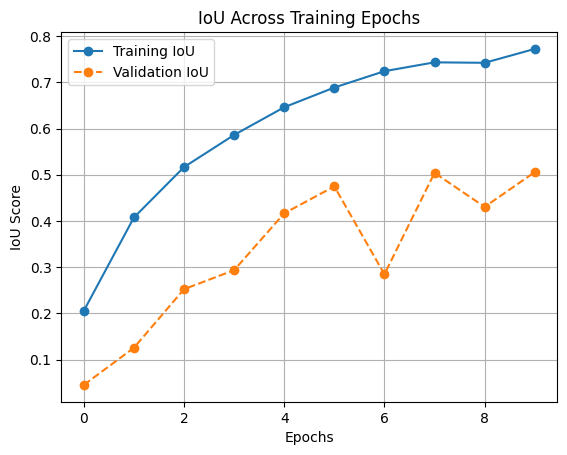

In [15]:
""" Model """
model = build_unet((H, W, 3))

model.compile(loss=dice_loss, optimizer=Adam(lr), metrics=[iou])

callbacks = [
    ModelCheckpoint(model_path, verbose=1, save_best_only=True, monitor="val_iou"),
    ReduceLROnPlateau(monitor="val_iou", factor=0.1, patience=10, min_lr=1e-7, verbose=2),
    EarlyStopping(monitor="val_iou",mode="max", patience=50, restore_best_weights=True),
    CSVLogger(csv_path),
    TensorBoard(),
]

#callbacks = [
   # ModelCheckpoint(model_path, verbose=1, save_best_only=True),
    #ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-7, verbose=2),
    #CSVLogger(csv_path),
    #TensorBoard(),
    #EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=False),
#]

# Train the model with dataset
history= model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=callbacks,
    shuffle=False
)

import matplotlib.pyplot as plt

# Extract IoU from training history
epochs = range(len(history.history["iou"]))

plt.plot(epochs, history.history["iou"], label="Training IoU", marker="o")
plt.plot(epochs, history.history["val_iou"], label="Validation IoU", marker="o", linestyle="dashed")

plt.xlabel("Epochs")
plt.ylabel("IoU Score")
plt.title("IoU Across Training Epochs")
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


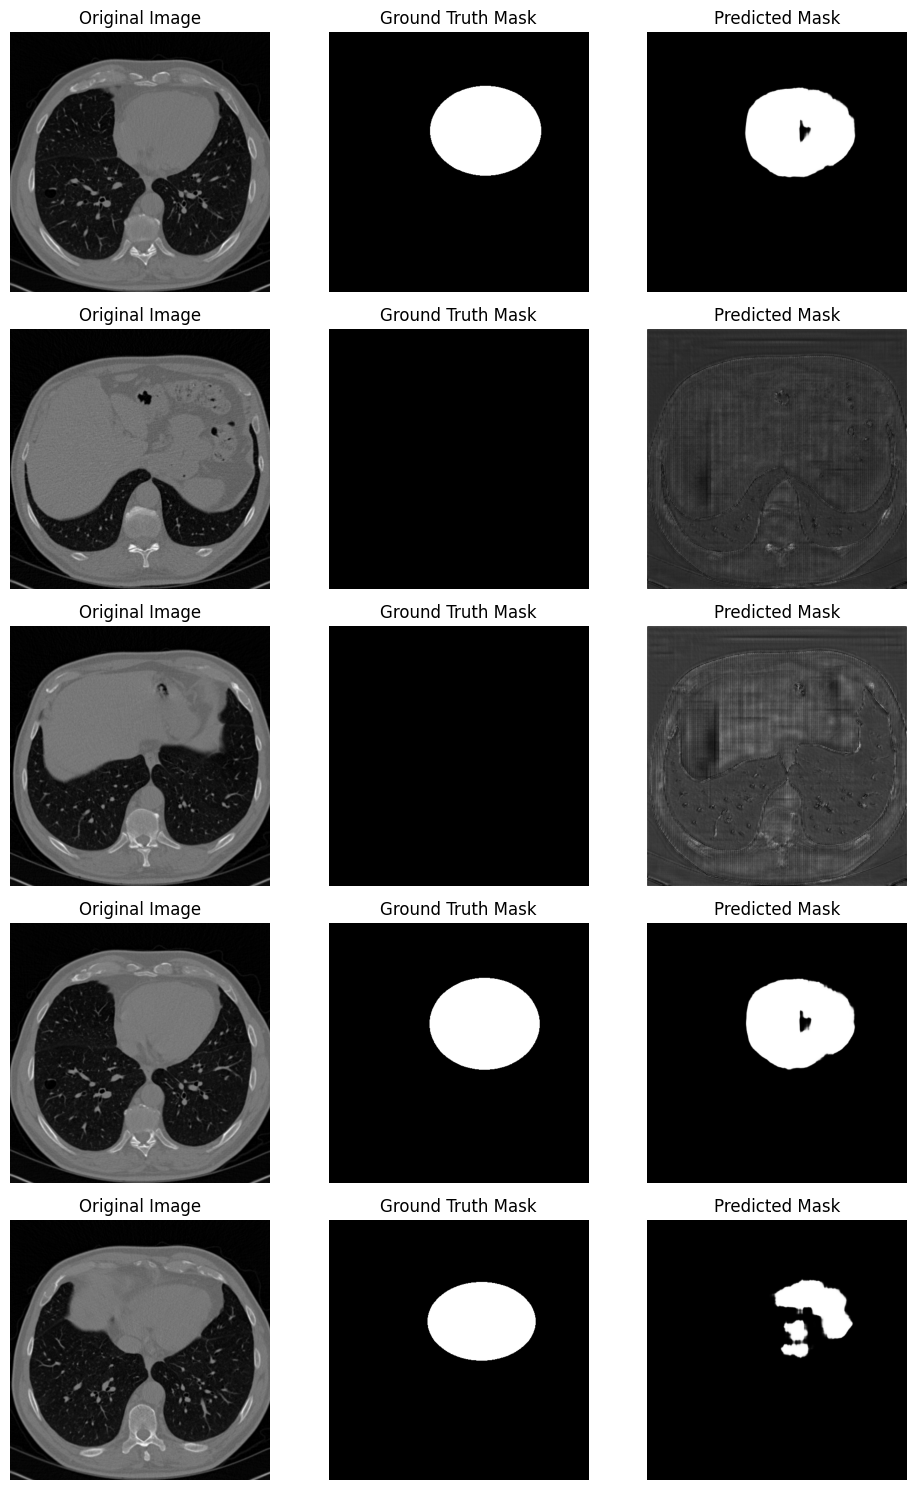

In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Select a few random images from the validation set
num_samples = 5  # Adjust as needed
valid_dataset = valid_dataset.shuffle(1000)  # Shuffle dataset to get different images
val_batch = next(iter(valid_dataset))  # Get a random batch

val_images, val_masks = val_batch  # Unpack images and masks

# Convert tensors to numpy arrays for easier indexing
val_images = val_images.numpy()
val_masks = val_masks.numpy()

# Randomly select indices for different images
random_indices = np.random.choice(len(val_images), num_samples, replace=False)

# Get predictions for the selected images
pred_masks = model.predict(val_images[random_indices])

# Plot images, ground truth masks, and predicted masks side by side
fig, axes = plt.subplots(num_samples, 3, figsize=(10, num_samples * 3))

for i, idx in enumerate(random_indices):
    axes[i, 0].imshow(val_images[idx])
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(val_masks[idx], cmap="gray")
    axes[i, 1].set_title("Ground Truth Mask")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(pred_masks[i], cmap="gray")
    axes[i, 2].set_title("Predicted Mask")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()



In [22]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score

H = 512
W = 512

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def save_results(image, mask, y_pred, save_image_path):
    ## i - m - y
    line = np.ones((H, 10, 3)) * 128

    """ Mask """
    mask = np.expand_dims(mask, axis=-1)    ## (512, 512, 1)
    mask = np.concatenate([mask, mask, mask], axis=-1)  ## (512, 512, 3)

    """ Predicted Mask """
    y_pred = np.expand_dims(y_pred, axis=-1)    ## (512, 512, 1)
    y_pred = np.concatenate([y_pred, y_pred, y_pred], axis=-1)  ## (512, 512, 3)
    y_pred = y_pred * 255

    cat_images = np.concatenate([image, line, mask, line, y_pred], axis=1)
    cv2.imwrite(save_image_path, cat_images)

if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("results")

    """ Loading model """
    with CustomObjectScope({'iou': iou, 'dice_coefficient': dice_coefficient, 'dice_loss': dice_loss}):
        model = tf.keras.models.load_model("files/model.h5")

    """ Load the dataset """
    test_x = sorted(glob(os.path.join("new_data", "valid", "image", "*")))
    test_y = sorted(glob(os.path.join("new_data", "valid", "mask", "*")))
    print(f"Test: {len(test_x)} - {len(test_y)}")

    """ Evaluation and Prediction """
    SCORE = []
    for x, y in tqdm(zip(test_x, test_y), total=len(test_x)):
        """ Extract the name """
        name = x.split("/")[-1].split(".")[0]

        """ Reading the image """
        image = cv2.imread(x, cv2.IMREAD_COLOR)
        x = image/255.0
        x = np.expand_dims(x, axis=0)

        """ Reading the mask """
        mask = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
        y = mask/255.0
        y = y > 0.5
        y = y.astype(np.int32)

        """ Prediction """
        y_pred = model.predict(x)[0]
        y_pred = np.squeeze(y_pred, axis=-1)
        y_pred = y_pred > 0.5
        y_pred = y_pred.astype(np.int32)

        """ Saving the prediction """
        save_image_path = f"results/{name}.png"
        save_results(image, mask, y_pred, save_image_path)

        """ Flatten the array """
        y = y.flatten()
        y_pred = y_pred.flatten()

        """ Calculating the metrics values """
        acc_value = accuracy_score(y, y_pred)
        f1_value = f1_score(y, y_pred, labels=[0, 1], average="binary", zero_division=1)
        jac_value = jaccard_score(y, y_pred, labels=[0, 1], average="binary", zero_division=1)
        recall_value = recall_score(y, y_pred, labels=[0, 1], average="binary", zero_division=1)
        precision_value = precision_score(y, y_pred, labels=[0, 1], average="binary", zero_division=1)
        SCORE.append([name, acc_value, f1_value, jac_value, recall_value, precision_value])

    """ Metrics values """
    score = [s[1:]for s in SCORE]
    score = np.mean(score, axis=0)
    print(f"Accuracy: {score[0]:0.5f}")
    print(f"F1: {score[1]:0.5f}")
    print(f"Jaccard: {score[2]:0.5f}")
    print(f"Recall: {score[3]:0.5f}")
    print(f"Precision: {score[4]:0.5f}")

    df = pd.DataFrame(SCORE, columns=["Image", "Accuracy", "F1", "Jaccard", "Recall", "Precision"])
    df.to_csv("files/score.csv")

Test: 506 - 506


  0%|          | 0/506 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


  0%|          | 1/506 [00:10<1:27:06, 10.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  0%|          | 2/506 [00:10<37:05,  4.42s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


  1%|          | 3/506 [00:10<21:05,  2.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  1%|          | 4/506 [00:11<13:25,  1.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|          | 5/506 [00:11<09:12,  1.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  1%|          | 6/506 [00:11<06:40,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  1%|▏         | 7/506 [00:11<05:04,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  2%|▏         | 8/506 [00:11<04:10,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  2%|▏         | 9/506 [00:12<03:31,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  2%|▏         | 10/506 [00:12<02:59,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  2%|▏         | 11/506 [00:12<02:42,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  2%|▏         | 12/506 [00:12<02:26,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  3%|▎         | 13/506 [00:13<02:13,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  3%|▎         | 14/506 [00:13<02:06,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


  3%|▎         | 15/506 [00:13<02:00,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  3%|▎         | 16/506 [00:13<01:59,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  3%|▎         | 17/506 [00:14<02:00,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▎         | 18/506 [00:14<01:57,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  4%|▍         | 19/506 [00:14<01:58,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  4%|▍         | 20/506 [00:14<02:00,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  4%|▍         | 21/506 [00:15<02:04,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  4%|▍         | 22/506 [00:15<01:58,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  5%|▍         | 23/506 [00:15<01:53,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▍         | 24/506 [00:15<01:55,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▍         | 25/506 [00:16<01:51,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  5%|▌         | 26/506 [00:16<01:54,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  5%|▌         | 27/506 [00:16<01:56,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  6%|▌         | 28/506 [00:16<01:57,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


  6%|▌         | 29/506 [00:17<02:01,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  6%|▌         | 30/506 [00:17<02:09,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


  6%|▌         | 31/506 [00:17<02:13,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


  6%|▋         | 32/506 [00:17<02:16,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  7%|▋         | 33/506 [00:18<02:22,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  7%|▋         | 34/506 [00:18<02:23,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  7%|▋         | 35/506 [00:18<02:22,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  7%|▋         | 36/506 [00:19<02:22,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  7%|▋         | 37/506 [00:19<02:23,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  8%|▊         | 38/506 [00:19<02:23,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  8%|▊         | 39/506 [00:20<02:11,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  8%|▊         | 40/506 [00:20<02:01,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  8%|▊         | 41/506 [00:20<02:00,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  8%|▊         | 42/506 [00:20<01:54,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  8%|▊         | 43/506 [00:20<01:49,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▊         | 44/506 [00:21<01:48,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  9%|▉         | 45/506 [00:21<01:50,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


  9%|▉         | 46/506 [00:21<01:47,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


  9%|▉         | 47/506 [00:21<01:45,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


  9%|▉         | 48/506 [00:22<01:48,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 10%|▉         | 49/506 [00:22<01:50,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 10%|▉         | 50/506 [00:22<01:47,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 10%|█         | 51/506 [00:22<01:50,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 10%|█         | 52/506 [00:23<01:50,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 10%|█         | 53/506 [00:23<01:51,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 11%|█         | 54/506 [00:23<01:52,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 11%|█         | 55/506 [00:23<01:53,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 11%|█         | 56/506 [00:24<01:53,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 11%|█▏        | 57/506 [00:24<01:49,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 11%|█▏        | 58/506 [00:24<01:50,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 12%|█▏        | 59/506 [00:24<01:50,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 60/506 [00:25<01:46,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 12%|█▏        | 61/506 [00:25<01:49,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 62/506 [00:25<01:45,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 12%|█▏        | 63/506 [00:25<01:41,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 13%|█▎        | 64/506 [00:26<01:44,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 13%|█▎        | 65/506 [00:26<01:46,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 13%|█▎        | 66/506 [00:26<01:49,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 13%|█▎        | 67/506 [00:26<01:50,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 13%|█▎        | 68/506 [00:27<01:46,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 14%|█▎        | 69/506 [00:27<01:47,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 14%|█▍        | 70/506 [00:27<01:46,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 14%|█▍        | 71/506 [00:27<01:46,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 14%|█▍        | 72/506 [00:28<01:47,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 14%|█▍        | 73/506 [00:28<01:47,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 15%|█▍        | 74/506 [00:28<01:47,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 15%|█▍        | 75/506 [00:28<01:47,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 15%|█▌        | 76/506 [00:29<01:47,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 15%|█▌        | 77/506 [00:29<01:43,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 15%|█▌        | 78/506 [00:29<01:42,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 16%|█▌        | 79/506 [00:29<01:39,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 16%|█▌        | 80/506 [00:29<01:47,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 16%|█▌        | 81/506 [00:30<01:53,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 16%|█▌        | 82/506 [00:30<01:57,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 16%|█▋        | 83/506 [00:30<02:00,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 17%|█▋        | 84/506 [00:31<02:02,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 17%|█▋        | 85/506 [00:31<02:04,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 17%|█▋        | 86/506 [00:31<02:05,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 87/506 [00:32<02:06,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 17%|█▋        | 88/506 [00:32<02:07,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 18%|█▊        | 89/506 [00:32<02:06,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 18%|█▊        | 90/506 [00:32<02:03,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 18%|█▊        | 91/506 [00:33<01:58,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 18%|█▊        | 92/506 [00:33<01:49,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 18%|█▊        | 93/506 [00:33<01:48,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 19%|█▊        | 94/506 [00:33<01:47,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 19%|█▉        | 95/506 [00:34<01:41,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 19%|█▉        | 96/506 [00:34<01:37,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 19%|█▉        | 97/506 [00:34<01:40,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 19%|█▉        | 98/506 [00:34<01:41,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 20%|█▉        | 99/506 [00:35<01:42,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 20%|█▉        | 100/506 [00:35<01:42,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 20%|█▉        | 101/506 [00:35<01:44,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 20%|██        | 102/506 [00:35<01:44,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 20%|██        | 103/506 [00:36<01:43,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 21%|██        | 104/506 [00:36<01:38,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 21%|██        | 105/506 [00:36<01:39,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 21%|██        | 106/506 [00:36<01:37,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 21%|██        | 107/506 [00:37<01:33,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 21%|██▏       | 108/506 [00:37<01:35,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 22%|██▏       | 109/506 [00:37<01:32,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 22%|██▏       | 110/506 [00:37<01:35,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 22%|██▏       | 111/506 [00:38<01:37,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 22%|██▏       | 112/506 [00:38<01:33,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 22%|██▏       | 113/506 [00:38<01:35,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 23%|██▎       | 114/506 [00:38<01:33,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 23%|██▎       | 115/506 [00:39<01:30,  4.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 23%|██▎       | 116/506 [00:39<01:29,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 23%|██▎       | 117/506 [00:39<01:31,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 23%|██▎       | 118/506 [00:39<01:34,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 24%|██▎       | 119/506 [00:40<01:32,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 24%|██▎       | 120/506 [00:40<01:29,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 24%|██▍       | 121/506 [00:40<01:32,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 24%|██▍       | 122/506 [00:40<01:34,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 24%|██▍       | 123/506 [00:40<01:31,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 25%|██▍       | 124/506 [00:41<01:32,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 25%|██▍       | 125/506 [00:41<01:34,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 25%|██▍       | 126/506 [00:41<01:35,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 25%|██▌       | 127/506 [00:42<01:36,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 25%|██▌       | 128/506 [00:42<01:32,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 25%|██▌       | 129/506 [00:42<01:33,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 26%|██▌       | 130/506 [00:42<01:30,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 26%|██▌       | 131/506 [00:43<01:35,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 26%|██▌       | 132/506 [00:43<01:40,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 26%|██▋       | 133/506 [00:43<01:42,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 26%|██▋       | 134/506 [00:43<01:45,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 27%|██▋       | 135/506 [00:44<01:47,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 27%|██▋       | 136/506 [00:44<01:48,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 27%|██▋       | 137/506 [00:44<01:46,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 27%|██▋       | 138/506 [00:45<01:46,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 27%|██▋       | 139/506 [00:45<01:47,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 28%|██▊       | 140/506 [00:45<01:48,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 28%|██▊       | 141/506 [00:45<01:46,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 28%|██▊       | 142/506 [00:46<01:42,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 28%|██▊       | 143/506 [00:46<01:40,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 28%|██▊       | 144/506 [00:46<01:33,  3.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|██▊       | 145/506 [00:46<01:33,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 29%|██▉       | 146/506 [00:47<01:33,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|██▉       | 147/506 [00:47<01:28,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 29%|██▉       | 148/506 [00:47<01:29,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 29%|██▉       | 149/506 [00:47<01:29,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 30%|██▉       | 150/506 [00:48<01:31,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 30%|██▉       | 151/506 [00:48<01:31,  3.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 30%|███       | 152/506 [00:48<01:30,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 30%|███       | 153/506 [00:48<01:26,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 30%|███       | 154/506 [00:49<01:28,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 31%|███       | 155/506 [00:49<01:24,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 31%|███       | 156/506 [00:49<01:21,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 31%|███       | 157/506 [00:49<01:19,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 31%|███       | 158/506 [00:50<01:17,  4.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 31%|███▏      | 159/506 [00:50<01:18,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 32%|███▏      | 160/506 [00:50<01:20,  4.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 32%|███▏      | 161/506 [00:50<01:22,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 32%|███▏      | 162/506 [00:51<01:24,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 32%|███▏      | 163/506 [00:51<01:25,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 32%|███▏      | 164/506 [00:51<01:26,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 33%|███▎      | 165/506 [00:51<01:27,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 33%|███▎      | 166/506 [00:52<01:22,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 33%|███▎      | 167/506 [00:52<01:19,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 33%|███▎      | 168/506 [00:52<01:22,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 33%|███▎      | 169/506 [00:52<01:22,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 34%|███▎      | 170/506 [00:53<01:19,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 34%|███▍      | 171/506 [00:53<01:21,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 34%|███▍      | 172/506 [00:53<01:23,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 34%|███▍      | 173/506 [00:53<01:19,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 34%|███▍      | 174/506 [00:53<01:17,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 35%|███▍      | 175/506 [00:54<01:20,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 35%|███▍      | 176/506 [00:54<01:21,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 35%|███▍      | 177/506 [00:54<01:19,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 35%|███▌      | 178/506 [00:54<01:20,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 35%|███▌      | 179/506 [00:55<01:17,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 36%|███▌      | 180/506 [00:55<01:16,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 36%|███▌      | 181/506 [00:55<01:18,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 36%|███▌      | 182/506 [00:55<01:22,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 36%|███▌      | 183/506 [00:56<01:27,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 36%|███▋      | 184/506 [00:56<01:30,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 37%|███▋      | 185/506 [00:56<01:34,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 37%|███▋      | 186/506 [00:57<01:36,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 37%|███▋      | 187/506 [00:57<01:39,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 37%|███▋      | 188/506 [00:57<01:38,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 37%|███▋      | 189/506 [00:58<01:38,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 38%|███▊      | 190/506 [00:58<01:37,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 38%|███▊      | 191/506 [00:58<01:36,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 38%|███▊      | 192/506 [00:59<01:33,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 38%|███▊      | 193/506 [00:59<01:29,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 38%|███▊      | 194/506 [00:59<01:22,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 39%|███▊      | 195/506 [00:59<01:21,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 39%|███▊      | 196/506 [01:00<01:20,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 39%|███▉      | 197/506 [01:00<01:19,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 39%|███▉      | 198/506 [01:00<01:16,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 39%|███▉      | 199/506 [01:00<01:17,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 40%|███▉      | 200/506 [01:01<01:14,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 40%|███▉      | 201/506 [01:01<01:14,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 40%|███▉      | 202/506 [01:01<01:12,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 40%|████      | 203/506 [01:01<01:13,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 40%|████      | 204/506 [01:01<01:11,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 41%|████      | 205/506 [01:02<01:12,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 41%|████      | 206/506 [01:02<01:14,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 41%|████      | 207/506 [01:02<01:15,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 41%|████      | 208/506 [01:02<01:16,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 41%|████▏     | 209/506 [01:03<01:13,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 210/506 [01:03<01:14,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 211/506 [01:03<01:12,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 212/506 [01:03<01:10,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 213/506 [01:04<01:11,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 214/506 [01:04<01:09,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 42%|████▏     | 215/506 [01:04<01:10,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 43%|████▎     | 216/506 [01:04<01:11,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 43%|████▎     | 217/506 [01:05<01:09,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 218/506 [01:05<01:07,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 219/506 [01:05<01:09,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 220/506 [01:05<01:08,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▎     | 221/506 [01:06<01:06,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 222/506 [01:06<01:08,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 223/506 [01:06<01:10,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 44%|████▍     | 224/506 [01:06<01:11,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 44%|████▍     | 225/506 [01:07<01:09,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▍     | 226/506 [01:07<01:10,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▍     | 227/506 [01:07<01:11,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▌     | 228/506 [01:07<01:10,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 45%|████▌     | 229/506 [01:08<01:10,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▌     | 230/506 [01:08<01:10,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 46%|████▌     | 231/506 [01:08<01:10,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████▌     | 232/506 [01:08<01:10,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 46%|████▌     | 233/506 [01:09<01:13,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 46%|████▌     | 234/506 [01:09<01:15,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 46%|████▋     | 235/506 [01:09<01:18,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 47%|████▋     | 236/506 [01:10<01:18,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 47%|████▋     | 237/506 [01:10<01:18,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 238/506 [01:10<01:18,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 239/506 [01:11<01:19,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 47%|████▋     | 240/506 [01:11<01:18,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 48%|████▊     | 241/506 [01:11<01:19,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 48%|████▊     | 242/506 [01:11<01:19,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 48%|████▊     | 243/506 [01:12<01:16,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 48%|████▊     | 244/506 [01:12<01:13,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 48%|████▊     | 245/506 [01:12<01:11,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 49%|████▊     | 246/506 [01:12<01:09,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 49%|████▉     | 247/506 [01:13<01:08,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 49%|████▉     | 248/506 [01:13<01:07,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 49%|████▉     | 249/506 [01:13<01:07,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 49%|████▉     | 250/506 [01:13<01:03,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 50%|████▉     | 251/506 [01:14<01:04,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 50%|████▉     | 252/506 [01:14<01:01,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 50%|█████     | 253/506 [01:14<01:02,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 50%|█████     | 254/506 [01:14<01:03,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 50%|█████     | 255/506 [01:15<01:01,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 51%|█████     | 256/506 [01:15<00:59,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 51%|█████     | 257/506 [01:15<01:01,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 51%|█████     | 258/506 [01:15<00:59,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 51%|█████     | 259/506 [01:16<01:00,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 51%|█████▏    | 260/506 [01:16<01:01,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 52%|█████▏    | 261/506 [01:16<01:02,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 52%|█████▏    | 262/506 [01:16<01:01,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 52%|█████▏    | 263/506 [01:17<00:59,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 52%|█████▏    | 264/506 [01:17<01:00,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 52%|█████▏    | 265/506 [01:17<00:58,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 53%|█████▎    | 266/506 [01:17<00:56,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 53%|█████▎    | 267/506 [01:18<00:55,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 53%|█████▎    | 268/506 [01:18<00:55,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 53%|█████▎    | 269/506 [01:18<00:54,  4.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 53%|█████▎    | 270/506 [01:18<00:53,  4.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 54%|█████▎    | 271/506 [01:18<00:53,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 54%|█████▍    | 272/506 [01:19<00:55,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 54%|█████▍    | 273/506 [01:19<00:55,  4.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 54%|█████▍    | 274/506 [01:19<00:56,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 54%|█████▍    | 275/506 [01:19<00:55,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 55%|█████▍    | 276/506 [01:20<00:53,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 55%|█████▍    | 277/506 [01:20<00:55,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 55%|█████▍    | 278/506 [01:20<00:53,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 55%|█████▌    | 279/506 [01:20<00:54,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 55%|█████▌    | 280/506 [01:21<00:55,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 56%|█████▌    | 281/506 [01:21<00:54,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 56%|█████▌    | 282/506 [01:21<00:55,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 56%|█████▌    | 283/506 [01:21<00:53,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 56%|█████▌    | 284/506 [01:22<00:54,  4.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 56%|█████▋    | 285/506 [01:22<00:58,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 57%|█████▋    | 286/506 [01:22<01:02,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 57%|█████▋    | 287/506 [01:23<01:05,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 57%|█████▋    | 288/506 [01:23<01:03,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 57%|█████▋    | 289/506 [01:23<01:05,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 57%|█████▋    | 290/506 [01:24<01:03,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 58%|█████▊    | 291/506 [01:24<01:03,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


 58%|█████▊    | 292/506 [01:24<01:04,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 58%|█████▊    | 293/506 [01:24<01:03,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 58%|█████▊    | 294/506 [01:25<01:00,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 58%|█████▊    | 295/506 [01:25<00:58,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 58%|█████▊    | 296/506 [01:25<00:54,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 59%|█████▊    | 297/506 [01:25<00:52,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 59%|█████▉    | 298/506 [01:26<00:50,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 59%|█████▉    | 299/506 [01:26<00:48,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 59%|█████▉    | 300/506 [01:26<00:49,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 59%|█████▉    | 301/506 [01:26<00:51,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 60%|█████▉    | 302/506 [01:27<00:51,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 60%|█████▉    | 303/506 [01:27<00:49,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|██████    | 304/506 [01:27<00:50,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 60%|██████    | 305/506 [01:27<00:50,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 60%|██████    | 306/506 [01:28<00:50,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 61%|██████    | 307/506 [01:28<00:52,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 61%|██████    | 308/506 [01:28<00:51,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 61%|██████    | 309/506 [01:28<00:49,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 61%|██████▏   | 310/506 [01:29<00:49,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 61%|██████▏   | 311/506 [01:29<00:49,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 62%|██████▏   | 312/506 [01:29<00:47,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 62%|██████▏   | 313/506 [01:29<00:46,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 62%|██████▏   | 314/506 [01:30<00:46,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 62%|██████▏   | 315/506 [01:30<00:46,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 62%|██████▏   | 316/506 [01:30<00:47,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 63%|██████▎   | 317/506 [01:30<00:47,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 63%|██████▎   | 318/506 [01:31<00:47,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 63%|██████▎   | 319/506 [01:31<00:47,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 63%|██████▎   | 320/506 [01:31<00:47,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 63%|██████▎   | 321/506 [01:31<00:47,  3.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 64%|██████▎   | 322/506 [01:32<00:45,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 64%|██████▍   | 323/506 [01:32<00:45,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 64%|██████▍   | 324/506 [01:32<00:45,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 64%|██████▍   | 325/506 [01:32<00:45,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 64%|██████▍   | 326/506 [01:33<00:43,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 65%|██████▍   | 327/506 [01:33<00:42,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 65%|██████▍   | 328/506 [01:33<00:40,  4.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 65%|██████▌   | 329/506 [01:33<00:40,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 65%|██████▌   | 330/506 [01:33<00:39,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 65%|██████▌   | 331/506 [01:34<00:38,  4.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 66%|██████▌   | 332/506 [01:34<00:38,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 66%|██████▌   | 333/506 [01:34<00:40,  4.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 66%|██████▌   | 334/506 [01:34<00:41,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 66%|██████▌   | 335/506 [01:35<00:43,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 66%|██████▋   | 336/506 [01:35<00:45,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 67%|██████▋   | 337/506 [01:35<00:46,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 67%|██████▋   | 338/506 [01:36<00:47,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 67%|██████▋   | 339/506 [01:36<00:48,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 67%|██████▋   | 340/506 [01:36<00:49,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 67%|██████▋   | 341/506 [01:37<00:49,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 68%|██████▊   | 342/506 [01:37<00:49,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 68%|██████▊   | 343/506 [01:37<00:50,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 68%|██████▊   | 344/506 [01:37<00:49,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 68%|██████▊   | 345/506 [01:38<00:47,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 68%|██████▊   | 346/506 [01:38<00:44,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 69%|██████▊   | 347/506 [01:38<00:41,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 69%|██████▉   | 348/506 [01:38<00:39,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 69%|██████▉   | 349/506 [01:39<00:39,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 69%|██████▉   | 350/506 [01:39<00:38,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 69%|██████▉   | 351/506 [01:39<00:38,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 70%|██████▉   | 352/506 [01:39<00:38,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 70%|██████▉   | 353/506 [01:40<00:37,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 70%|██████▉   | 354/506 [01:40<00:36,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 70%|███████   | 355/506 [01:40<00:37,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 70%|███████   | 356/506 [01:40<00:35,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 71%|███████   | 357/506 [01:41<00:36,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 71%|███████   | 358/506 [01:41<00:37,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 71%|███████   | 359/506 [01:41<00:35,  4.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 71%|███████   | 360/506 [01:41<00:36,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 71%|███████▏  | 361/506 [01:42<00:35,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 72%|███████▏  | 362/506 [01:42<00:35,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 72%|███████▏  | 363/506 [01:42<00:34,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 72%|███████▏  | 364/506 [01:42<00:33,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 72%|███████▏  | 365/506 [01:43<00:33,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 72%|███████▏  | 366/506 [01:43<00:33,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 73%|███████▎  | 367/506 [01:43<00:32,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 73%|███████▎  | 368/506 [01:43<00:33,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 73%|███████▎  | 369/506 [01:44<00:33,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 73%|███████▎  | 370/506 [01:44<00:32,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 73%|███████▎  | 371/506 [01:44<00:31,  4.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 74%|███████▎  | 372/506 [01:44<00:30,  4.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 74%|███████▎  | 373/506 [01:44<00:30,  4.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 74%|███████▍  | 374/506 [01:45<00:31,  4.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 74%|███████▍  | 375/506 [01:45<00:30,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 74%|███████▍  | 376/506 [01:45<00:30,  4.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 75%|███████▍  | 377/506 [01:45<00:30,  4.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 75%|███████▍  | 378/506 [01:46<00:31,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 75%|███████▍  | 379/506 [01:46<00:31,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 75%|███████▌  | 380/506 [01:46<00:30,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 75%|███████▌  | 381/506 [01:46<00:30,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 75%|███████▌  | 382/506 [01:47<00:29,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 76%|███████▌  | 383/506 [01:47<00:28,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 76%|███████▌  | 384/506 [01:47<00:30,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 76%|███████▌  | 385/506 [01:47<00:30,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 76%|███████▋  | 386/506 [01:48<00:30,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 76%|███████▋  | 387/506 [01:48<00:32,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 77%|███████▋  | 388/506 [01:48<00:33,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 77%|███████▋  | 389/506 [01:49<00:34,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 77%|███████▋  | 390/506 [01:49<00:34,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


 77%|███████▋  | 391/506 [01:49<00:35,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 77%|███████▋  | 392/506 [01:50<00:35,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 78%|███████▊  | 393/506 [01:50<00:34,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 78%|███████▊  | 394/506 [01:50<00:34,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 78%|███████▊  | 395/506 [01:50<00:34,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 78%|███████▊  | 396/506 [01:51<00:33,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 78%|███████▊  | 397/506 [01:51<00:30,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 79%|███████▊  | 398/506 [01:51<00:29,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 79%|███████▉  | 399/506 [01:52<00:28,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 79%|███████▉  | 400/506 [01:52<00:28,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 79%|███████▉  | 401/506 [01:52<00:26,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 79%|███████▉  | 402/506 [01:52<00:26,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 80%|███████▉  | 403/506 [01:52<00:26,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 80%|███████▉  | 404/506 [01:53<00:25,  4.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 80%|████████  | 405/506 [01:53<00:25,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 80%|████████  | 406/506 [01:53<00:25,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 80%|████████  | 407/506 [01:54<00:25,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 81%|████████  | 408/506 [01:54<00:24,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 81%|████████  | 409/506 [01:54<00:24,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 81%|████████  | 410/506 [01:54<00:24,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 81%|████████  | 411/506 [01:55<00:23,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 81%|████████▏ | 412/506 [01:55<00:23,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 82%|████████▏ | 413/506 [01:55<00:22,  4.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 82%|████████▏ | 414/506 [01:55<00:21,  4.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 82%|████████▏ | 415/506 [01:55<00:22,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 82%|████████▏ | 416/506 [01:56<00:21,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 82%|████████▏ | 417/506 [01:56<00:21,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 83%|████████▎ | 418/506 [01:56<00:21,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 83%|████████▎ | 419/506 [01:56<00:21,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 83%|████████▎ | 420/506 [01:57<00:21,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 83%|████████▎ | 421/506 [01:57<00:21,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 83%|████████▎ | 422/506 [01:57<00:20,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 84%|████████▎ | 423/506 [01:57<00:20,  4.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 84%|████████▍ | 424/506 [01:58<00:20,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 84%|████████▍ | 425/506 [01:58<00:19,  4.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 84%|████████▍ | 426/506 [01:58<00:19,  4.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 84%|████████▍ | 427/506 [01:58<00:19,  4.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 85%|████████▍ | 428/506 [01:59<00:19,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 85%|████████▍ | 429/506 [01:59<00:19,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 85%|████████▍ | 430/506 [01:59<00:19,  3.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 85%|████████▌ | 431/506 [01:59<00:19,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 85%|████████▌ | 432/506 [02:00<00:18,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 86%|████████▌ | 433/506 [02:00<00:18,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 86%|████████▌ | 434/506 [02:00<00:18,  3.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 86%|████████▌ | 435/506 [02:00<00:18,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 86%|████████▌ | 436/506 [02:01<00:17,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 86%|████████▋ | 437/506 [02:01<00:18,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 87%|████████▋ | 438/506 [02:01<00:18,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 87%|████████▋ | 439/506 [02:02<00:18,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 87%|████████▋ | 440/506 [02:02<00:18,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 87%|████████▋ | 441/506 [02:02<00:18,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 87%|████████▋ | 442/506 [02:02<00:18,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 88%|████████▊ | 443/506 [02:03<00:18,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 88%|████████▊ | 444/506 [02:03<00:18,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 88%|████████▊ | 445/506 [02:03<00:18,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 88%|████████▊ | 446/506 [02:04<00:18,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 88%|████████▊ | 447/506 [02:04<00:17,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 89%|████████▊ | 448/506 [02:04<00:15,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 89%|████████▊ | 449/506 [02:04<00:14,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 89%|████████▉ | 450/506 [02:05<00:14,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 89%|████████▉ | 451/506 [02:05<00:13,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 89%|████████▉ | 452/506 [02:05<00:13,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 90%|████████▉ | 453/506 [02:05<00:12,  4.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 90%|████████▉ | 454/506 [02:06<00:12,  4.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 90%|████████▉ | 455/506 [02:06<00:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 90%|█████████ | 456/506 [02:06<00:12,  4.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 90%|█████████ | 457/506 [02:06<00:11,  4.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 91%|█████████ | 458/506 [02:07<00:11,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 91%|█████████ | 459/506 [02:07<00:11,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 91%|█████████ | 460/506 [02:07<00:11,  4.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 91%|█████████ | 461/506 [02:07<00:11,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 91%|█████████▏| 462/506 [02:08<00:11,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 92%|█████████▏| 463/506 [02:08<00:11,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 92%|█████████▏| 464/506 [02:08<00:11,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 92%|█████████▏| 465/506 [02:08<00:10,  3.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 92%|█████████▏| 466/506 [02:09<00:10,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 92%|█████████▏| 467/506 [02:09<00:10,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 92%|█████████▏| 468/506 [02:09<00:09,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 93%|█████████▎| 469/506 [02:09<00:09,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 93%|█████████▎| 470/506 [02:10<00:09,  4.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 93%|█████████▎| 471/506 [02:10<00:08,  3.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 93%|█████████▎| 472/506 [02:10<00:08,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 93%|█████████▎| 473/506 [02:10<00:08,  4.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 94%|█████████▎| 474/506 [02:11<00:07,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 94%|█████████▍| 475/506 [02:11<00:07,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 94%|█████████▍| 476/506 [02:11<00:07,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 94%|█████████▍| 477/506 [02:11<00:07,  3.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 94%|█████████▍| 478/506 [02:12<00:07,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 95%|█████████▍| 479/506 [02:12<00:06,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 95%|█████████▍| 480/506 [02:12<00:06,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 95%|█████████▌| 481/506 [02:12<00:06,  3.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 95%|█████████▌| 482/506 [02:13<00:06,  3.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 95%|█████████▌| 483/506 [02:13<00:05,  3.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 96%|█████████▌| 484/506 [02:13<00:05,  4.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 96%|█████████▌| 485/506 [02:13<00:05,  4.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 96%|█████████▌| 486/506 [02:14<00:05,  3.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 96%|█████████▌| 487/506 [02:14<00:05,  3.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 96%|█████████▋| 488/506 [02:14<00:05,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 97%|█████████▋| 489/506 [02:15<00:04,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 97%|█████████▋| 490/506 [02:15<00:04,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 97%|█████████▋| 491/506 [02:15<00:04,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 97%|█████████▋| 492/506 [02:16<00:04,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 97%|█████████▋| 493/506 [02:16<00:03,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 98%|█████████▊| 494/506 [02:16<00:03,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 98%|█████████▊| 495/506 [02:16<00:03,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 98%|█████████▊| 496/506 [02:17<00:03,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 98%|█████████▊| 497/506 [02:17<00:02,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 98%|█████████▊| 498/506 [02:17<00:02,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 99%|█████████▊| 499/506 [02:18<00:01,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 99%|█████████▉| 500/506 [02:18<00:01,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 99%|█████████▉| 501/506 [02:18<00:01,  3.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 99%|█████████▉| 502/506 [02:18<00:01,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 99%|█████████▉| 503/506 [02:19<00:00,  3.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


100%|█████████▉| 504/506 [02:19<00:00,  4.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


100%|█████████▉| 505/506 [02:19<00:00,  4.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


100%|██████████| 506/506 [02:19<00:00,  3.62it/s]

Accuracy: 0.53465
F1: 0.08019
Jaccard: 0.04520
Recall: 0.95073
Precision: 0.04617


In [23]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.9 MB/s eta 0:00:00


In [24]:
import pydicom as dicom
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score

""" Creating a directory """
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

if __name__ == "__main__":
    """ Seeding """
    np.random.seed(42)
    tf.random.set_seed(42)

    """ Directory for storing files """
    create_dir("test")

    """ Loading model """
    with CustomObjectScope({'iou': iou, 'dice_coefficient': dice_coefficient, 'dice_loss': dice_loss}):
        model = tf.keras.models.load_model("files/model.h5")

    """ Load the dataset """
    test_x = glob("data/test/*/*/*.dcm")
    print(f"Test: {len(test_x)}")

    """ Loop over the data """
    for x in tqdm(test_x):
        """ Extract the names """
        dir_name = x.split("/")[-3]
        name = dir_name + "_" + x.split("/")[-1].split(".")[0]

        """ Read the image """
        image = dicom.dcmread(x).pixel_array
        print(image.shape)
        image = np.expand_dims(image, axis=-1)
        print(image.shape)
        image = image/np.max(image) * 255.0
        x = image/255.0
        x = np.concatenate([x, x, x], axis=-1)
        x = np.expand_dims(x, axis=0)

        """ Prediction """
        mask = model.predict(x)[0]
        mask = mask > 0.5
        mask = mask.astype(np.int32)
        mask = mask * 255

        cat_images = np.concatenate([image, mask], axis=1)
        cv2.imwrite(f"test/{name}.png", cat_images)

Test: 832


  0%|          | 0/832 [00:00<?, ?it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


  0%|          | 1/832 [00:03<52:45,  3.81s/it]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  0%|          | 2/832 [00:04<24:23,  1.76s/it]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  0%|          | 3/832 [00:04<15:09,  1.10s/it]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  0%|          | 4/832 [00:04<10:41,  1.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


  1%|          | 5/832 [00:05<08:23,  1.64it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


  1%|          | 6/832 [00:05<06:44,  2.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


  1%|          | 7/832 [00:05<05:43,  2.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  1%|          | 8/832 [00:06<06:13,  2.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


  1%|          | 9/832 [00:06<05:20,  2.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


  1%|          | 10/832 [00:06<04:43,  2.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  1%|▏         | 11/832 [00:06<04:29,  3.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  1%|▏         | 12/832 [00:07<04:57,  2.75it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  2%|▏         | 13/832 [00:07<04:35,  2.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


  2%|▏         | 14/832 [00:07<04:20,  3.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  2%|▏         | 15/832 [00:08<05:00,  2.72it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  2%|▏         | 16/832 [00:08<04:39,  2.92it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


  2%|▏         | 17/832 [00:08<04:31,  3.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  2%|▏         | 18/832 [00:09<05:01,  2.70it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


  2%|▏         | 19/832 [00:09<04:36,  2.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  2%|▏         | 20/832 [00:09<04:10,  3.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


  3%|▎         | 21/832 [00:10<03:53,  3.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


  3%|▎         | 22/832 [00:10<03:50,  3.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


  3%|▎         | 23/832 [00:10<03:41,  3.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


  3%|▎         | 24/832 [00:10<03:36,  3.73it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


  3%|▎         | 25/832 [00:11<03:31,  3.82it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 26/832 [00:11<03:27,  3.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


  3%|▎         | 27/832 [00:11<03:25,  3.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


  3%|▎         | 28/832 [00:11<03:30,  3.82it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


  3%|▎         | 29/832 [00:12<04:08,  3.23it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  4%|▎         | 30/832 [00:12<03:53,  3.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


  4%|▎         | 31/832 [00:12<03:40,  3.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


  4%|▍         | 32/832 [00:13<03:41,  3.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  4%|▍         | 33/832 [00:13<04:25,  3.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  4%|▍         | 34/832 [00:14<05:44,  2.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


  4%|▍         | 35/832 [00:14<06:22,  2.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  4%|▍         | 36/832 [00:15<06:18,  2.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


  4%|▍         | 37/832 [00:15<06:20,  2.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  5%|▍         | 38/832 [00:16<06:39,  1.99it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


  5%|▍         | 39/832 [00:16<06:24,  2.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  5%|▍         | 40/832 [00:17<06:36,  2.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


  5%|▍         | 41/832 [00:17<06:14,  2.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


  5%|▌         | 42/832 [00:18<05:33,  2.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


  5%|▌         | 43/832 [00:18<06:00,  2.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  5%|▌         | 44/832 [00:19<06:21,  2.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


  5%|▌         | 45/832 [00:19<05:20,  2.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  6%|▌         | 46/832 [00:19<04:45,  2.76it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


  6%|▌         | 47/832 [00:19<04:30,  2.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


  6%|▌         | 48/832 [00:20<04:13,  3.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  6%|▌         | 49/832 [00:20<04:30,  2.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


  6%|▌         | 50/832 [00:21<04:47,  2.72it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  6%|▌         | 51/832 [00:21<05:24,  2.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


  6%|▋         | 52/832 [00:21<05:29,  2.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


  6%|▋         | 53/832 [00:22<04:32,  2.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  6%|▋         | 54/832 [00:22<03:59,  3.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 55/832 [00:22<03:35,  3.61it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  7%|▋         | 56/832 [00:22<03:18,  3.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 57/832 [00:22<02:57,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  7%|▋         | 58/832 [00:23<02:44,  4.71it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


  7%|▋         | 59/832 [00:23<02:33,  5.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


  7%|▋         | 60/832 [00:23<02:35,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  7%|▋         | 61/832 [00:23<03:04,  4.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  7%|▋         | 62/832 [00:24<02:56,  4.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


  8%|▊         | 63/832 [00:24<02:53,  4.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 64/832 [00:24<02:48,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  8%|▊         | 65/832 [00:24<02:34,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 66/832 [00:24<02:23,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  8%|▊         | 67/832 [00:24<02:16,  5.60it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  8%|▊         | 68/832 [00:25<02:11,  5.79it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


  8%|▊         | 69/832 [00:25<02:11,  5.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  8%|▊         | 70/832 [00:25<02:19,  5.46it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▊         | 71/832 [00:25<02:27,  5.16it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


  9%|▊         | 72/832 [00:25<02:30,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 73/832 [00:26<02:33,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


  9%|▉         | 74/832 [00:26<02:22,  5.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


  9%|▉         | 75/832 [00:26<02:15,  5.60it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


  9%|▉         | 76/832 [00:26<02:10,  5.80it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  9%|▉         | 77/832 [00:26<02:05,  6.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


  9%|▉         | 78/832 [00:26<02:14,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


  9%|▉         | 79/832 [00:27<02:08,  5.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 10%|▉         | 80/832 [00:27<02:23,  5.24it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 10%|▉         | 81/832 [00:27<02:32,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 10%|▉         | 82/832 [00:27<02:38,  4.72it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 10%|▉         | 83/832 [00:28<02:42,  4.60it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 10%|█         | 84/832 [00:28<02:47,  4.46it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 10%|█         | 85/832 [00:28<02:49,  4.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 10%|█         | 86/832 [00:28<02:49,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 10%|█         | 87/832 [00:28<02:48,  4.42it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 11%|█         | 88/832 [00:29<02:51,  4.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█         | 89/832 [00:29<02:45,  4.49it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 11%|█         | 90/832 [00:29<02:48,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 11%|█         | 91/832 [00:29<02:49,  4.38it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 11%|█         | 92/832 [00:30<02:42,  4.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 11%|█         | 93/832 [00:30<02:39,  4.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 11%|█▏        | 94/832 [00:30<02:29,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 11%|█▏        | 95/832 [00:30<02:22,  5.17it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 12%|█▏        | 96/832 [00:30<02:17,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 97/832 [00:30<02:21,  5.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 98/832 [00:31<02:24,  5.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 99/832 [00:31<02:26,  5.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█▏        | 100/832 [00:31<02:28,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 101/832 [00:31<02:29,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 12%|█▏        | 102/832 [00:31<02:20,  5.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 12%|█▏        | 103/832 [00:32<02:14,  5.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 12%|█▎        | 104/832 [00:32<02:19,  5.23it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|█▎        | 105/832 [00:32<02:24,  5.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 13%|█▎        | 106/832 [00:32<02:15,  5.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 13%|█▎        | 107/832 [00:32<02:19,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|█▎        | 108/832 [00:33<02:22,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 109/832 [00:33<02:23,  5.03it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|█▎        | 110/832 [00:33<02:25,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 13%|█▎        | 111/832 [00:33<02:26,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 13%|█▎        | 112/832 [00:33<02:14,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 14%|█▎        | 113/832 [00:34<02:18,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|█▎        | 114/832 [00:34<02:07,  5.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 14%|█▍        | 115/832 [00:34<02:01,  5.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 14%|█▍        | 116/832 [00:34<02:10,  5.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 14%|█▍        | 117/832 [00:34<02:05,  5.69it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 14%|█▍        | 118/832 [00:35<02:14,  5.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 14%|█▍        | 119/832 [00:35<02:18,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 14%|█▍        | 120/832 [00:35<02:21,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 15%|█▍        | 121/832 [00:35<02:12,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 15%|█▍        | 122/832 [00:35<02:16,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 15%|█▍        | 123/832 [00:35<02:07,  5.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▍        | 124/832 [00:36<02:01,  5.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▌        | 125/832 [00:36<02:08,  5.50it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 15%|█▌        | 126/832 [00:36<02:12,  5.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 15%|█▌        | 127/832 [00:36<02:08,  5.50it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 15%|█▌        | 128/832 [00:36<02:03,  5.71it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|█▌        | 129/832 [00:37<02:09,  5.42it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▌        | 130/832 [00:37<02:14,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 16%|█▌        | 131/832 [00:37<02:07,  5.51it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 16%|█▌        | 132/832 [00:37<02:12,  5.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 16%|█▌        | 133/832 [00:37<02:04,  5.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|█▌        | 134/832 [00:37<01:58,  5.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 16%|█▌        | 135/832 [00:38<02:06,  5.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 16%|█▋        | 136/832 [00:38<02:11,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 16%|█▋        | 137/832 [00:38<02:03,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█▋        | 138/832 [00:38<02:10,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█▋        | 139/832 [00:38<02:02,  5.64it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 17%|█▋        | 140/832 [00:39<02:09,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 17%|█▋        | 141/832 [00:39<02:02,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█▋        | 142/832 [00:39<01:59,  5.79it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█▋        | 143/832 [00:39<01:54,  5.99it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 17%|█▋        | 144/832 [00:39<02:06,  5.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 17%|█▋        | 145/832 [00:39<02:12,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 18%|█▊        | 146/832 [00:40<02:13,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 18%|█▊        | 147/832 [00:40<02:22,  4.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 18%|█▊        | 148/832 [00:40<02:27,  4.64it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 18%|█▊        | 149/832 [00:40<02:35,  4.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 18%|█▊        | 150/832 [00:41<02:37,  4.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 18%|█▊        | 151/832 [00:41<02:29,  4.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 18%|█▊        | 152/832 [00:41<02:24,  4.70it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 18%|█▊        | 153/832 [00:41<02:28,  4.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 19%|█▊        | 154/832 [00:41<02:31,  4.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 19%|█▊        | 155/832 [00:42<02:32,  4.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 19%|█▉        | 156/832 [00:42<02:36,  4.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 19%|█▉        | 157/832 [00:42<02:38,  4.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 19%|█▉        | 158/832 [00:42<02:38,  4.24it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 19%|█▉        | 159/832 [00:43<02:32,  4.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 19%|█▉        | 160/832 [00:43<02:20,  4.79it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 19%|█▉        | 161/832 [00:43<02:19,  4.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 19%|█▉        | 162/832 [00:43<02:11,  5.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 20%|█▉        | 163/832 [00:43<02:13,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 20%|█▉        | 164/832 [00:44<02:14,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 20%|█▉        | 165/832 [00:44<02:06,  5.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 20%|█▉        | 166/832 [00:44<02:02,  5.42it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 20%|██        | 167/832 [00:44<02:07,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 20%|██        | 168/832 [00:44<01:59,  5.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 20%|██        | 169/832 [00:45<02:07,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|██        | 170/832 [00:45<02:09,  5.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 171/832 [00:45<02:00,  5.49it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██        | 172/832 [00:45<01:56,  5.67it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 173/832 [00:45<01:52,  5.83it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 174/832 [00:45<01:49,  6.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 21%|██        | 175/832 [00:46<02:00,  5.47it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|██        | 176/832 [00:46<01:53,  5.79it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 21%|██▏       | 177/832 [00:46<01:50,  5.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|██▏       | 178/832 [00:46<01:58,  5.50it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 179/832 [00:46<01:52,  5.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|██▏       | 180/832 [00:46<01:49,  5.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 181/832 [00:47<01:47,  6.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 22%|██▏       | 182/832 [00:47<01:55,  5.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 183/832 [00:47<01:49,  5.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 184/832 [00:47<01:56,  5.59it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 22%|██▏       | 185/832 [00:47<01:49,  5.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|██▏       | 186/832 [00:47<01:56,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 22%|██▏       | 187/832 [00:48<02:02,  5.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|██▎       | 188/832 [00:48<01:53,  5.69it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 23%|██▎       | 189/832 [00:48<01:58,  5.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 23%|██▎       | 190/832 [00:48<01:52,  5.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 23%|██▎       | 191/832 [00:48<01:59,  5.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 23%|██▎       | 192/832 [00:49<02:04,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 23%|██▎       | 193/832 [00:49<01:55,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 194/832 [00:49<01:59,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 23%|██▎       | 195/832 [00:49<01:51,  5.72it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▎       | 196/832 [00:49<01:46,  5.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 24%|██▎       | 197/832 [00:49<01:54,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 24%|██▍       | 198/832 [00:50<01:50,  5.71it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██▍       | 199/832 [00:50<01:56,  5.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|██▍       | 200/832 [00:50<02:00,  5.24it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 24%|██▍       | 201/832 [00:50<01:52,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 24%|██▍       | 202/832 [00:50<01:58,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 24%|██▍       | 203/832 [00:51<01:55,  5.46it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▍       | 204/832 [00:51<02:00,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▍       | 205/832 [00:51<01:53,  5.53it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 25%|██▍       | 206/832 [00:51<01:59,  5.24it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 25%|██▍       | 207/832 [00:51<02:03,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 208/832 [00:52<02:06,  4.92it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 209/832 [00:52<02:09,  4.82it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 25%|██▌       | 210/832 [00:52<01:58,  5.24it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 25%|██▌       | 211/832 [00:52<02:00,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 25%|██▌       | 212/832 [00:52<01:54,  5.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 26%|██▌       | 213/832 [00:53<01:59,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 26%|██▌       | 214/832 [00:53<02:08,  4.80it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 26%|██▌       | 215/832 [00:53<02:13,  4.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 26%|██▌       | 216/832 [00:53<02:12,  4.66it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 26%|██▌       | 217/832 [00:53<02:10,  4.70it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 26%|██▌       | 218/832 [00:54<02:14,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 26%|██▋       | 219/832 [00:54<02:20,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 26%|██▋       | 220/832 [00:54<02:19,  4.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 27%|██▋       | 221/832 [00:54<02:19,  4.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 27%|██▋       | 222/832 [00:55<02:19,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 27%|██▋       | 223/832 [00:55<02:18,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 27%|██▋       | 224/832 [00:55<02:18,  4.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 27%|██▋       | 225/832 [00:55<02:18,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 27%|██▋       | 226/832 [00:55<02:15,  4.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 27%|██▋       | 227/832 [00:56<02:11,  4.61it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 27%|██▋       | 228/832 [00:56<02:00,  5.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 28%|██▊       | 229/832 [00:56<01:54,  5.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 230/832 [00:56<01:48,  5.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 231/832 [00:56<01:53,  5.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 28%|██▊       | 232/832 [00:57<01:56,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 233/832 [00:57<01:48,  5.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 28%|██▊       | 234/832 [00:57<01:52,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 28%|██▊       | 235/832 [00:57<01:56,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 28%|██▊       | 236/832 [00:57<01:49,  5.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 28%|██▊       | 237/832 [00:58<01:54,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 29%|██▊       | 238/832 [00:58<01:57,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|██▊       | 239/832 [00:58<01:50,  5.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 29%|██▉       | 240/832 [00:58<01:54,  5.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 241/832 [00:58<01:56,  5.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 29%|██▉       | 242/832 [00:59<01:58,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 29%|██▉       | 243/832 [00:59<01:49,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 29%|██▉       | 244/832 [00:59<01:43,  5.67it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 29%|██▉       | 245/832 [00:59<01:41,  5.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 30%|██▉       | 246/832 [00:59<01:47,  5.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 30%|██▉       | 247/832 [00:59<01:41,  5.77it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 248/832 [01:00<01:46,  5.47it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|██▉       | 249/832 [01:00<01:39,  5.84it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|███       | 250/832 [01:00<01:35,  6.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 30%|███       | 251/832 [01:00<01:37,  5.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 30%|███       | 252/832 [01:00<01:45,  5.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 30%|███       | 253/832 [01:00<01:48,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|███       | 254/832 [01:01<01:52,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███       | 255/832 [01:01<01:43,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 256/832 [01:01<01:48,  5.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███       | 257/832 [01:01<01:41,  5.64it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 31%|███       | 258/832 [01:01<01:46,  5.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███       | 259/832 [01:02<01:40,  5.69it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 31%|███▏      | 260/832 [01:02<01:46,  5.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 31%|███▏      | 261/832 [01:02<01:50,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 31%|███▏      | 262/832 [01:02<01:55,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 263/832 [01:02<01:55,  4.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 32%|███▏      | 264/832 [01:03<01:47,  5.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 265/832 [01:03<01:41,  5.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 32%|███▏      | 266/832 [01:03<01:47,  5.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|███▏      | 267/832 [01:03<01:50,  5.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 32%|███▏      | 268/832 [01:03<01:52,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 32%|███▏      | 269/832 [01:03<01:45,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 32%|███▏      | 270/832 [01:04<01:49,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 271/832 [01:04<01:51,  5.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 33%|███▎      | 272/832 [01:04<01:53,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 33%|███▎      | 273/832 [01:04<01:54,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 33%|███▎      | 274/832 [01:05<01:55,  4.82it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 33%|███▎      | 275/832 [01:05<01:49,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 33%|███▎      | 276/832 [01:05<01:44,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 33%|███▎      | 277/832 [01:05<01:49,  5.08it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 33%|███▎      | 278/832 [01:05<01:44,  5.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 34%|███▎      | 279/832 [01:05<01:48,  5.08it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 34%|███▎      | 280/832 [01:06<01:55,  4.79it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 34%|███▍      | 281/832 [01:06<01:52,  4.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 34%|███▍      | 282/832 [01:06<01:51,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 34%|███▍      | 283/832 [01:06<01:54,  4.80it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 34%|███▍      | 284/832 [01:07<01:57,  4.67it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 34%|███▍      | 285/832 [01:07<02:00,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 34%|███▍      | 286/832 [01:07<02:03,  4.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 34%|███▍      | 287/832 [01:07<02:03,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 35%|███▍      | 288/832 [01:07<02:00,  4.53it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 35%|███▍      | 289/832 [01:08<02:01,  4.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 35%|███▍      | 290/832 [01:08<02:02,  4.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 35%|███▍      | 291/832 [01:08<02:04,  4.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 35%|███▌      | 292/832 [01:08<02:01,  4.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 35%|███▌      | 293/832 [01:09<01:58,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 35%|███▌      | 294/832 [01:09<01:56,  4.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 35%|███▌      | 295/832 [01:09<01:48,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 296/832 [01:09<01:42,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 297/832 [01:09<01:45,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 298/832 [01:10<01:47,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 36%|███▌      | 299/832 [01:10<01:40,  5.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 36%|███▌      | 300/832 [01:10<01:44,  5.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 36%|███▌      | 301/832 [01:10<01:46,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 36%|███▋      | 302/832 [01:10<01:48,  4.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 36%|███▋      | 303/832 [01:10<01:42,  5.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 37%|███▋      | 304/832 [01:11<01:37,  5.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 37%|███▋      | 305/832 [01:11<01:33,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 37%|███▋      | 306/832 [01:11<01:38,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 307/832 [01:11<01:34,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 37%|███▋      | 308/832 [01:11<01:38,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|███▋      | 309/832 [01:12<01:33,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 37%|███▋      | 310/832 [01:12<01:30,  5.74it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 37%|███▋      | 311/832 [01:12<01:29,  5.84it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 38%|███▊      | 312/832 [01:12<01:28,  5.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 313/832 [01:12<01:27,  5.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 38%|███▊      | 314/832 [01:12<01:26,  6.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 38%|███▊      | 315/832 [01:13<01:34,  5.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 316/832 [01:13<01:38,  5.26it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 38%|███▊      | 317/832 [01:13<01:40,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 38%|███▊      | 318/832 [01:13<01:33,  5.49it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 38%|███▊      | 319/832 [01:13<01:29,  5.76it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 38%|███▊      | 320/832 [01:13<01:26,  5.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▊      | 321/832 [01:14<01:32,  5.50it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▊      | 322/832 [01:14<01:37,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 39%|███▉      | 323/832 [01:14<01:31,  5.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 39%|███▉      | 324/832 [01:14<01:29,  5.67it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 325/832 [01:14<01:26,  5.84it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 39%|███▉      | 326/832 [01:15<01:24,  6.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 39%|███▉      | 327/832 [01:15<01:30,  5.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|███▉      | 328/832 [01:15<01:26,  5.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 40%|███▉      | 329/832 [01:15<01:32,  5.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|███▉      | 330/832 [01:15<01:35,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 40%|███▉      | 331/832 [01:16<01:38,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 40%|███▉      | 332/832 [01:16<01:40,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 40%|████      | 333/832 [01:16<01:33,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|████      | 334/832 [01:16<01:37,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 40%|████      | 335/832 [01:16<01:39,  5.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 40%|████      | 336/832 [01:16<01:33,  5.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 41%|████      | 337/832 [01:17<01:32,  5.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 41%|████      | 338/832 [01:17<01:35,  5.17it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 41%|████      | 339/832 [01:17<01:37,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 41%|████      | 340/832 [01:17<01:39,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████      | 341/832 [01:18<01:39,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 41%|████      | 342/832 [01:18<01:34,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 41%|████      | 343/832 [01:18<01:36,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 41%|████▏     | 344/832 [01:18<01:30,  5.38it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 41%|████▏     | 345/832 [01:18<01:26,  5.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 42%|████▏     | 346/832 [01:18<01:31,  5.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 42%|████▏     | 347/832 [01:19<01:37,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 42%|████▏     | 348/832 [01:19<01:41,  4.75it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████▏     | 349/832 [01:19<01:43,  4.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 42%|████▏     | 350/832 [01:19<01:45,  4.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 42%|████▏     | 351/832 [01:20<01:47,  4.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 42%|████▏     | 352/832 [01:20<01:51,  4.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 42%|████▏     | 353/832 [01:20<01:42,  4.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 43%|████▎     | 354/832 [01:20<01:39,  4.80it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 43%|████▎     | 355/832 [01:20<01:42,  4.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 43%|████▎     | 356/832 [01:21<01:39,  4.77it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 43%|████▎     | 357/832 [01:21<01:44,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 43%|████▎     | 358/832 [01:21<01:47,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 43%|████▎     | 359/832 [01:21<01:50,  4.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 43%|████▎     | 360/832 [01:22<01:50,  4.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 43%|████▎     | 361/832 [01:22<01:46,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▎     | 362/832 [01:22<01:38,  4.78it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▎     | 363/832 [01:22<01:38,  4.78it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 44%|████▍     | 364/832 [01:22<01:37,  4.78it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 365/832 [01:23<01:31,  5.08it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 366/832 [01:23<01:33,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 44%|████▍     | 367/832 [01:23<01:35,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 44%|████▍     | 368/832 [01:23<01:30,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 44%|████▍     | 369/832 [01:23<01:32,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 44%|████▍     | 370/832 [01:24<01:33,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 45%|████▍     | 371/832 [01:24<01:34,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 45%|████▍     | 372/832 [01:24<01:30,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 45%|████▍     | 373/832 [01:24<01:32,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 45%|████▍     | 374/832 [01:24<01:27,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 45%|████▌     | 375/832 [01:25<01:24,  5.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 45%|████▌     | 376/832 [01:25<01:27,  5.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 45%|████▌     | 377/832 [01:25<01:29,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 45%|████▌     | 378/832 [01:25<01:23,  5.42it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 379/832 [01:25<01:20,  5.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 46%|████▌     | 380/832 [01:25<01:19,  5.69it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 381/832 [01:26<01:16,  5.88it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 46%|████▌     | 382/832 [01:26<01:22,  5.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▌     | 383/832 [01:26<01:20,  5.59it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████▌     | 384/832 [01:26<01:17,  5.76it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 46%|████▋     | 385/832 [01:26<01:16,  5.84it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████▋     | 386/832 [01:26<01:21,  5.47it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 387/832 [01:27<01:25,  5.23it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 388/832 [01:27<01:19,  5.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 47%|████▋     | 389/832 [01:27<01:23,  5.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 390/832 [01:27<01:25,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████▋     | 391/832 [01:27<01:20,  5.49it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████▋     | 392/832 [01:28<01:17,  5.71it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████▋     | 393/832 [01:28<01:14,  5.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████▋     | 394/832 [01:28<01:13,  5.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████▋     | 395/832 [01:28<01:14,  5.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 396/832 [01:28<01:13,  5.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 48%|████▊     | 397/832 [01:28<01:18,  5.51it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 48%|████▊     | 398/832 [01:29<01:15,  5.73it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 48%|████▊     | 399/832 [01:29<01:20,  5.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 48%|████▊     | 400/832 [01:29<01:17,  5.61it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 401/832 [01:29<01:22,  5.26it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 48%|████▊     | 402/832 [01:29<01:17,  5.54it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 48%|████▊     | 403/832 [01:30<01:15,  5.71it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 49%|████▊     | 404/832 [01:30<01:20,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 49%|████▊     | 405/832 [01:30<01:22,  5.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 49%|████▉     | 406/832 [01:30<01:17,  5.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 49%|████▉     | 407/832 [01:30<01:14,  5.67it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 49%|████▉     | 408/832 [01:30<01:12,  5.82it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 49%|████▉     | 409/832 [01:31<01:17,  5.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 49%|████▉     | 410/832 [01:31<01:20,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 49%|████▉     | 411/832 [01:31<01:15,  5.61it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 50%|████▉     | 412/832 [01:31<01:21,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 50%|████▉     | 413/832 [01:31<01:18,  5.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 50%|████▉     | 414/832 [01:32<01:21,  5.12it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 50%|████▉     | 415/832 [01:32<01:26,  4.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 50%|█████     | 416/832 [01:32<01:24,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 50%|█████     | 417/832 [01:32<01:29,  4.64it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 50%|█████     | 418/832 [01:32<01:27,  4.73it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 50%|█████     | 419/832 [01:33<01:30,  4.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 50%|█████     | 420/832 [01:33<01:31,  4.49it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 51%|█████     | 421/832 [01:33<01:33,  4.42it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 51%|█████     | 422/832 [01:33<01:30,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 51%|█████     | 423/832 [01:34<01:33,  4.38it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 51%|█████     | 424/832 [01:34<01:33,  4.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 51%|█████     | 425/832 [01:34<01:30,  4.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 51%|█████     | 426/832 [01:34<01:28,  4.61it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 51%|█████▏    | 427/832 [01:35<01:30,  4.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 51%|█████▏    | 428/832 [01:35<01:31,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 52%|█████▏    | 429/832 [01:35<01:24,  4.75it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 52%|█████▏    | 430/832 [01:35<01:21,  4.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 52%|█████▏    | 431/832 [01:35<01:19,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 52%|█████▏    | 432/832 [01:36<01:20,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 52%|█████▏    | 433/832 [01:36<01:17,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 52%|█████▏    | 434/832 [01:36<01:19,  4.99it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 52%|█████▏    | 435/832 [01:36<01:20,  4.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 52%|█████▏    | 436/832 [01:36<01:21,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 53%|█████▎    | 437/832 [01:37<01:21,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 53%|█████▎    | 438/832 [01:37<01:16,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 53%|█████▎    | 439/832 [01:37<01:13,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 53%|█████▎    | 440/832 [01:37<01:12,  5.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 53%|█████▎    | 441/832 [01:37<01:15,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 53%|█████▎    | 442/832 [01:37<01:18,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 53%|█████▎    | 443/832 [01:38<01:19,  4.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 53%|█████▎    | 444/832 [01:38<01:15,  5.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 53%|█████▎    | 445/832 [01:38<01:13,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 54%|█████▎    | 446/832 [01:38<01:16,  5.08it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 54%|█████▎    | 447/832 [01:38<01:17,  5.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 54%|█████▍    | 448/832 [01:39<01:13,  5.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 54%|█████▍    | 449/832 [01:39<01:15,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 54%|█████▍    | 450/832 [01:39<01:11,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 54%|█████▍    | 451/832 [01:39<01:14,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 54%|█████▍    | 452/832 [01:39<01:16,  5.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 54%|█████▍    | 453/832 [01:40<01:16,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 55%|█████▍    | 454/832 [01:40<01:12,  5.24it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 55%|█████▍    | 455/832 [01:40<01:09,  5.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 55%|█████▍    | 456/832 [01:40<01:13,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 55%|█████▍    | 457/832 [01:40<01:14,  5.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 55%|█████▌    | 458/832 [01:41<01:12,  5.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 55%|█████▌    | 459/832 [01:41<01:14,  5.03it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 55%|█████▌    | 460/832 [01:41<01:09,  5.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 55%|█████▌    | 461/832 [01:41<01:06,  5.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 56%|█████▌    | 462/832 [01:41<01:04,  5.73it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 56%|█████▌    | 463/832 [01:41<01:08,  5.42it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 56%|█████▌    | 464/832 [01:42<01:05,  5.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 56%|█████▌    | 465/832 [01:42<01:08,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 56%|█████▌    | 466/832 [01:42<01:05,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 56%|█████▌    | 467/832 [01:42<01:03,  5.71it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 56%|█████▋    | 468/832 [01:42<01:07,  5.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 56%|█████▋    | 469/832 [01:43<01:09,  5.22it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 56%|█████▋    | 470/832 [01:43<01:11,  5.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 57%|█████▋    | 471/832 [01:43<01:12,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 57%|█████▋    | 472/832 [01:43<01:08,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 57%|█████▋    | 473/832 [01:43<01:10,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 57%|█████▋    | 474/832 [01:44<01:11,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 57%|█████▋    | 475/832 [01:44<01:11,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 57%|█████▋    | 476/832 [01:44<01:07,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 57%|█████▋    | 477/832 [01:44<01:04,  5.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 57%|█████▋    | 478/832 [01:44<01:03,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 58%|█████▊    | 479/832 [01:45<01:06,  5.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 58%|█████▊    | 480/832 [01:45<01:10,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 58%|█████▊    | 481/832 [01:45<01:13,  4.76it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 58%|█████▊    | 482/832 [01:45<01:16,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 58%|█████▊    | 483/832 [01:45<01:17,  4.50it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 58%|█████▊    | 484/832 [01:46<01:18,  4.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 58%|█████▊    | 485/832 [01:46<01:18,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 58%|█████▊    | 486/832 [01:46<01:16,  4.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 59%|█████▊    | 487/832 [01:46<01:17,  4.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 59%|█████▊    | 488/832 [01:47<01:18,  4.38it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 59%|█████▉    | 489/832 [01:47<01:20,  4.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 59%|█████▉    | 490/832 [01:47<01:18,  4.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 59%|█████▉    | 491/832 [01:47<01:16,  4.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 59%|█████▉    | 492/832 [01:48<01:17,  4.38it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 59%|█████▉    | 493/832 [01:48<01:17,  4.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 59%|█████▉    | 494/832 [01:48<01:14,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 59%|█████▉    | 495/832 [01:48<01:12,  4.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 60%|█████▉    | 496/832 [01:48<01:11,  4.70it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 60%|█████▉    | 497/832 [01:49<01:07,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 60%|█████▉    | 498/832 [01:49<01:08,  4.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 60%|█████▉    | 499/832 [01:49<01:08,  4.84it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 60%|██████    | 500/832 [01:49<01:08,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 60%|██████    | 501/832 [01:49<01:08,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 60%|██████    | 502/832 [01:50<01:06,  4.99it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 60%|██████    | 503/832 [01:50<01:03,  5.17it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 61%|██████    | 504/832 [01:50<01:02,  5.22it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 61%|██████    | 505/832 [01:50<01:04,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|██████    | 506/832 [01:50<01:05,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 61%|██████    | 507/832 [01:51<01:05,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 61%|██████    | 508/832 [01:51<01:02,  5.17it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 61%|██████    | 509/832 [01:51<01:04,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 61%|██████▏   | 510/832 [01:51<01:00,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 61%|██████▏   | 511/832 [01:51<01:02,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|██████▏   | 512/832 [01:51<00:59,  5.42it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 62%|██████▏   | 513/832 [01:52<01:01,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 62%|██████▏   | 514/832 [01:52<01:03,  5.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 62%|██████▏   | 515/832 [01:52<01:03,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 62%|██████▏   | 516/832 [01:52<01:04,  4.92it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 62%|██████▏   | 517/832 [01:53<01:04,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 62%|██████▏   | 518/832 [01:53<01:04,  4.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 62%|██████▏   | 519/832 [01:53<01:01,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 62%|██████▎   | 520/832 [01:53<00:58,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 63%|██████▎   | 521/832 [01:53<01:00,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 63%|██████▎   | 522/832 [01:53<01:01,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 63%|██████▎   | 523/832 [01:54<00:57,  5.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 63%|██████▎   | 524/832 [01:54<00:54,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 63%|██████▎   | 525/832 [01:54<00:57,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 63%|██████▎   | 526/832 [01:54<00:59,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 63%|██████▎   | 527/832 [01:55<01:46,  2.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 63%|██████▎   | 528/832 [01:55<01:34,  3.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 64%|██████▎   | 529/832 [01:55<01:22,  3.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 64%|██████▎   | 530/832 [01:55<01:13,  4.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 64%|██████▍   | 531/832 [01:56<01:10,  4.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 64%|██████▍   | 532/832 [01:56<01:04,  4.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|██████▍   | 533/832 [01:56<00:59,  5.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 64%|██████▍   | 534/832 [01:56<00:56,  5.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 64%|██████▍   | 535/832 [01:56<00:54,  5.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 64%|██████▍   | 536/832 [01:57<00:53,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 65%|██████▍   | 537/832 [01:57<00:51,  5.71it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 65%|██████▍   | 538/832 [01:57<00:50,  5.83it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 65%|██████▍   | 539/832 [01:57<00:54,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 65%|██████▍   | 540/832 [01:57<00:56,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 65%|██████▌   | 541/832 [01:58<00:57,  5.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 65%|██████▌   | 542/832 [01:58<00:58,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 65%|██████▌   | 543/832 [01:58<00:54,  5.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 65%|██████▌   | 544/832 [01:58<00:58,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 66%|██████▌   | 545/832 [01:58<01:01,  4.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 66%|██████▌   | 546/832 [01:59<01:07,  4.24it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 66%|██████▌   | 547/832 [01:59<01:50,  2.59it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 66%|██████▌   | 548/832 [02:00<02:00,  2.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 66%|██████▌   | 549/832 [02:00<01:59,  2.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 66%|██████▌   | 550/832 [02:01<02:32,  1.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


 66%|██████▌   | 551/832 [02:01<02:12,  2.12it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


 66%|██████▋   | 552/832 [02:02<02:07,  2.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 66%|██████▋   | 553/832 [02:02<02:16,  2.04it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 67%|██████▋   | 554/832 [02:03<01:51,  2.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 67%|██████▋   | 555/832 [02:03<01:33,  2.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 67%|██████▋   | 556/832 [02:03<01:23,  3.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 67%|██████▋   | 557/832 [02:03<01:15,  3.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 67%|██████▋   | 558/832 [02:03<01:10,  3.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 67%|██████▋   | 559/832 [02:04<01:03,  4.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 67%|██████▋   | 560/832 [02:04<00:58,  4.61it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 67%|██████▋   | 561/832 [02:04<00:55,  4.88it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 68%|██████▊   | 562/832 [02:04<00:52,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 68%|██████▊   | 563/832 [02:04<00:51,  5.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 68%|██████▊   | 564/832 [02:05<00:54,  4.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 68%|██████▊   | 565/832 [02:05<00:54,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 68%|██████▊   | 566/832 [02:05<00:51,  5.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 68%|██████▊   | 567/832 [02:05<00:52,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 68%|██████▊   | 568/832 [02:05<00:53,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 68%|██████▊   | 569/832 [02:06<00:55,  4.77it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|██████▊   | 570/832 [02:06<00:51,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 69%|██████▊   | 571/832 [02:06<00:52,  5.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|██████▉   | 572/832 [02:06<00:49,  5.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 69%|██████▉   | 573/832 [02:06<00:47,  5.51it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 69%|██████▉   | 574/832 [02:07<00:48,  5.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 69%|██████▉   | 575/832 [02:07<00:46,  5.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 69%|██████▉   | 576/832 [02:07<00:49,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 69%|██████▉   | 577/832 [02:07<00:46,  5.47it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 69%|██████▉   | 578/832 [02:07<00:48,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|██████▉   | 579/832 [02:07<00:46,  5.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 70%|██████▉   | 580/832 [02:08<00:46,  5.47it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 70%|██████▉   | 581/832 [02:08<00:44,  5.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 70%|██████▉   | 582/832 [02:08<00:43,  5.78it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 70%|███████   | 583/832 [02:08<00:46,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 70%|███████   | 584/832 [02:08<00:44,  5.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 70%|███████   | 585/832 [02:09<00:46,  5.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 70%|███████   | 586/832 [02:09<00:44,  5.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 71%|███████   | 587/832 [02:09<00:43,  5.59it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 71%|███████   | 588/832 [02:09<00:46,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 71%|███████   | 589/832 [02:09<00:48,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 71%|███████   | 590/832 [02:10<00:48,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 71%|███████   | 591/832 [02:10<00:50,  4.80it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 71%|███████   | 592/832 [02:10<00:50,  4.75it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 71%|███████▏  | 593/832 [02:10<00:47,  5.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 71%|███████▏  | 594/832 [02:10<00:45,  5.22it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 72%|███████▏  | 595/832 [02:10<00:44,  5.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 72%|███████▏  | 596/832 [02:11<00:43,  5.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 72%|███████▏  | 597/832 [02:11<00:42,  5.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 72%|███████▏  | 598/832 [02:11<00:41,  5.58it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 72%|███████▏  | 599/832 [02:11<00:41,  5.66it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 72%|███████▏  | 600/832 [02:11<00:43,  5.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 72%|███████▏  | 601/832 [02:12<00:45,  5.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 72%|███████▏  | 602/832 [02:12<00:48,  4.72it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 72%|███████▏  | 603/832 [02:12<00:50,  4.55it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 73%|███████▎  | 604/832 [02:12<00:51,  4.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 73%|███████▎  | 605/832 [02:13<00:49,  4.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


 73%|███████▎  | 606/832 [02:13<00:51,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 73%|███████▎  | 607/832 [02:13<00:52,  4.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 73%|███████▎  | 608/832 [02:13<00:51,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 73%|███████▎  | 609/832 [02:13<00:49,  4.47it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 73%|███████▎  | 610/832 [02:14<00:48,  4.57it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 73%|███████▎  | 611/832 [02:14<00:50,  4.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 74%|███████▎  | 612/832 [02:14<00:50,  4.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


 74%|███████▎  | 613/832 [02:14<00:50,  4.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 74%|███████▍  | 614/832 [02:15<00:50,  4.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 74%|███████▍  | 615/832 [02:15<00:52,  4.17it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 74%|███████▍  | 616/832 [02:15<00:50,  4.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 74%|███████▍  | 617/832 [02:15<00:46,  4.63it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 74%|███████▍  | 618/832 [02:15<00:45,  4.66it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 74%|███████▍  | 619/832 [02:16<00:45,  4.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 75%|███████▍  | 620/832 [02:16<00:45,  4.69it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 75%|███████▍  | 621/832 [02:16<00:44,  4.74it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 75%|███████▍  | 622/832 [02:16<00:44,  4.76it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 75%|███████▍  | 623/832 [02:17<00:44,  4.69it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 75%|███████▌  | 624/832 [02:17<00:41,  5.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 75%|███████▌  | 625/832 [02:17<00:42,  4.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 75%|███████▌  | 626/832 [02:17<00:40,  5.14it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 75%|███████▌  | 627/832 [02:17<00:38,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 75%|███████▌  | 628/832 [02:17<00:39,  5.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▌  | 629/832 [02:18<00:37,  5.35it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 76%|███████▌  | 630/832 [02:18<00:36,  5.53it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▌  | 631/832 [02:18<00:38,  5.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▌  | 632/832 [02:18<00:36,  5.50it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 76%|███████▌  | 633/832 [02:18<00:38,  5.21it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▌  | 634/832 [02:19<00:36,  5.46it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 76%|███████▋  | 635/832 [02:19<00:35,  5.53it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 76%|███████▋  | 636/832 [02:19<00:37,  5.23it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 77%|███████▋  | 637/832 [02:19<00:38,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 77%|███████▋  | 638/832 [02:19<00:39,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 77%|███████▋  | 639/832 [02:20<00:39,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 77%|███████▋  | 640/832 [02:20<00:39,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 77%|███████▋  | 641/832 [02:20<00:39,  4.84it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 77%|███████▋  | 642/832 [02:20<00:37,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 77%|███████▋  | 643/832 [02:20<00:38,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 77%|███████▋  | 644/832 [02:21<00:36,  5.12it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 78%|███████▊  | 645/832 [02:21<00:35,  5.26it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 78%|███████▊  | 646/832 [02:21<00:36,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 78%|███████▊  | 647/832 [02:21<00:38,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 78%|███████▊  | 648/832 [02:21<00:36,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 78%|███████▊  | 649/832 [02:22<00:37,  4.92it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 78%|███████▊  | 650/832 [02:22<00:36,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 78%|███████▊  | 651/832 [02:22<00:35,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 78%|███████▊  | 652/832 [02:22<00:36,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 78%|███████▊  | 653/832 [02:22<00:36,  4.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 79%|███████▊  | 654/832 [02:23<00:36,  4.84it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 79%|███████▊  | 655/832 [02:23<00:36,  4.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 79%|███████▉  | 656/832 [02:23<00:35,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 79%|███████▉  | 657/832 [02:23<00:36,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 79%|███████▉  | 658/832 [02:23<00:34,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 79%|███████▉  | 659/832 [02:24<00:33,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 79%|███████▉  | 660/832 [02:24<00:34,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 79%|███████▉  | 661/832 [02:24<00:35,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


 80%|███████▉  | 662/832 [02:24<00:35,  4.77it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 80%|███████▉  | 663/832 [02:24<00:35,  4.78it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 80%|███████▉  | 664/832 [02:25<00:35,  4.77it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 80%|███████▉  | 665/832 [02:25<00:35,  4.75it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 80%|████████  | 666/832 [02:25<00:35,  4.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 80%|████████  | 667/832 [02:25<00:37,  4.40it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 80%|████████  | 668/832 [02:26<00:37,  4.34it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 80%|████████  | 669/832 [02:26<00:37,  4.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 81%|████████  | 670/832 [02:26<00:37,  4.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 81%|████████  | 671/832 [02:26<00:38,  4.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 81%|████████  | 672/832 [02:27<00:38,  4.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 81%|████████  | 673/832 [02:27<00:37,  4.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 81%|████████  | 674/832 [02:27<00:37,  4.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 81%|████████  | 675/832 [02:27<00:35,  4.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 81%|████████▏ | 676/832 [02:27<00:36,  4.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 81%|████████▏ | 677/832 [02:28<00:35,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 81%|████████▏ | 678/832 [02:28<00:35,  4.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 82%|████████▏ | 679/832 [02:28<00:35,  4.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 82%|████████▏ | 680/832 [02:28<00:33,  4.52it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 82%|████████▏ | 681/832 [02:29<00:31,  4.74it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 82%|████████▏ | 682/832 [02:29<00:31,  4.74it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 82%|████████▏ | 683/832 [02:29<00:31,  4.73it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 82%|████████▏ | 684/832 [02:29<00:31,  4.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 82%|████████▏ | 685/832 [02:29<00:31,  4.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 82%|████████▏ | 686/832 [02:30<00:31,  4.64it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 83%|████████▎ | 687/832 [02:30<00:31,  4.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 83%|████████▎ | 688/832 [02:30<00:28,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 83%|████████▎ | 689/832 [02:30<00:29,  4.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 83%|████████▎ | 690/832 [02:30<00:29,  4.83it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 83%|████████▎ | 691/832 [02:31<00:27,  5.08it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 83%|████████▎ | 692/832 [02:31<00:28,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 83%|████████▎ | 693/832 [02:31<00:28,  4.90it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 83%|████████▎ | 694/832 [02:31<00:28,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 84%|████████▎ | 695/832 [02:31<00:28,  4.79it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 84%|████████▎ | 696/832 [02:32<00:27,  5.01it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 84%|████████▍ | 697/832 [02:32<00:26,  5.16it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 84%|████████▍ | 698/832 [02:32<00:26,  5.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 84%|████████▍ | 699/832 [02:32<00:27,  4.92it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 84%|████████▍ | 700/832 [02:32<00:25,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 84%|████████▍ | 701/832 [02:33<00:27,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 84%|████████▍ | 702/832 [02:33<00:25,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 84%|████████▍ | 703/832 [02:33<00:26,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 85%|████████▍ | 704/832 [02:33<00:26,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 85%|████████▍ | 705/832 [02:33<00:26,  4.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 85%|████████▍ | 706/832 [02:34<00:26,  4.72it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 85%|████████▍ | 707/832 [02:34<00:26,  4.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 85%|████████▌ | 708/832 [02:34<00:25,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 85%|████████▌ | 709/832 [02:34<00:24,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 85%|████████▌ | 710/832 [02:34<00:23,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


 85%|████████▌ | 711/832 [02:35<00:23,  5.11it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 86%|████████▌ | 712/832 [02:35<00:24,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 86%|████████▌ | 713/832 [02:35<00:23,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 86%|████████▌ | 714/832 [02:35<00:23,  4.92it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 86%|████████▌ | 715/832 [02:35<00:23,  5.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 86%|████████▌ | 716/832 [02:36<00:22,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 86%|████████▌ | 717/832 [02:36<00:22,  5.03it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 86%|████████▋ | 718/832 [02:36<00:23,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 86%|████████▋ | 719/832 [02:36<00:23,  4.83it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 87%|████████▋ | 720/832 [02:37<00:23,  4.78it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 87%|████████▋ | 721/832 [02:37<00:22,  4.99it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 87%|████████▋ | 722/832 [02:37<00:21,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 87%|████████▋ | 723/832 [02:37<00:22,  4.94it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 87%|████████▋ | 724/832 [02:37<00:21,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 87%|████████▋ | 725/832 [02:38<00:21,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 87%|████████▋ | 726/832 [02:38<00:21,  4.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 87%|████████▋ | 727/832 [02:38<00:20,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 88%|████████▊ | 728/832 [02:38<00:21,  4.95it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 88%|████████▊ | 729/832 [02:38<00:21,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 88%|████████▊ | 730/832 [02:39<00:21,  4.68it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


 88%|████████▊ | 731/832 [02:39<00:22,  4.45it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


 88%|████████▊ | 732/832 [02:39<00:22,  4.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 88%|████████▊ | 733/832 [02:39<00:22,  4.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 88%|████████▊ | 734/832 [02:40<00:22,  4.28it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 88%|████████▊ | 735/832 [02:40<00:22,  4.27it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 88%|████████▊ | 736/832 [02:40<00:22,  4.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


 89%|████████▊ | 737/832 [02:40<00:21,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 89%|████████▊ | 738/832 [02:40<00:21,  4.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 89%|████████▉ | 739/832 [02:41<00:21,  4.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 89%|████████▉ | 740/832 [02:41<00:21,  4.26it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 89%|████████▉ | 741/832 [02:41<00:21,  4.26it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 89%|████████▉ | 742/832 [02:41<00:20,  4.37it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 89%|████████▉ | 743/832 [02:42<00:20,  4.38it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 89%|████████▉ | 744/832 [02:42<00:19,  4.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 90%|████████▉ | 745/832 [02:42<00:18,  4.80it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 90%|████████▉ | 746/832 [02:42<00:17,  5.02it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 90%|████████▉ | 747/832 [02:42<00:16,  5.23it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 90%|████████▉ | 748/832 [02:42<00:15,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 90%|█████████ | 749/832 [02:43<00:16,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 90%|█████████ | 750/832 [02:43<00:16,  5.00it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 90%|█████████ | 751/832 [02:43<00:15,  5.19it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 90%|█████████ | 752/832 [02:43<00:15,  5.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 91%|█████████ | 753/832 [02:43<00:14,  5.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████ | 754/832 [02:44<00:13,  5.59it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████ | 755/832 [02:44<00:13,  5.62it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 91%|█████████ | 756/832 [02:44<00:13,  5.70it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████ | 757/832 [02:44<00:13,  5.65it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████ | 758/832 [02:44<00:13,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 91%|█████████ | 759/832 [02:45<00:14,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 91%|█████████▏| 760/832 [02:45<00:13,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 91%|█████████▏| 761/832 [02:45<00:13,  5.16it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 92%|█████████▏| 762/832 [02:45<00:13,  5.29it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 92%|█████████▏| 763/832 [02:45<00:13,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 92%|█████████▏| 764/832 [02:46<00:12,  5.30it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 92%|█████████▏| 765/832 [02:46<00:12,  5.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 92%|█████████▏| 766/832 [02:46<00:12,  5.09it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 92%|█████████▏| 767/832 [02:46<00:13,  4.96it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 92%|█████████▏| 768/832 [02:46<00:13,  4.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 92%|█████████▏| 769/832 [02:47<00:12,  5.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 93%|█████████▎| 770/832 [02:47<00:12,  4.91it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 93%|█████████▎| 771/832 [02:47<00:12,  4.85it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 93%|█████████▎| 772/832 [02:47<00:12,  4.82it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 93%|█████████▎| 773/832 [02:47<00:11,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


 93%|█████████▎| 774/832 [02:48<00:11,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 93%|█████████▎| 775/832 [02:48<00:10,  5.26it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 93%|█████████▎| 776/832 [02:48<00:10,  5.39it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 93%|█████████▎| 777/832 [02:48<00:10,  5.17it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 94%|█████████▎| 778/832 [02:48<00:10,  5.36it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 94%|█████████▎| 779/832 [02:48<00:10,  5.07it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 94%|█████████▍| 780/832 [02:49<00:09,  5.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 94%|█████████▍| 781/832 [02:49<00:10,  5.10it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 94%|█████████▍| 782/832 [02:49<00:10,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 94%|█████████▍| 783/832 [02:49<00:09,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 94%|█████████▍| 784/832 [02:49<00:09,  4.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 94%|█████████▍| 785/832 [02:50<00:09,  4.81it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 94%|█████████▍| 786/832 [02:50<00:09,  4.76it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 95%|█████████▍| 787/832 [02:50<00:09,  4.74it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 95%|█████████▍| 788/832 [02:50<00:09,  4.70it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 95%|█████████▍| 789/832 [02:51<00:09,  4.70it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 95%|█████████▍| 790/832 [02:51<00:08,  4.73it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 95%|█████████▌| 791/832 [02:51<00:08,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 95%|█████████▌| 792/832 [02:51<00:07,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 95%|█████████▌| 793/832 [02:51<00:07,  5.20it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 95%|█████████▌| 794/832 [02:52<00:07,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 96%|█████████▌| 795/832 [02:52<00:07,  4.82it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 96%|█████████▌| 796/832 [02:52<00:07,  4.56it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 96%|█████████▌| 797/832 [02:52<00:07,  4.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 96%|█████████▌| 798/832 [02:53<00:07,  4.26it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 96%|█████████▌| 799/832 [02:53<00:07,  4.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 96%|█████████▌| 800/832 [02:53<00:07,  4.49it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 96%|█████████▋| 801/832 [02:53<00:07,  4.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 96%|█████████▋| 802/832 [02:53<00:06,  4.48it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


 97%|█████████▋| 803/832 [02:54<00:06,  4.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 97%|█████████▋| 804/832 [02:54<00:06,  4.51it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 97%|█████████▋| 805/832 [02:54<00:06,  4.41it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


 97%|█████████▋| 806/832 [02:54<00:05,  4.44it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 97%|█████████▋| 807/832 [02:55<00:05,  4.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


 97%|█████████▋| 808/832 [02:55<00:05,  4.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 97%|█████████▋| 809/832 [02:55<00:05,  4.33it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


 97%|█████████▋| 810/832 [02:55<00:05,  4.31it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 97%|█████████▋| 811/832 [02:55<00:04,  4.43it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 98%|█████████▊| 812/832 [02:56<00:04,  4.50it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 98%|█████████▊| 813/832 [02:56<00:04,  4.60it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 98%|█████████▊| 814/832 [02:56<00:03,  4.86it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 98%|█████████▊| 815/832 [02:56<00:03,  4.98it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 98%|█████████▊| 816/832 [02:56<00:03,  4.89it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 98%|█████████▊| 817/832 [02:57<00:03,  4.83it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 98%|█████████▊| 818/832 [02:57<00:02,  4.97it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 98%|█████████▊| 819/832 [02:57<00:02,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 99%|█████████▊| 820/832 [02:57<00:02,  4.92it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 99%|█████████▊| 821/832 [02:57<00:02,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 99%|█████████▉| 822/832 [02:58<00:01,  5.15it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 99%|█████████▉| 823/832 [02:58<00:01,  5.17it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 99%|█████████▉| 824/832 [02:58<00:01,  5.25it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 99%|█████████▉| 825/832 [02:58<00:01,  5.32it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 99%|█████████▉| 826/832 [02:58<00:01,  5.06it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 99%|█████████▉| 827/832 [02:59<00:01,  4.93it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


100%|█████████▉| 828/832 [02:59<00:00,  4.87it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


100%|█████████▉| 829/832 [02:59<00:00,  5.05it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


100%|█████████▉| 830/832 [02:59<00:00,  5.13it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


100%|█████████▉| 831/832 [02:59<00:00,  5.18it/s]

(512, 512)
(512, 512, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


100%|██████████| 832/832 [03:00<00:00,  4.62it/s]
